# (A) Dependencies

## Import modules

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# (B) Dataset

### Downloading the dataset via kaggle api
- [Kaggle  Dataset](https://www.kaggle.com/datasets/isaikumar/creditcardfraud)

In [6]:
# Download kaggle api
!pip install -q kaggle

In [7]:
# Creat the convenient dir for token. (The system will seach this dir)
! mkdir ~/.kaggle

- Upload your kaggle token
- For creating a token
  - Sign in your Kaggle account,
  - Open Account section from  your icon menu
  - Scroll to API section
  -  Click on __Create New API Token__
     - It will download kaggle.json file on your machine. 
  - Upload this kaggle.json file into your working directory on your google colab session.
  - Run floowing codes

In [8]:
# upload your kaggle token to download dataset.
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [9]:
# Copy the json file into correct path, then remove the firt one it
! cp kaggle.json ~/.kaggle/
! rm -f kaggle.json

In [10]:
# Set the token can't readable for other user if you save it somewhere
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
# Download your data "Competition-name"
#! kaggle competitions download -c 'competition-name'
!kaggle datasets download -d mlg-ulb/creditcardfraud

 65% 43.0M/66.0M [00:00<00:00, 227MB/s]
100% 66.0M/66.0M [00:00<00:00, 248MB/s]


In [12]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [13]:
!ls

creditcard.csv	creditcardfraud.zip  finalized_model_81acc.sav	sample_data


## Loading the dataset

In [14]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [15]:
target_class = "Class"

## Dataset Information

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Attributes & Stats of the dataset

In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# statistical info
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

# (C) Preprocessing the dataset

## (1) Quick (EDA) Checks

### Checking the Variable Relations
- Checking the Variable Relations for deterninating variables which we will be focued on 

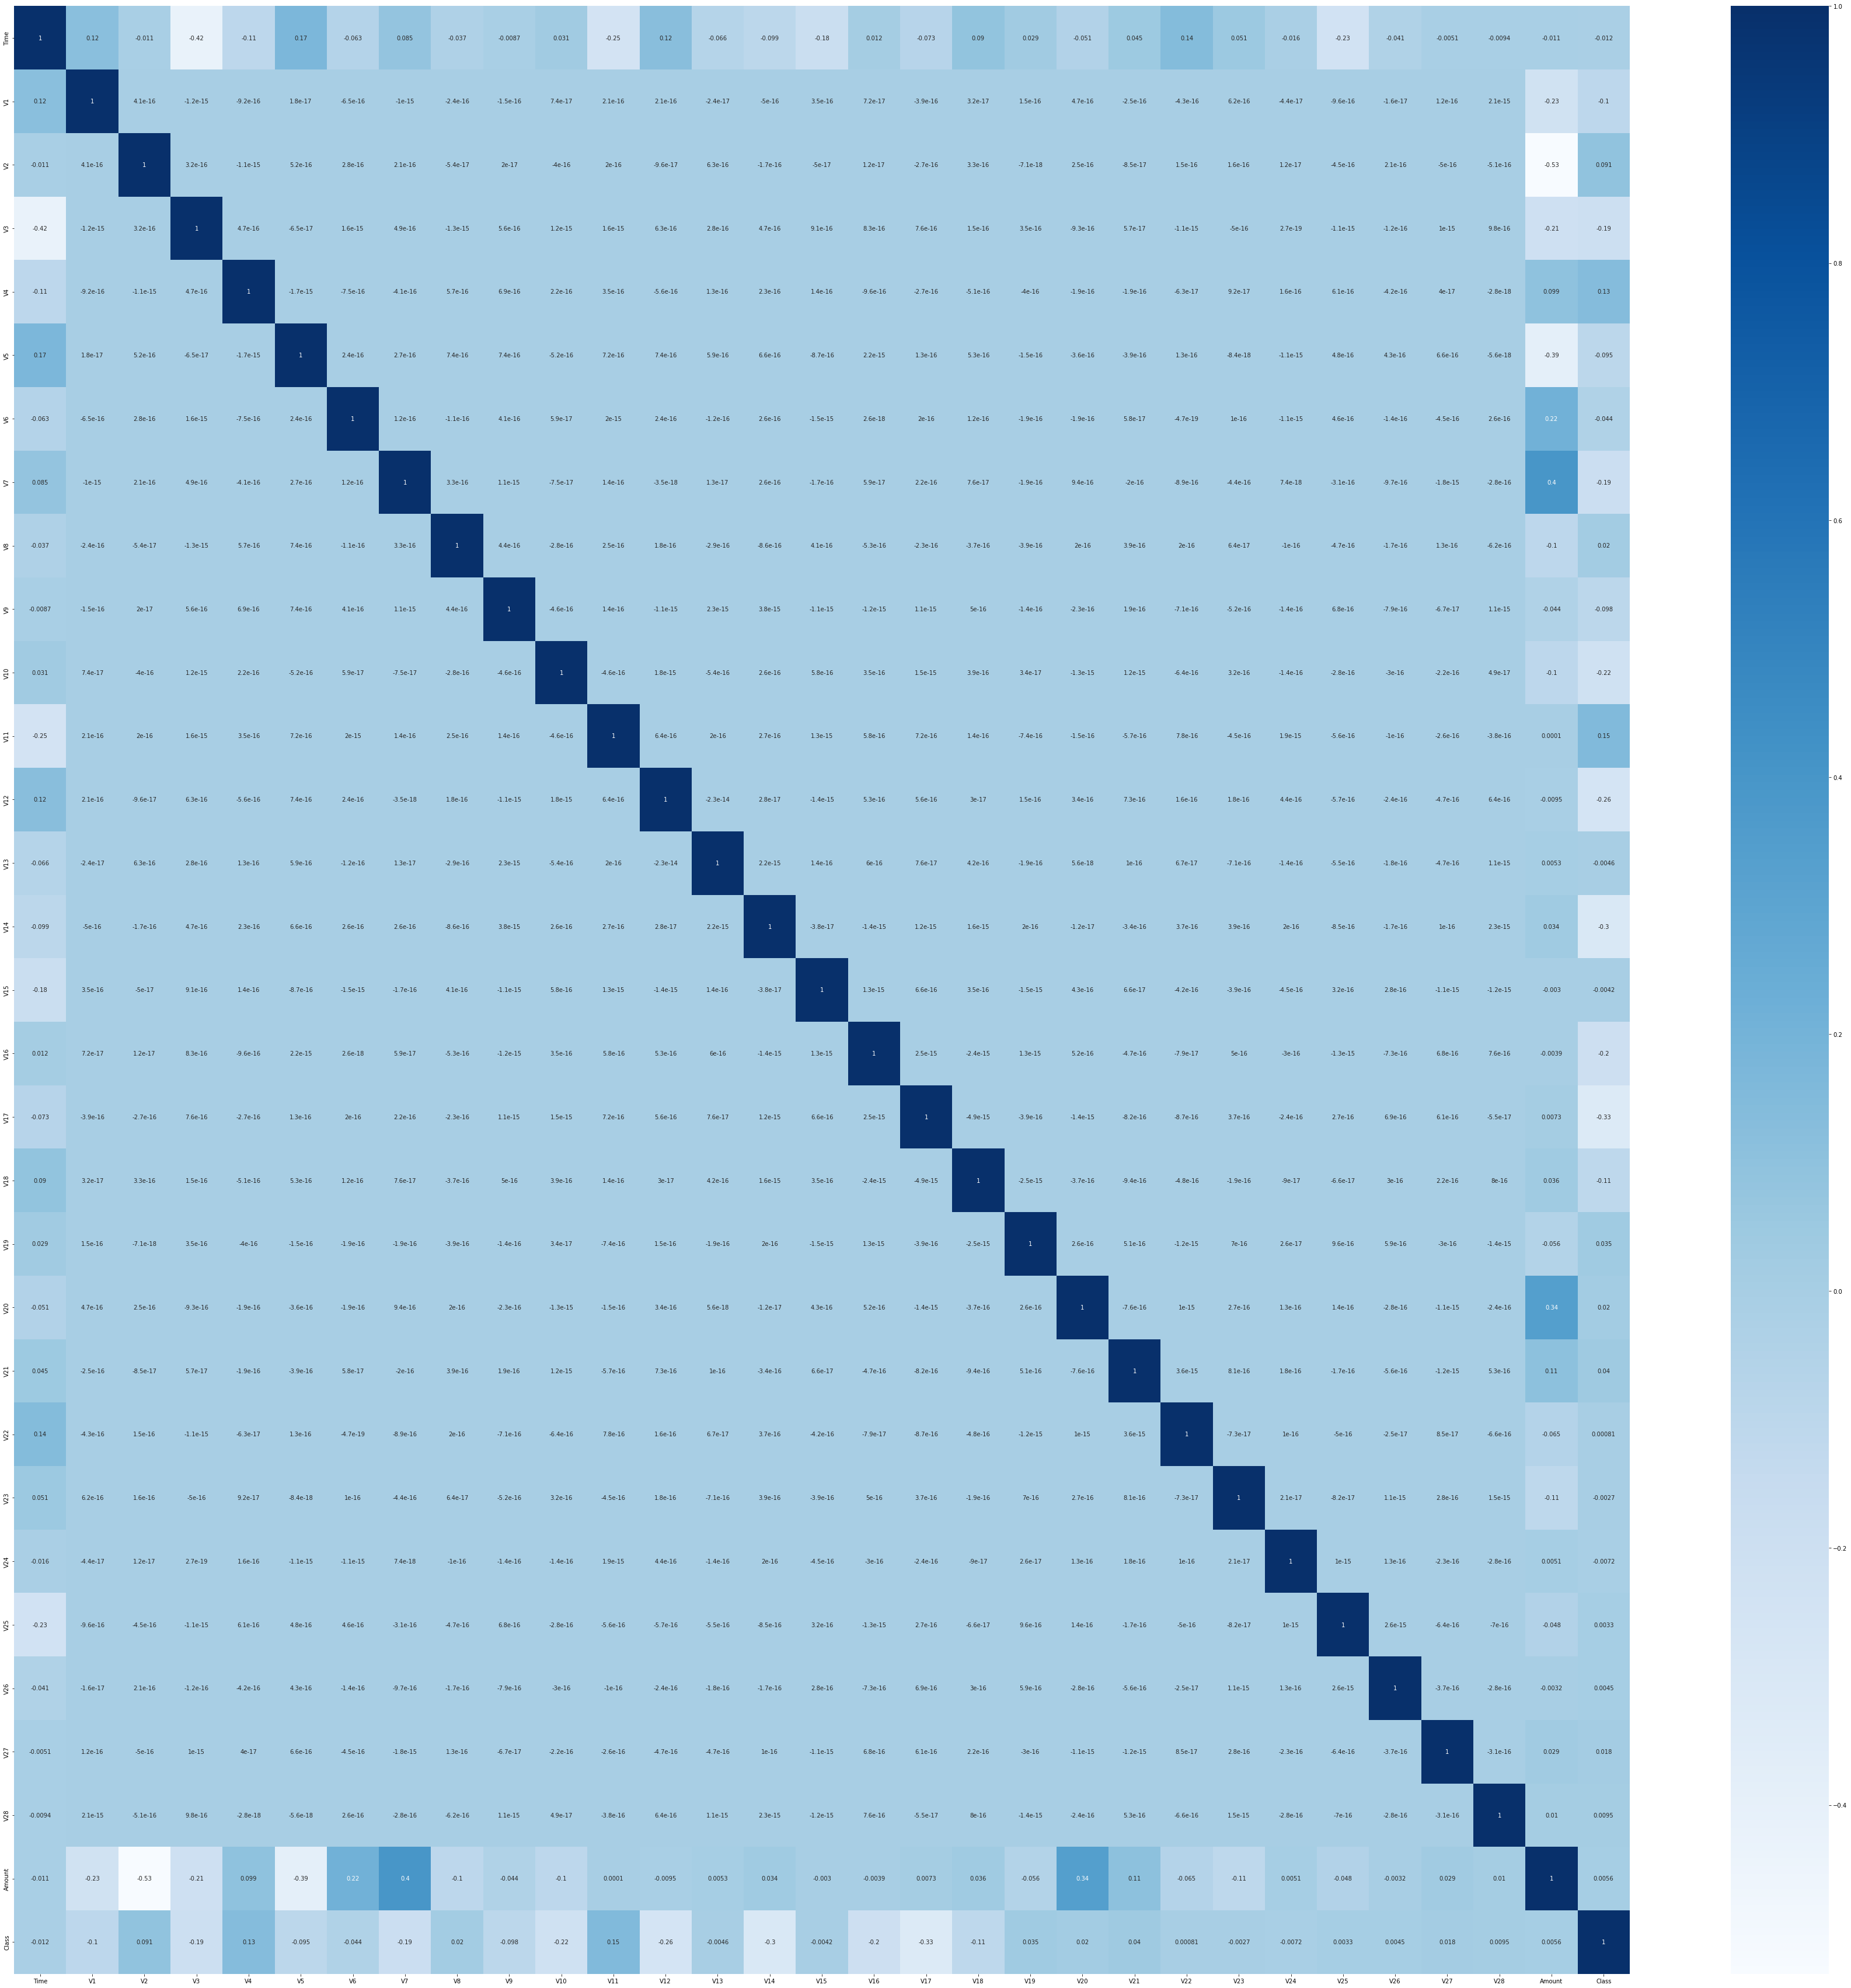

In [ ]:
# Extracting the relations
corr = df.corr()

# Configurating plot
col_size = len(df.columns)
plt.figure(figsize=(col_size*2,col_size*2))

# Plotting
sns.heatmap(corr, annot=True, cmap="Blues");

Text(0.5, 1.0, 'Negative Correlation (neg> 0.7)')

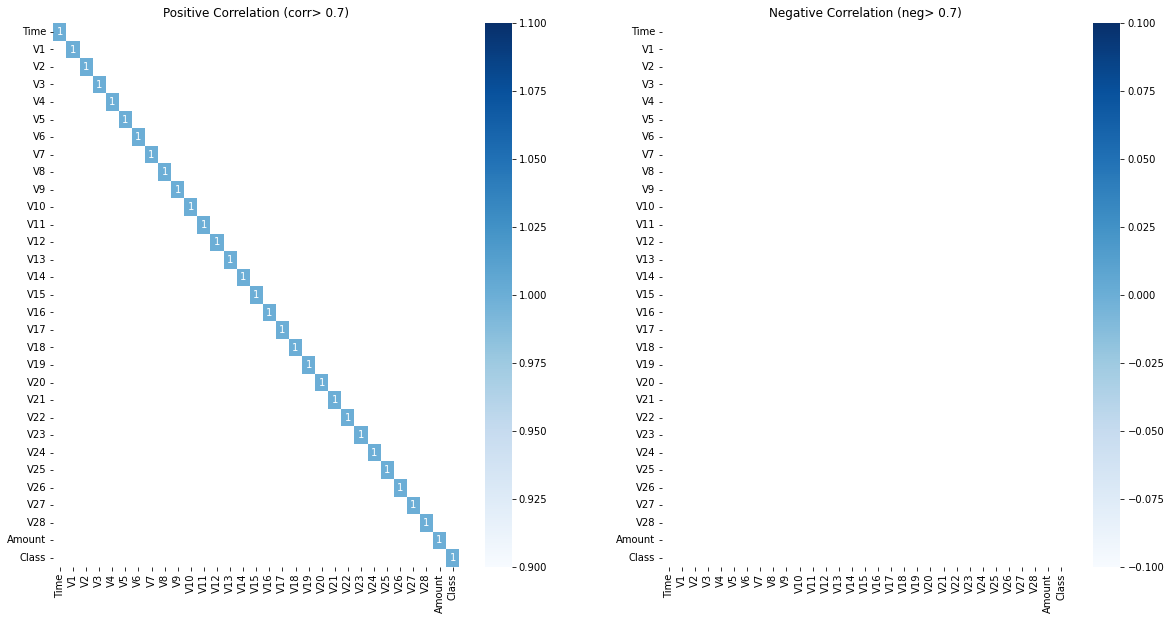

In [ ]:
# Extracting the pos & neg corrs
p_th = 0.7
positive = corr[corr>p_th]

n_th = -0.7
negative = corr[corr<n_th]

# Configurating plot
col_size = len(df.columns)
plt.figure(figsize=(20,10))

# plotting as multiple axis
plt.subplot(1,2,1)
sns.heatmap(positive, annot=True, cmap="Blues");
plt.title("Positive Correlation (corr> 0.7)")

plt.subplot(1,2,2)
sns.heatmap(negative, annot=True, cmap="Blues");
plt.title("Negative Correlation (neg> 0.7)")

### Distribution Check

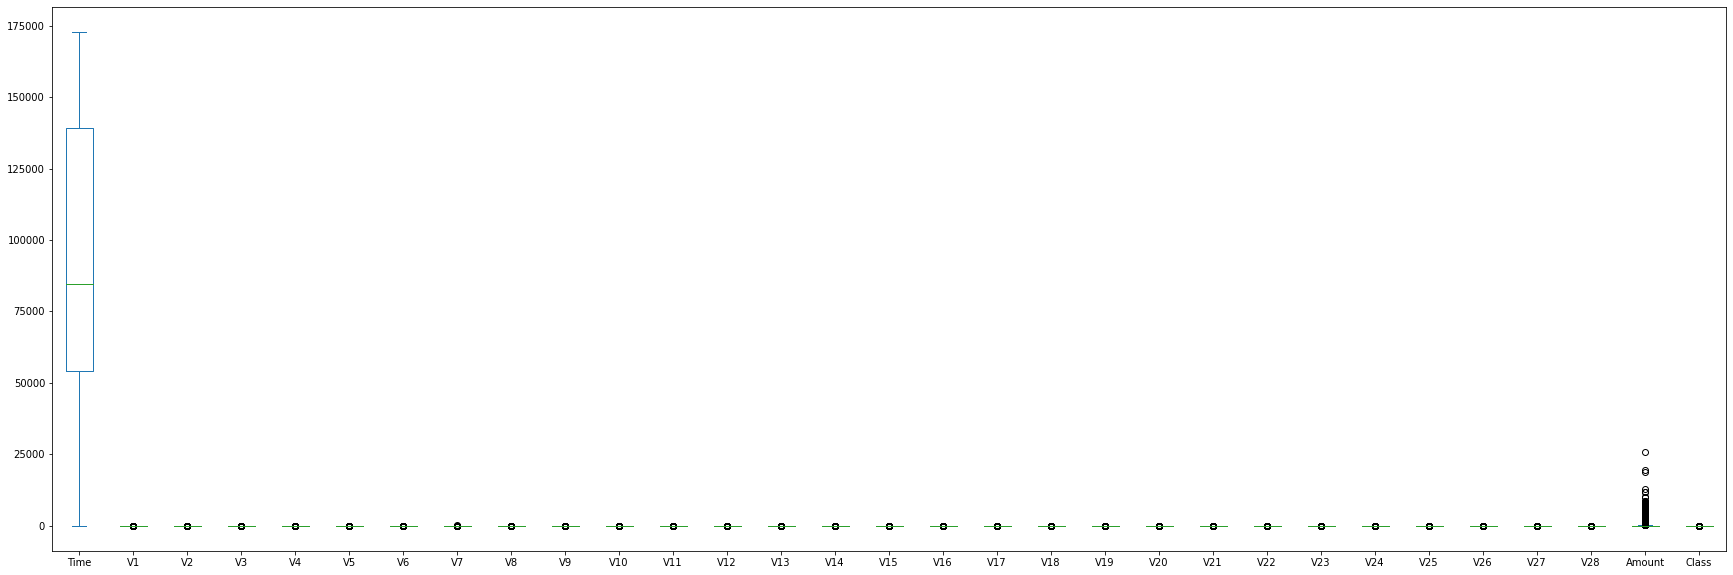

In [ ]:
df.plot.box(figsize=(30,10));

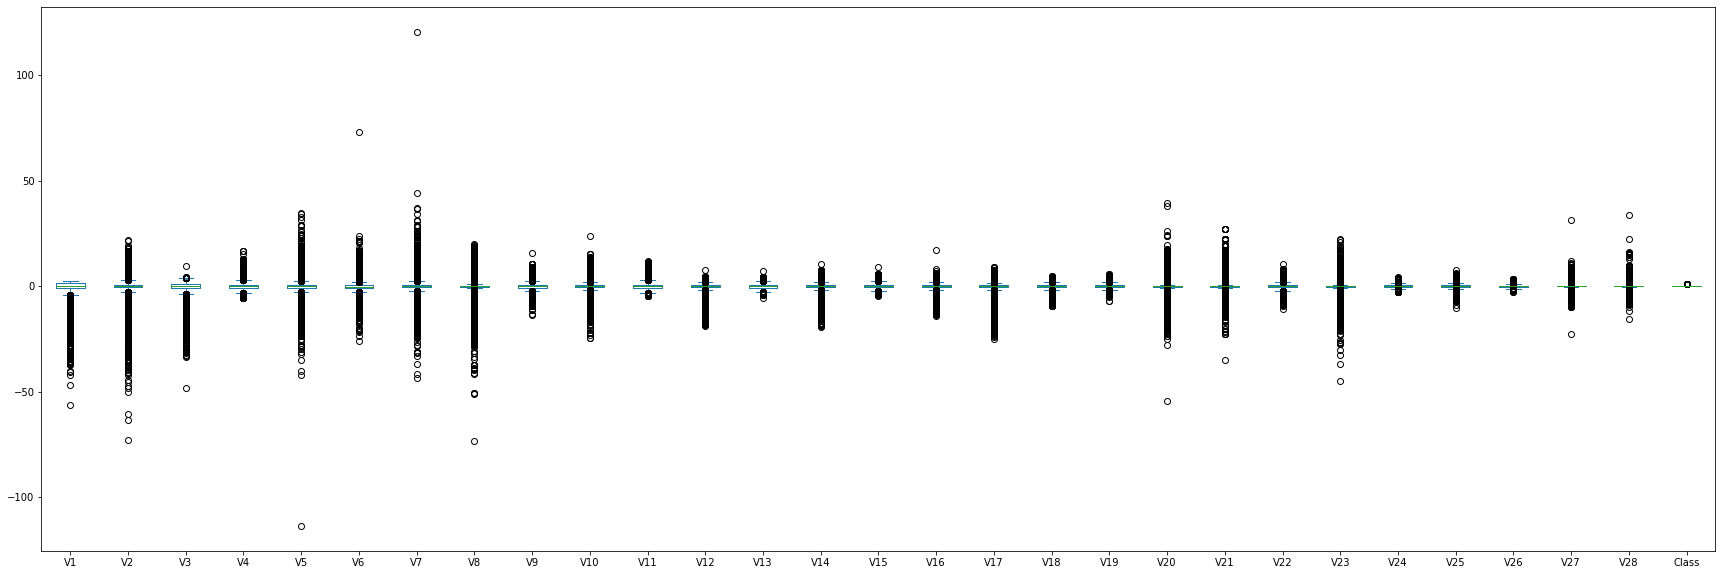

In [ ]:
df.loc[:, [col for col in df.columns if col not in ["Time", "Amount"]]].plot.box(figsize=(30,10));

<AxesSubplot:xlabel='Time', ylabel='Density'>

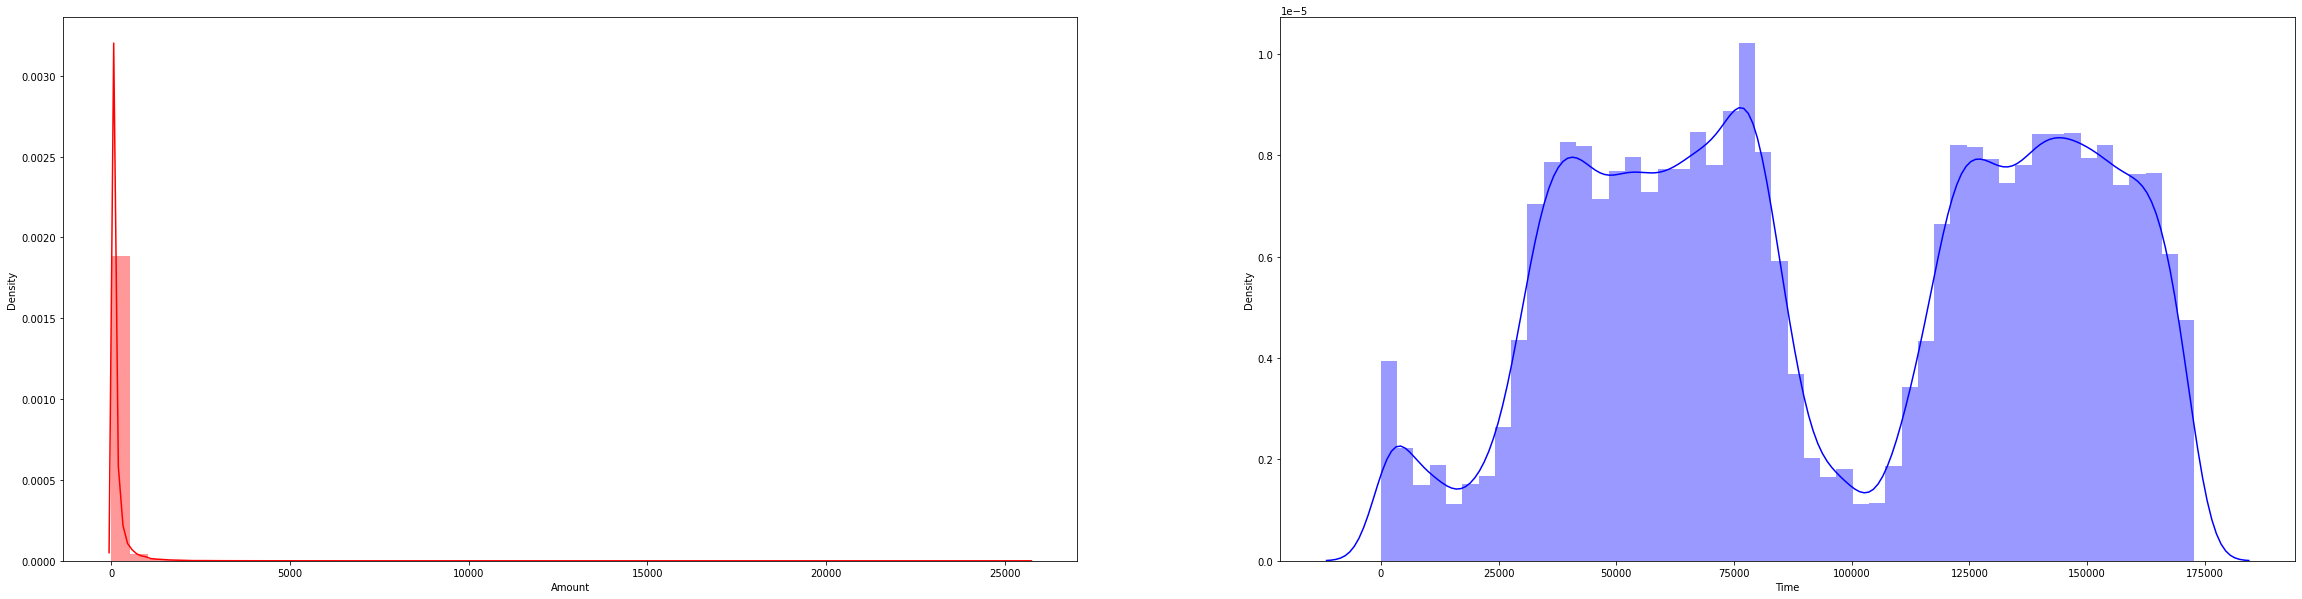

In [ ]:
# Configurating plotings
plt.figure(figsize=(40,10))

# Plotting the axises
plt.subplot(1,2,1)
sns.distplot( df['Amount'], color='r')

plt.subplot(1,2,2)
sns.distplot(df['Time'], color='b')

Same plotting bu using fig & axis from subplots  (Note -> subplot != subplots) 

```python
# Creating a figure which has multiple axis
fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Plotting 0.axis
sns.distplot(df['Amount'], ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlim([df['Amount'].min(), df['Amount'].max()])

# Plotting 1.axis
sns.distplot(df['Time'], ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time')
ax[1].set_xlim([df['Time'].min(), df['Time'].max()])
```

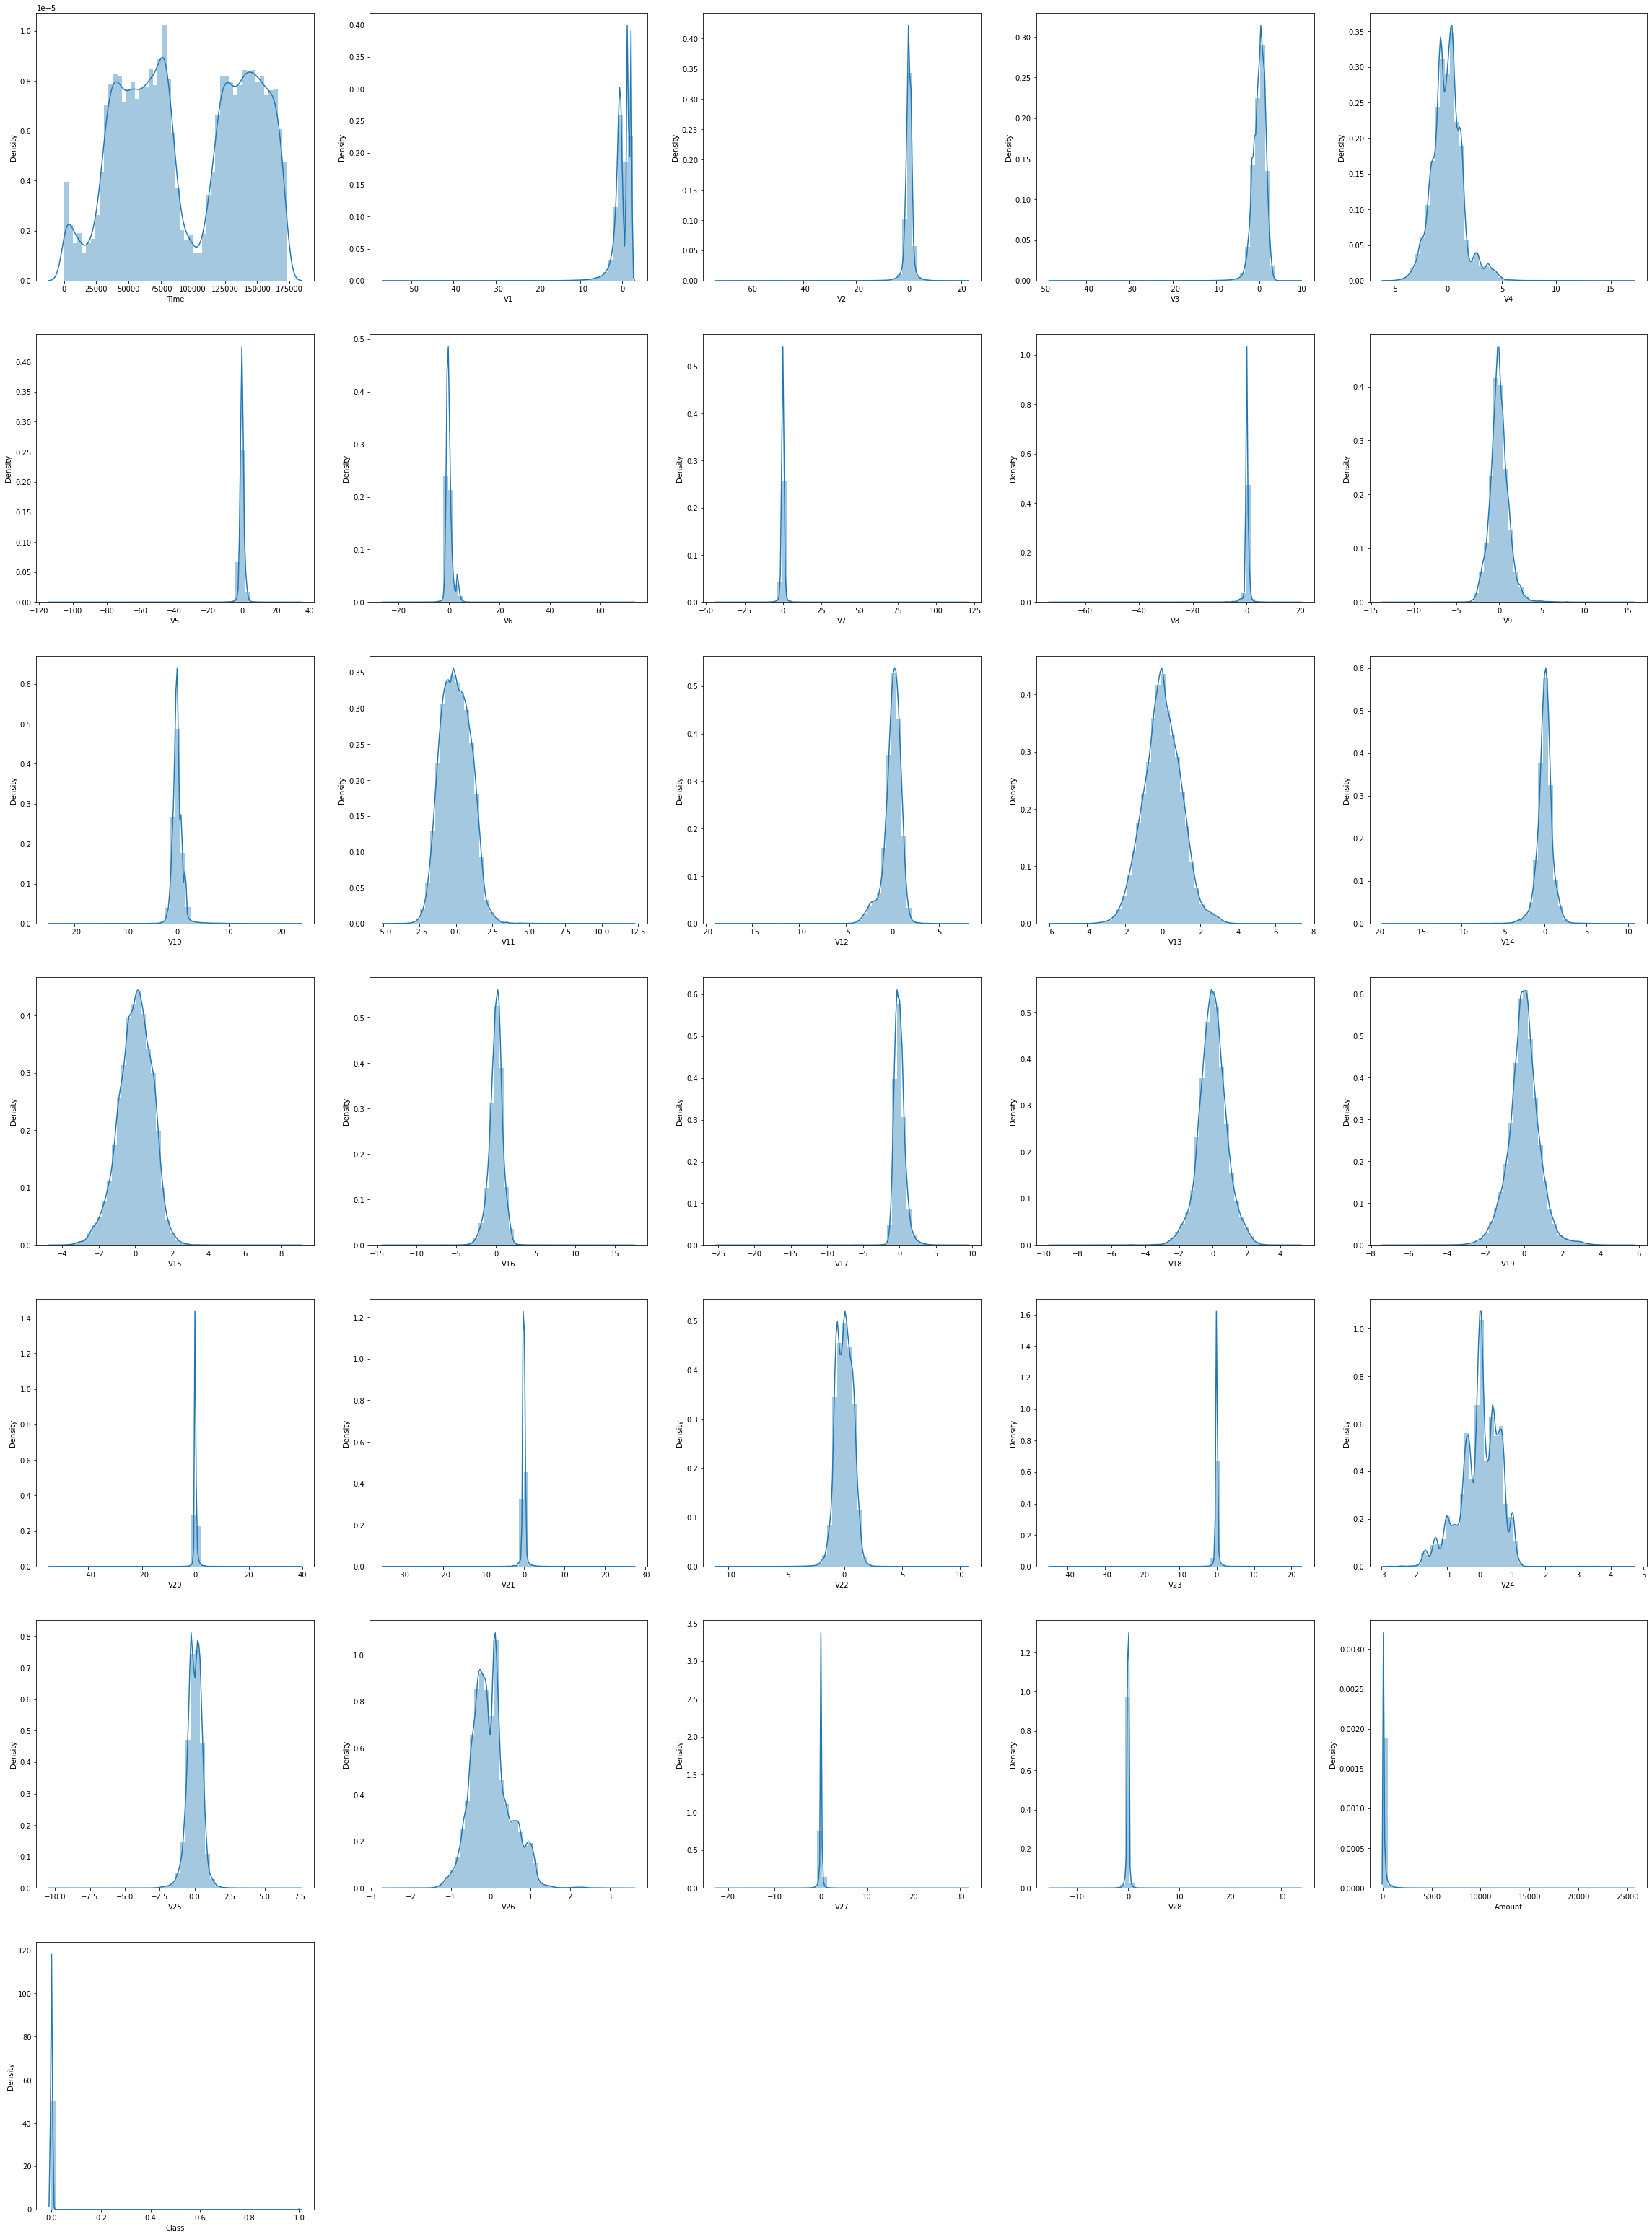

In [ ]:
# Pre-declerations
cols, col_size = df.columns, len(df.columns)
rs, cs = col_size//5+1, 5 

# Plotting the distribution per variable 
plt.figure(figsize=(cs*8, rs*8))
for i,col in enumerate(cols):
  plt.subplot(rs, cs, i+1)
  sns.distplot(df[col])

### Scaling 
- Scaling the "Amount" and "Time" variables as like other variables which already scaled
- Scaling methods
  - General
    - sklearn.preprocessing.StandardScaler
  - Robust Aginst Outlier (less prone to outliers)
    - sklearn.preprocessing.RobustScaler

In [38]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import  RobustScaler
rob_scaler = RobustScaler()

# scaling 
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# adjusting the dataframe
df.drop(['Time','Amount'], axis=1, inplace=True)

<AxesSubplot:xlabel='scaled_amount', ylabel='Density'>

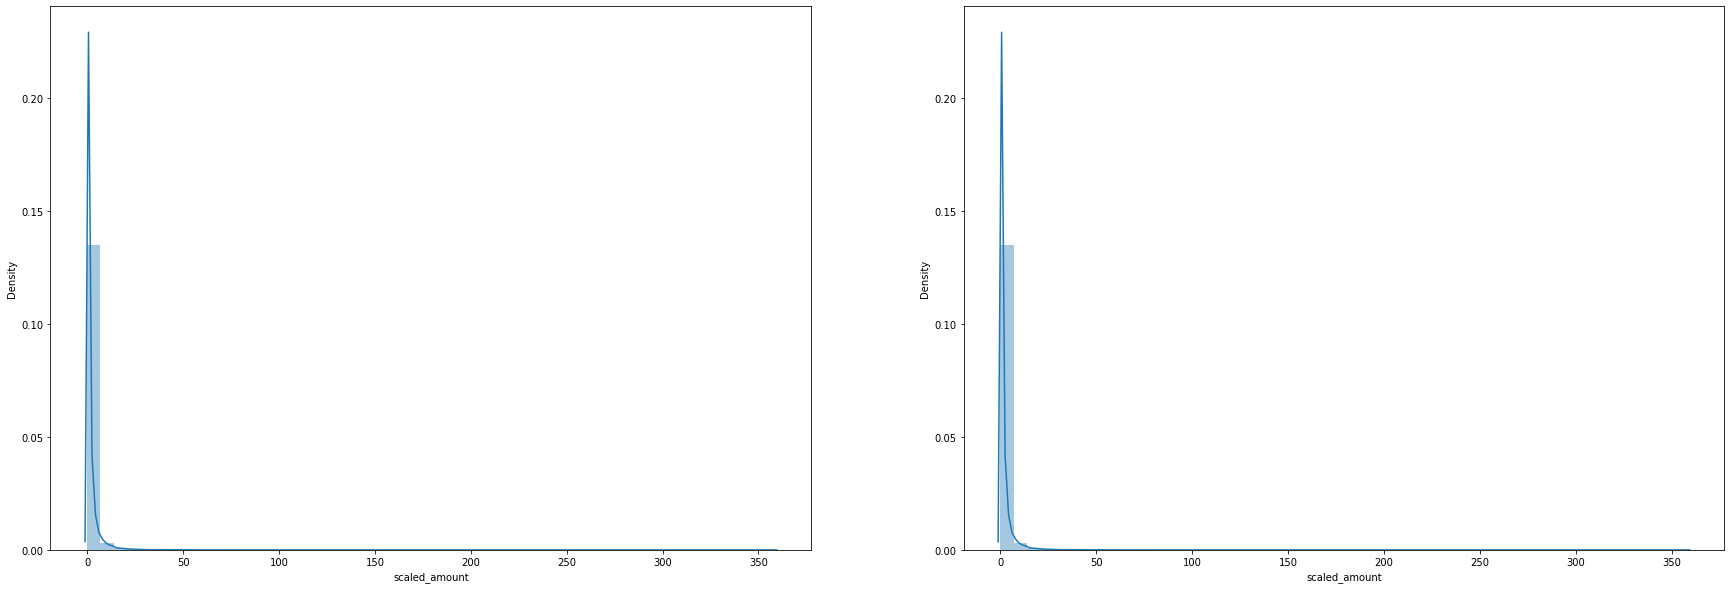

In [ ]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
sns.distplot(df['scaled_amount'])

plt.subplot(1,2,2)
sns.distplot(df['scaled_amount'])

### Balance Check

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [ ]:
round(df['Class'].value_counts()[0]/len(df) * 100,2)

99.83

<AxesSubplot:xlabel='Class', ylabel='count'>

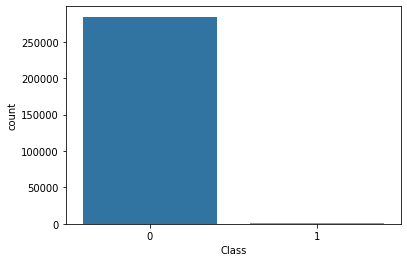

In [ ]:
sns.countplot('Class', data=df, x = {0:"No Fraud", 1:"Fraud"})

## (2) Imbalancity Analysis

### (a) Evaluation for balancity
- Getting a evaluator metric function for Imbalance Handling techniques     

#### Denoting Features and Target Variable

In [39]:
# Denoting the features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

#### Split via preserving target distribution

In [40]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit


# Splitting through preserving the percentage of samples for each class.
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# splitting
for train_index, test_index in sss.split(X, y):
    original_X_train, original_X_test = X.iloc[train_index], X.iloc[test_index]
    original_y_train, original_y_test = y.iloc[train_index], y.iloc[test_index]

In [41]:
# getting the values to avoid index key error while trainnig after second split.
original_X_train = original_X_train.values
original_X_test = original_X_test.values
original_y_train = original_y_train.values
original_y_test = original_y_test.values;

In [42]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(original_y_train))
print(test_counts_label/ len(original_y_test))

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


#### Evaluation Function

In [79]:
from sklearn.metrics import (precision_score, recall_score,
                             recall_score, f1_score, roc_auc_score)

def evaluate_with_origin(model, pred, test_indexes):
  
  scores = {
      "acc": [model.score(original_X_train[test_indexes], original_y_train[test_indexes])],
      "precision" : [precision_score(original_y_train[test_indexes], pred)],
      "recall" : [recall_score(original_y_train[test_indexes], pred)],
      "f1" : [f1_score(original_y_train[test_indexes], pred)],
      "auc" : [roc_auc_score(original_y_train[test_indexes], pred)]
  }
  
  return scores

In [80]:
def collect_scores(g_scores,l_scores):
  # if empty generate a dict
  if not g_scores:  g_scores = { metric:list() for metric in l_scores.keys() }

  # collect the results
  for metric in g_scores.keys(): g_scores[metric].append(l_scores[metric])

  return g_scores

### (b) Random Undersampling Analysis
- We analyse the data because of the reducing information loss.
- Example Actions
  - Removing negative correlated fraud observations which are the extreme outliers. 

##### Implementing Random Undersampling

In [81]:
# Finding out the under sample size to get balanced distribution
sample_ammount = df['Class'].value_counts().min()

In [82]:
# Shuffling for random selection
shuffled_df = df.sample(frac=1)

In [83]:
# even if we select first n sample they will be selectedd randomly
# because of they have already shuffled
fraud_df = shuffled_df.loc[df['Class'] == 1]
non_fraud_df = shuffled_df.loc[df['Class'] == 0][:sample_ammount]

In [84]:
# Creating the undersapmled dataset
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
undersampled_df = normal_distributed_df.sample(frac=1, random_state=42)

Class dist after undersampling:
0    0.5
1    0.5
Name: Class, dtype: float64


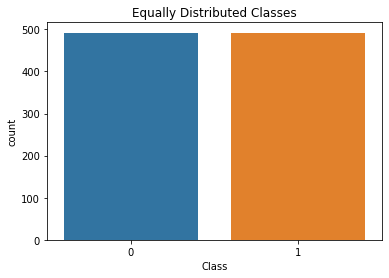

In [85]:
# Checking the target distribution after the undersapling process

dist_ratios = undersampled_df['Class'].value_counts()/len(undersampled_df)

# Displating the Calculation
from pprint import pprint
print("Class dist after undersampling:")
pprint(dist_ratios)

# Plotting
sns.countplot('Class', data=undersampled_df)
plt.title('Equally Distributed Classes');

##### Relations of Undersampled Data

###### Util Functions

In [ ]:
def rel_filter(df:pd.DataFrame, th:float)->pd.DataFrame:
  # Calculating the relations
  corr = df.corr()

  # filtering the relations
  filtered_corr = corr[corr > th]  if th > 0.0 else corr[corr < th]

  return filtered_corr

def rel_plotter(corr:pd.DataFrame, title:str="Correlations", figsize:tuple=None, cmap="Blues", annot=True):
  
  # plotting configurations
  if figsize != None: plt.figure(figsize=figsize)

  # plotting the relattions
  sns.heatmap(corr, cmap="Blues", annot=True)
  plt.title(title);

def get_relations(corr:pd.DataFrame, th:float)->list:

  # decleration of params
  columns = corr.columns
  is_exceed = (lambda rel: rel > th)  if th > 0 else (lambda rel: rel < th)  

  # getting the column names which exceedes the threashold
  filtered_relations = list()
  for row in columns:
    for col in columns:
        
        # Pass the correaltion with itself
        if col==row: continue

        # Collect variables which exvide threashold correlation 
        cur_corr = corr.loc[row, col]
        if  is_exceed(cur_corr):

          # Check whether the record have already added
          is_already_added = [ all([ e in record for e in [row, col] ])  for record in filtered_relations ]
          
          # Add if it have not already added
          if not any(is_already_added): filtered_relations.append([row, col, np.round(cur_corr, 2)]) 
  
  return filtered_relations

In [ ]:
get_relations(undersampled_df.corr(), 0.85)

[['V1', 'V3', 0.88],
 ['V1', 'V5', 0.87],
 ['V1', 'V7', 0.88],
 ['V3', 'V7', 0.89],
 ['V3', 'V10', 0.86],
 ['V7', 'V10', 0.87],
 ['V10', 'V12', 0.88],
 ['V10', 'V16', 0.85],
 ['V10', 'V17', 0.85],
 ['V12', 'V14', 0.88],
 ['V12', 'V16', 0.89],
 ['V12', 'V17', 0.88],
 ['V16', 'V17', 0.95],
 ['V16', 'V18', 0.91],
 ['V17', 'V18', 0.94]]

In [ ]:
get_relations(undersampled_df.corr(), (-0.85))

[['V2', 'V3', -0.86],
 ['V2', 'V7', -0.86],
 ['V11', 'V12', -0.9],
 ['V11', 'V14', -0.89]]

In [ ]:
def get_var_corrs(df:pd.DataFrame, var:str, top_n:int=5, th:float=None):
  # checking the params whether valid
  if var not in df.columns: raise f"'{var}' column does not exist in the dataframe"

  # Calculating the correlation
  var_corrs = df.corr()[var].drop(var)

  # Filtering & sorting 
  if th != None:

    # Filtering
    filter = (lambda df: df[df > th] )  if th > 0 else (lambda df: df[df < th]) 
    var_corrs = filter(var_corrs)
    
    # Sorting
    is_asc = False if th > 0 else True
    var_corrs = var_corrs.sort_values(ascending=is_asc)
    var_corrs = var_corrs[:top_n]

  return var_corrs

In [ ]:
get_var_corrs(undersampled_df, "Class", top_n=5, th=0.5)

V4     0.702554
V11    0.688996
Name: Class, dtype: float64

In [ ]:
get_var_corrs(undersampled_df, "Class", top_n=5, th=-0.5)

V14   -0.747548
V12   -0.684981
V10   -0.631121
V16   -0.597533
V17   -0.559361
Name: Class, dtype: float64

###### General Relation

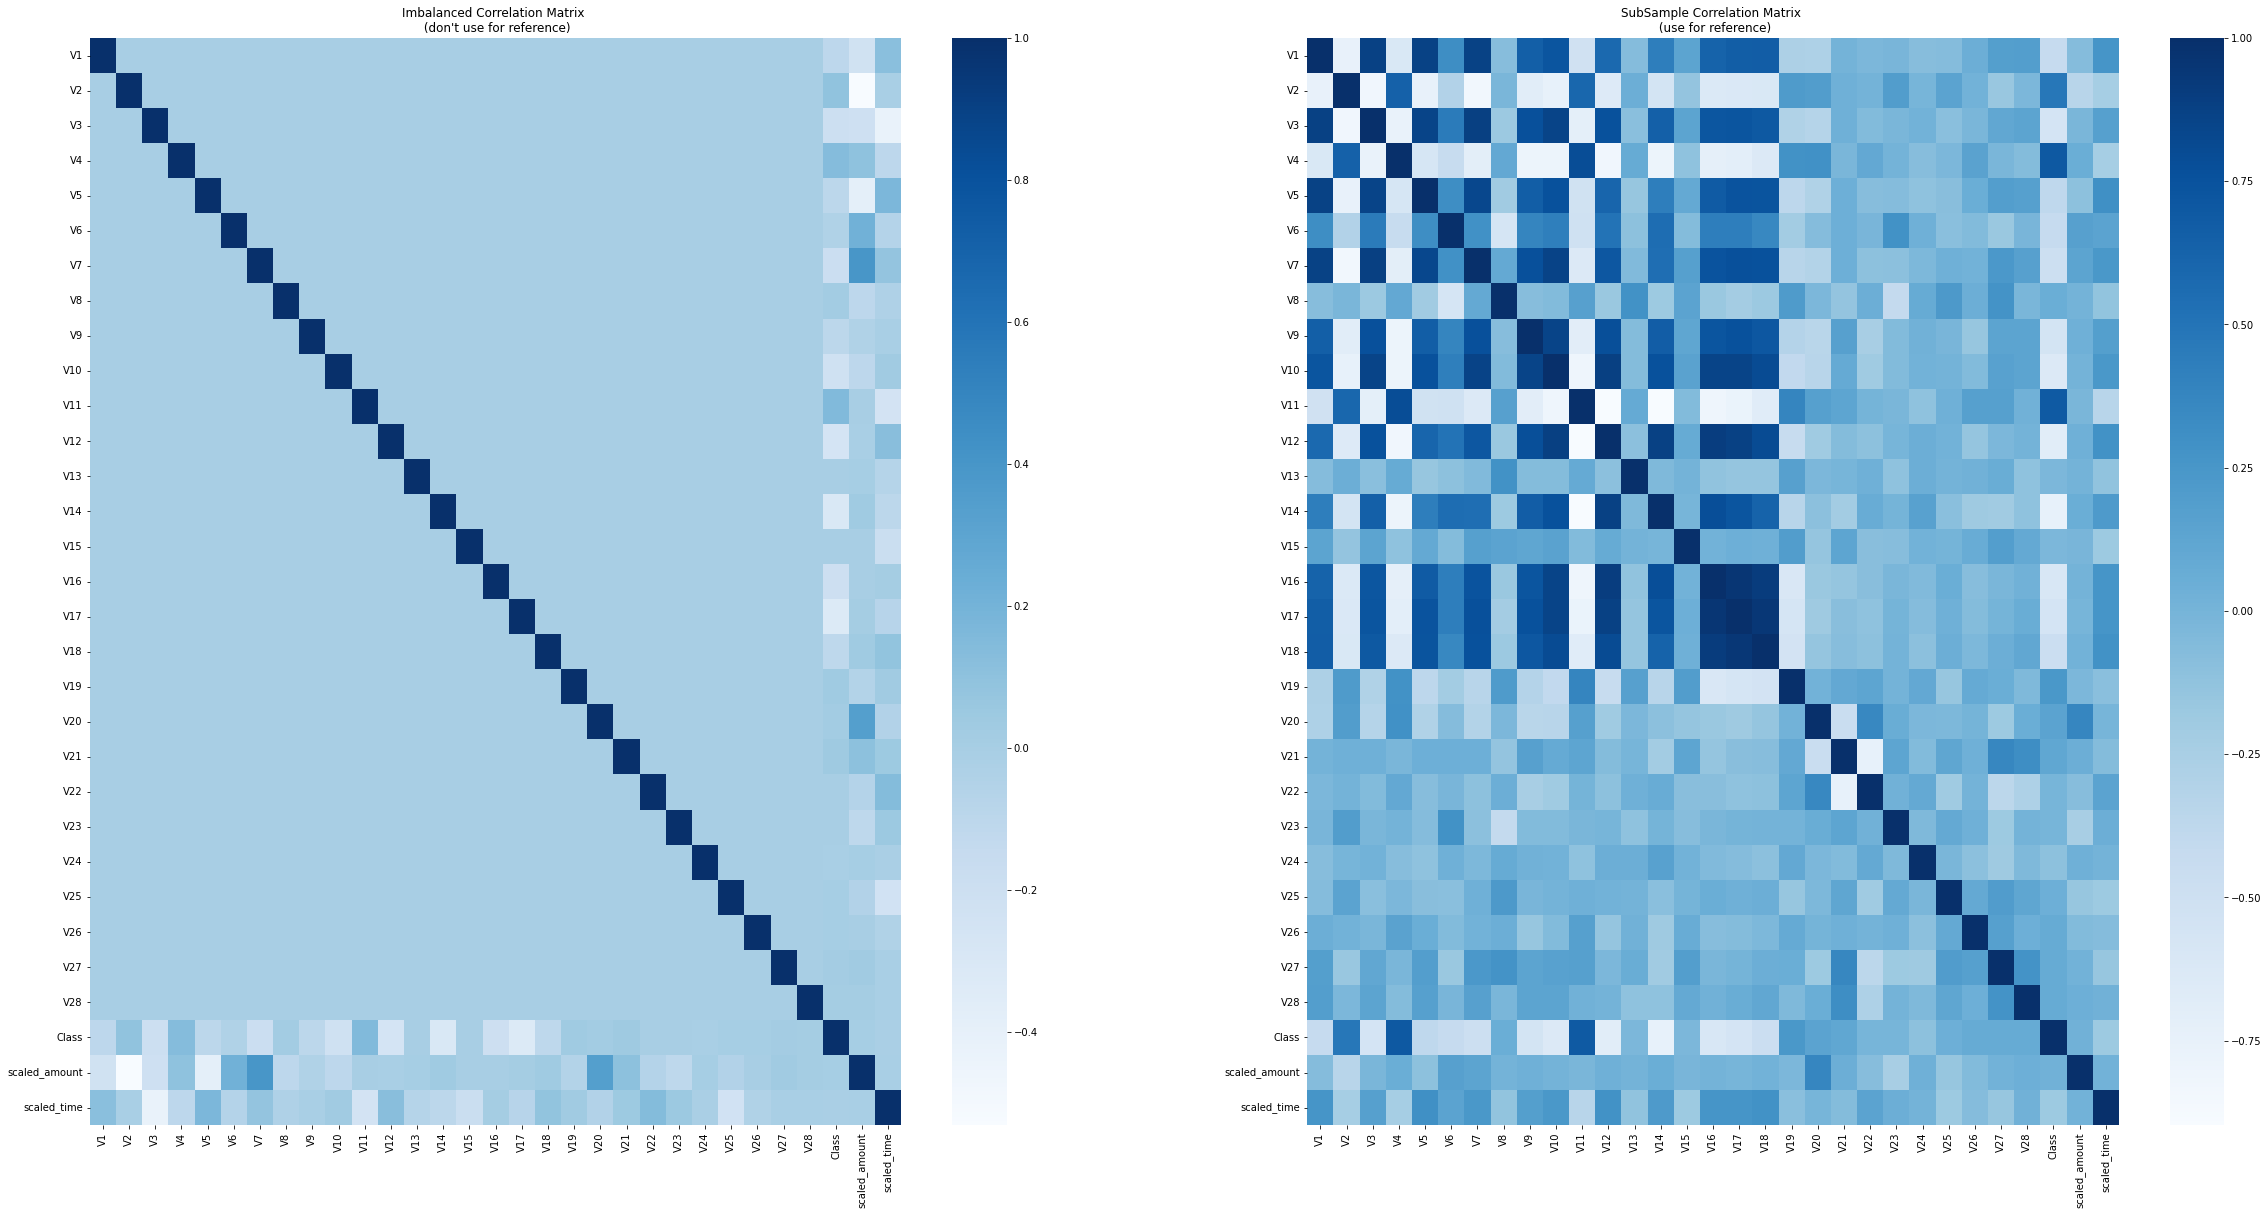

In [ ]:
plt.figure(figsize=(40,20))

# Entire Dataset
plt.subplot(1,2,1)
sns.heatmap(df.corr(), cmap='Blues')
plt.title("Imbalanced Correlation Matrix \n (don't use for reference)");

# Undersampled Dataset
plt.subplot(1,2,2)
sns.heatmap(undersampled_df.corr(), cmap='Blues')
plt.title('SubSample Correlation Matrix \n (use for reference)');

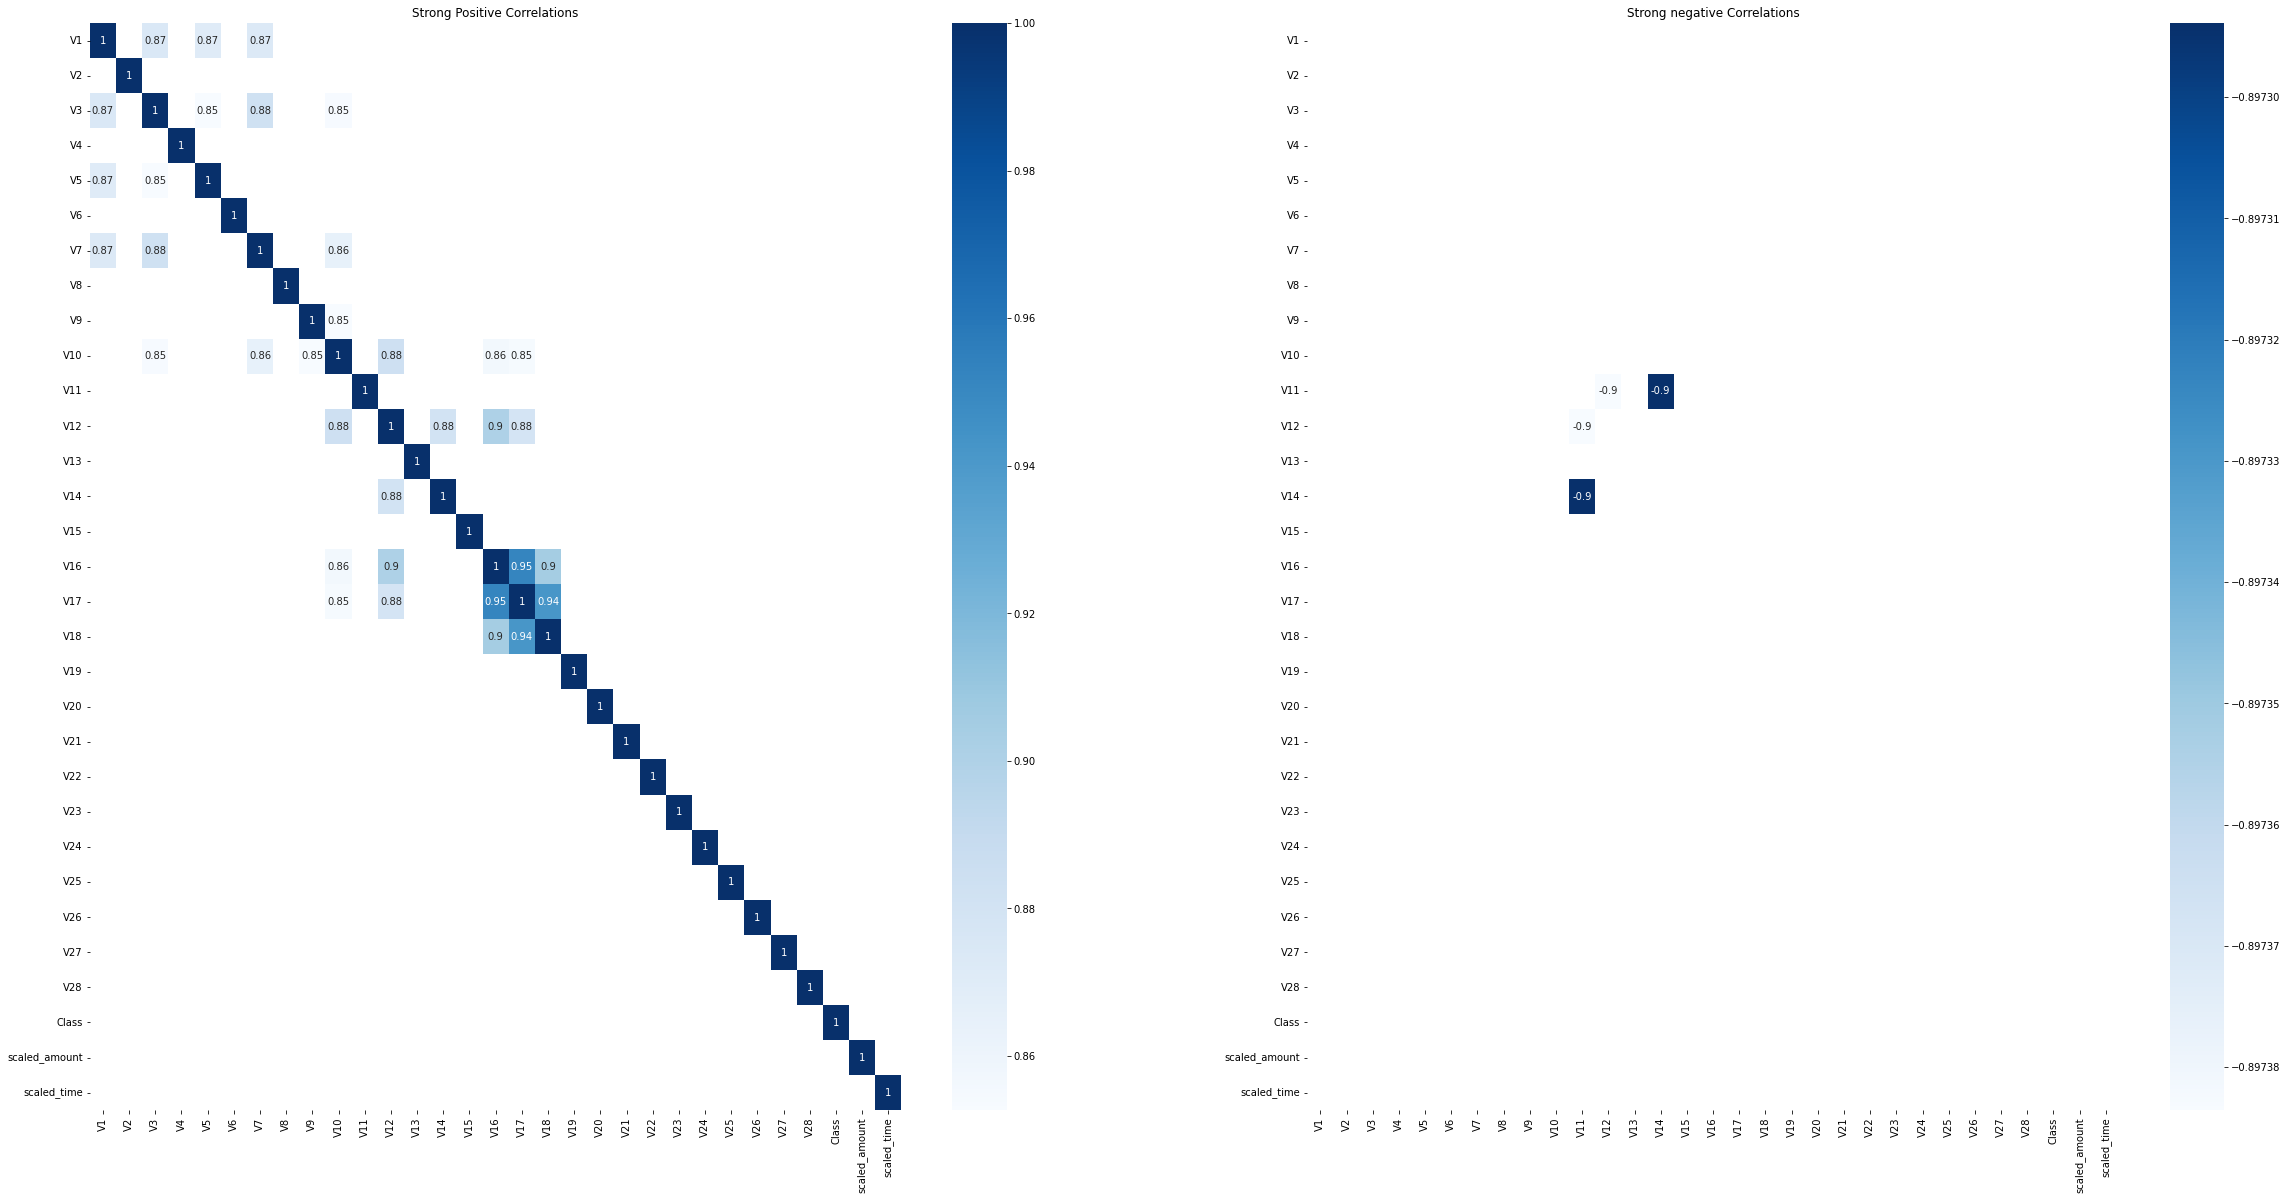

In [ ]:
plt.figure(figsize=(40, 20))

# Strong Possitive Correlation
plt.subplot(1,2,1)
rel_plotter(rel_filter(undersampled_df, th=0.85), title="Strong Positive Correlations" )

# Strong Negative Correlation
plt.subplot(1,2,2)
rel_plotter(rel_filter(undersampled_df, th=-0.85), title="Strong negative Correlations")

In [ ]:
# Extracting the strong relations
p_th, n_th, undersampled_corr = 0.85, -0.85, undersampled_df.corr()

p_rel = undersampled_corr[undersampled_corr > p_th]
n_rel = undersampled_corr[undersampled_corr < n_th]

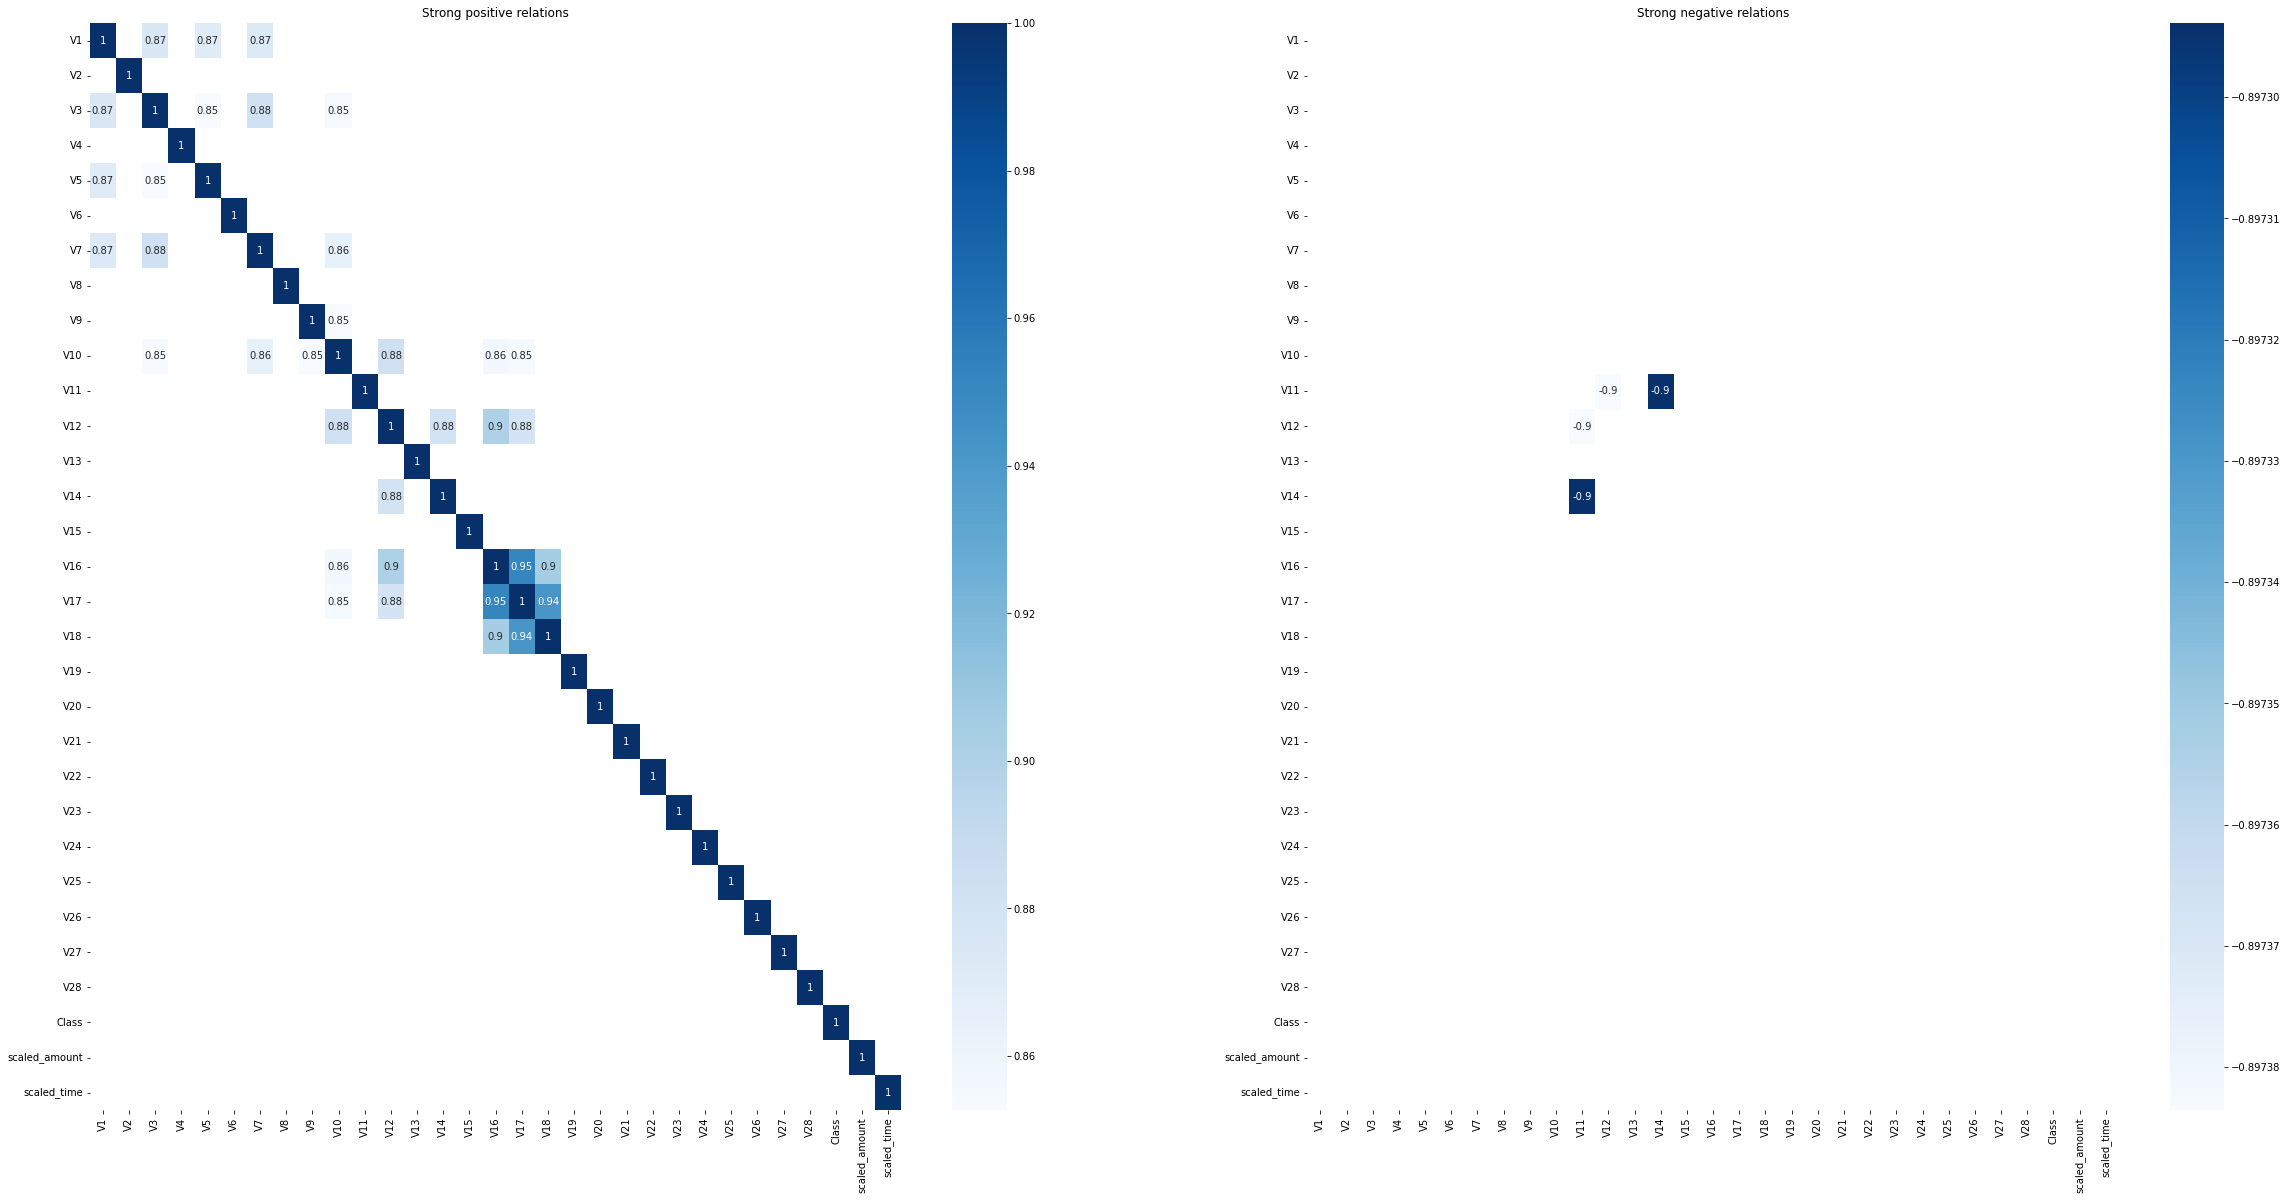

In [ ]:
# plotting configurations
plt.figure(figsize=(40,20))

# Plotting Positive relations
plt.subplot(1,2,1)
sns.heatmap(p_rel, cmap="Blues", annot=True)
plt.title("Strong positive relations");

# Plotting Negative relations
plt.subplot(1,2,2)
sns.heatmap(n_rel, cmap="Blues", annot=True)
plt.title("Strong negative relations");

###### Relation Between Features

In [ ]:
p_corr_vars = get_relations(undersampled_df.corr(), 0.85)
n_corr_vars = get_relations(undersampled_df.corr(), -0.85)

In [ ]:
corrs = list()
corrs.extend(p_corr_vars)
corrs.extend(n_corr_vars)

In [ ]:
strong_corr_var_names = [ (c1, c2) for c1, c2 ,_ in corrs]

In [ ]:
strong_corr_var_names

[('V1', 'V3'),
 ('V1', 'V5'),
 ('V1', 'V7'),
 ('V3', 'V5'),
 ('V3', 'V7'),
 ('V3', 'V10'),
 ('V7', 'V10'),
 ('V9', 'V10'),
 ('V10', 'V12'),
 ('V10', 'V16'),
 ('V10', 'V17'),
 ('V12', 'V14'),
 ('V12', 'V16'),
 ('V12', 'V17'),
 ('V16', 'V17'),
 ('V16', 'V18'),
 ('V17', 'V18'),
 ('V11', 'V12'),
 ('V11', 'V14')]

###### Relation between Target and features
```python
undersampled_corr["Class"].drop("Class").sort_values(ascending=False)
```

In [ ]:
p_corrs = get_var_corrs(undersampled_df, "Class", top_n=5, th=0.25)
p_corrs_names = p_corrs.index
p_corrs

V4     0.702554
V11    0.688996
V2     0.477539
Name: Class, dtype: float64

In [ ]:
n_corrs = get_var_corrs(undersampled_df, "Class", top_n=5, th=-0.25)
n_corrs_names = n_corrs.index
n_corrs

V14   -0.747548
V12   -0.684981
V10   -0.631121
V16   -0.597533
V17   -0.559361
Name: Class, dtype: float64

##### Distributions of undersampled Data

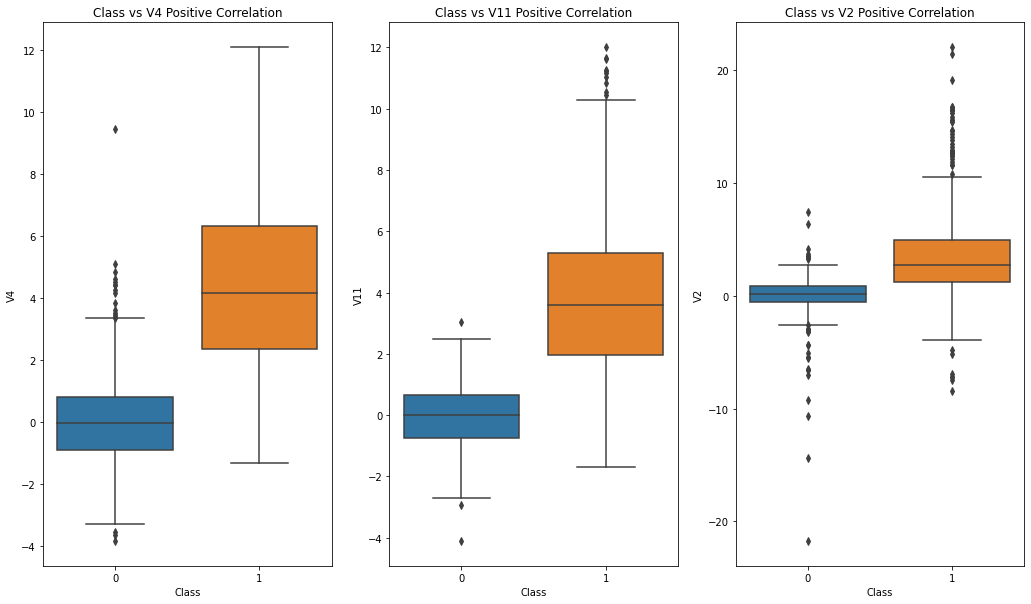

In [ ]:
rs, cs =len(p_corrs_names)//5+1, 5

plt.figure(figsize=(30,10))

for i, col in enumerate(p_corrs_names):
  plt.subplot(rs, cs, i+1)
  sns.boxplot(x="Class", y=col, data=undersampled_df)
  plt.title(f"Class vs {col} Positive Correlation")

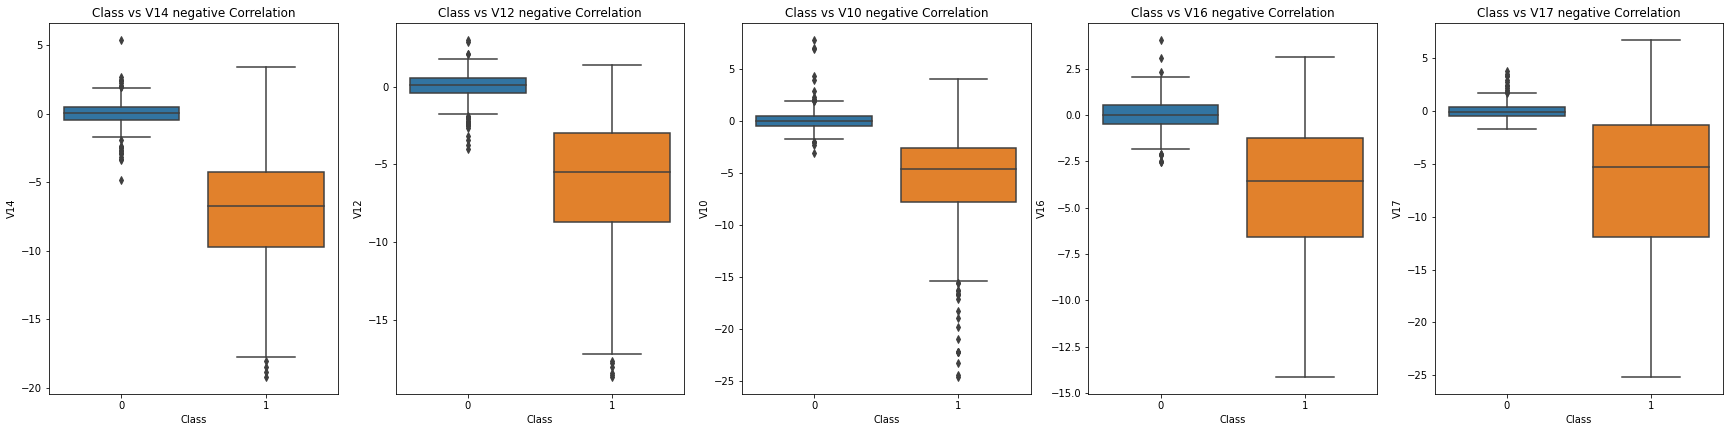

In [ ]:
rs, cs =len(n_corrs_names)//5+1, 5

plt.figure(figsize=(30,15))
for i, col in enumerate(n_corrs_names):
  plt.subplot(rs, cs, i+1)
  sns.boxplot(x="Class", y=col, data=undersampled_df)
  plt.title(f"Class vs {col} negative Correlation")

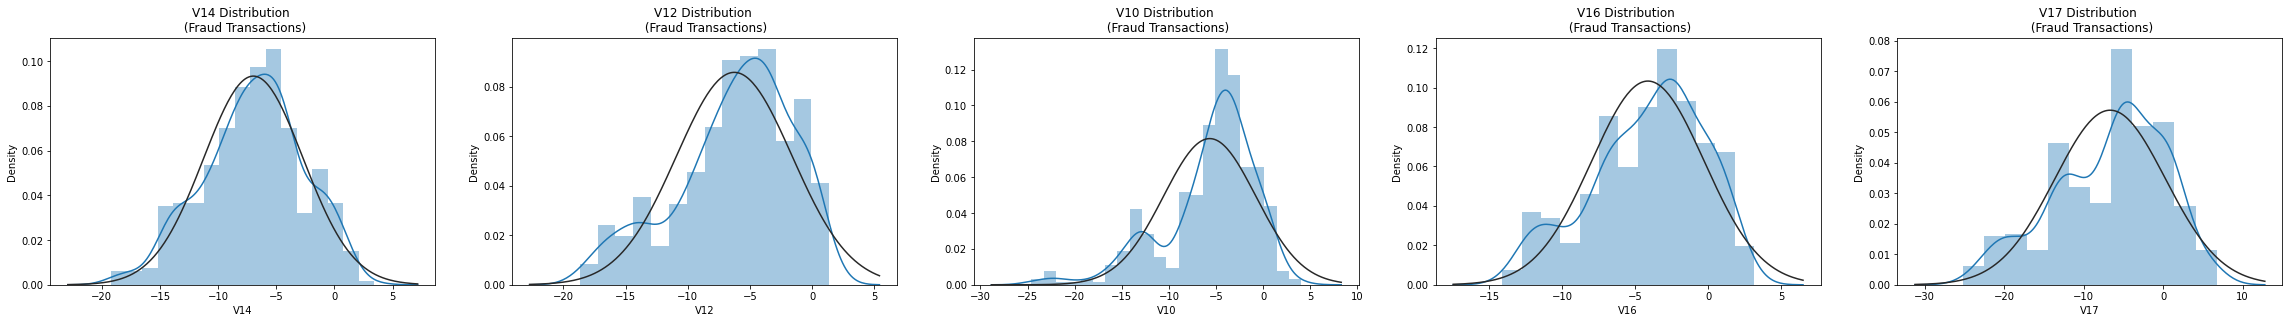

In [ ]:
from scipy.stats import norm

s, cs =len(n_corrs_names)//5+1, 5
target_var = "Class"

plt.figure(figsize=(40,10))
for i, col in enumerate(n_corrs_names):
  
  col_rel_dist = undersampled_df[col].loc[undersampled_df[target_var] == 1]
  
  plt.subplot(rs, cs, i+1)
  sns.distplot(col_rel_dist,fit=norm)
  plt.title(f'{col} Distribution \n (Fraud Transactions)')

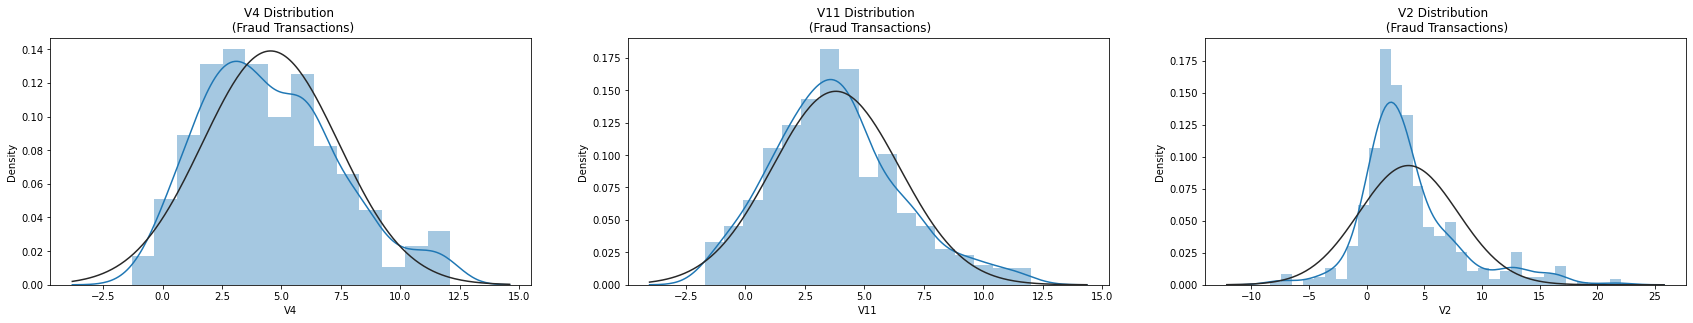

In [ ]:
from scipy.stats import norm

s, cs =len(p_corrs_names)//5+1, 5
target_var = "Class"

plt.figure(figsize=(50,10))
for i, col in enumerate(p_corrs_names):
  
  col_rel_dist = undersampled_df[col].loc[undersampled_df[target_var] == 1]
  
  plt.subplot(rs, cs, i+1)
  sns.distplot(col_rel_dist, fit=norm)
  plt.title(f'{col} Distribution \n (Fraud Transactions)')

##### Outlier Handling of Undersampled data  
- Removing the following outliers
  - Highest Negative correlated 
  - positive labelled.

###### Util functions

In [ ]:
def IQR_calculator(df, ratio=1.5):
    # Calculating the quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # IQR range calculation
    IQR = Q3 -Q1

    # Determinating the boundaries
    lower_threashold = Q1 - ratio * IQR
    higher_threashold = Q3 + ratio *IQR
    
    return IQR, lower_threashold, higher_threashold

In [ ]:
def find_outlier_single(data:pd.DataFrame, lower_threashold:float, higher_threashold:float)->pd.DataFrame:
    boolean_outlier_df = (data < lower_threashold) | (higher_threashold < data)
    return boolean_outlier_df


def find_outlier(df:pd.DataFrame, lower_threashold:pd.Series, higher_threashold:pd.Series)->pd.DataFrame:
    data = df[lower_threashold.index]
    boolean_outlier_df = (data < lower_threashold) | (higher_threashold < data)
    return boolean_outlier_df

###### Finding out the outliers

In [ ]:
n_corr_fraud = undersampled_df[n_corrs_names].loc[undersampled_df['Class'] == 1]

neg_IQR, neg_l_th, neg_h_th = IQR_calculator(n_corr_fraud)
neg_IQR

V14     5.409902
V12     5.714088
V10     5.142514
V16     5.336872
V17    10.603117
dtype: float64

In [ ]:
is_outliers = find_outlier(n_corr_fraud, neg_l_th, neg_h_th)
is_outliers.sum()

V14     4
V12     6
V10    19
V16     0
V17     0
dtype: int64

In [ ]:
np.round(is_outliers.sum() / n_corr_fraud.count(), 2)

V14    0.01
V12    0.01
V10    0.04
V16    0.00
V17    0.00
dtype: float64

In [ ]:
undersampled_df["V14"].loc[undersampled_df['Class'] == 1][is_outliers["V14"]]

9035   -18.493773
9252   -18.049998
8296   -19.214325
8615   -18.822087
Name: V14, dtype: float64

###### Handling the outliers through removing

In [ ]:
temp_df = undersampled_df[ n_corrs_names ].loc[undersampled_df['Class'] == 1][~is_outliers]

In [ ]:
temp_df.isnull().sum()

V14     4
V12     6
V10    19
V16     0
V17     0
dtype: int64

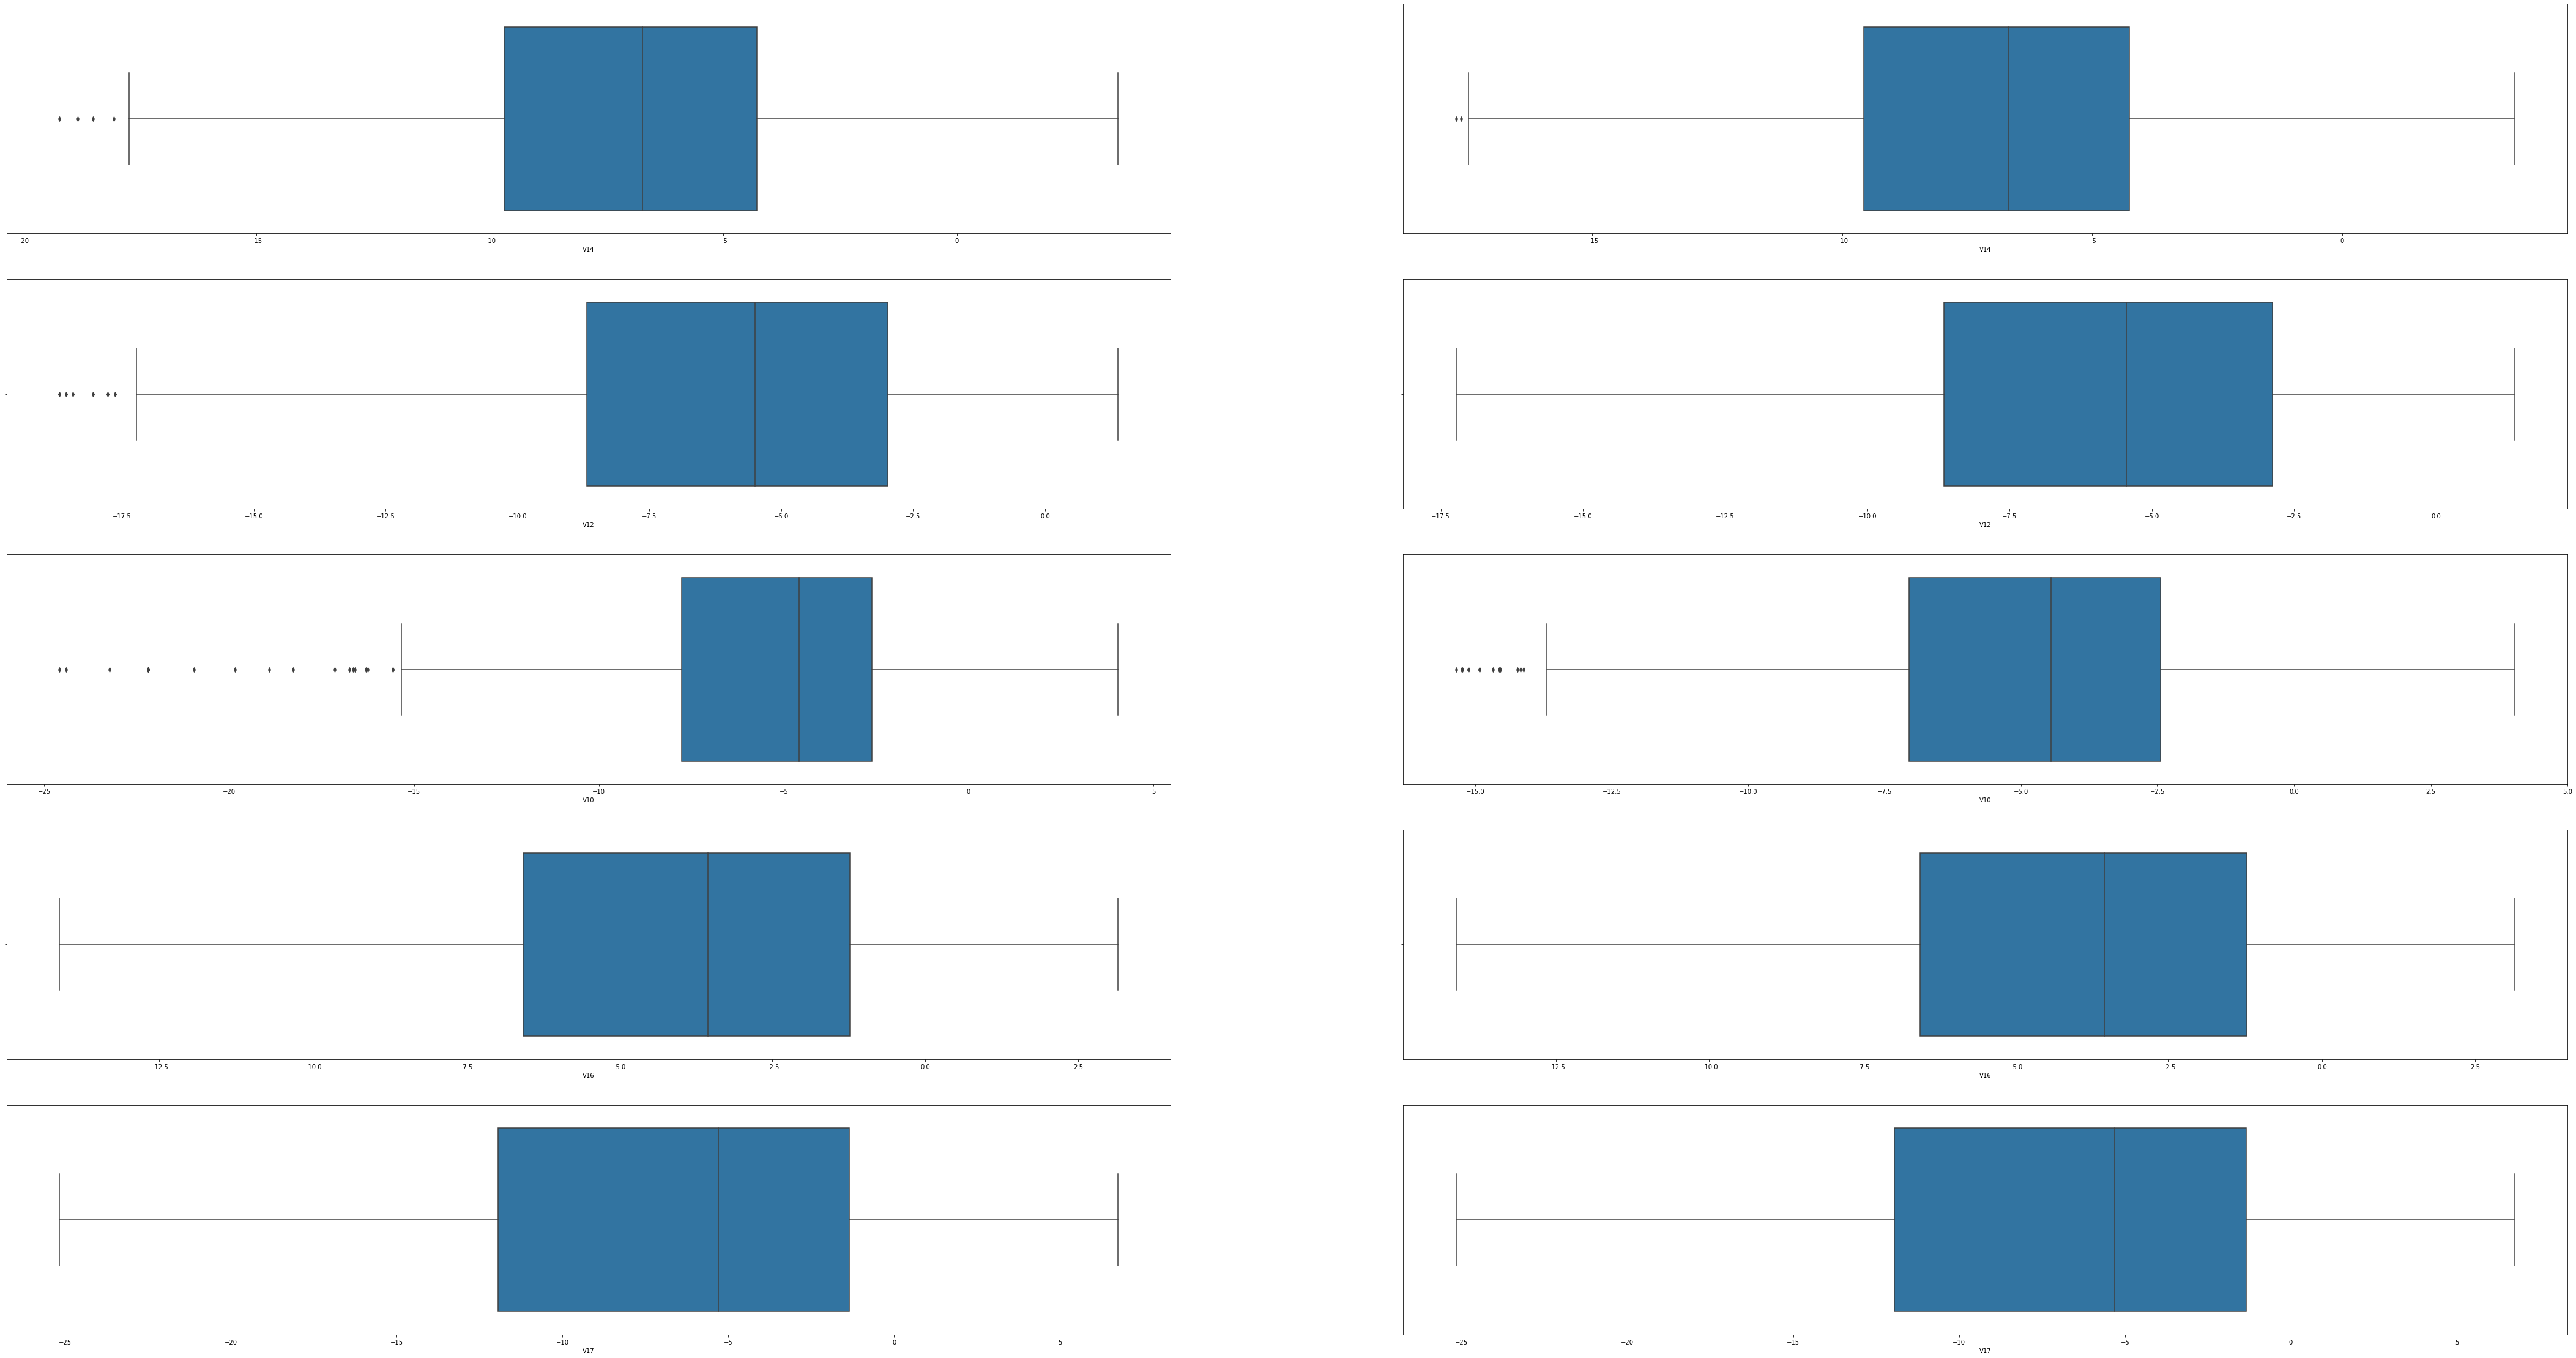

In [ ]:
from itertools import count

rs, cs = len(n_corrs_names), 2

plt.figure(figsize=(rs*15,cs*20))
for i, col in zip(count(step=2), n_corrs_names):
  plt.subplot(rs, cs, i+1)
  sns.boxplot(x=undersampled_df[col].loc[undersampled_df['Class'] == 1])

  plt.subplot(rs, cs, i+2)
  sns.boxplot(x=temp_df[col])

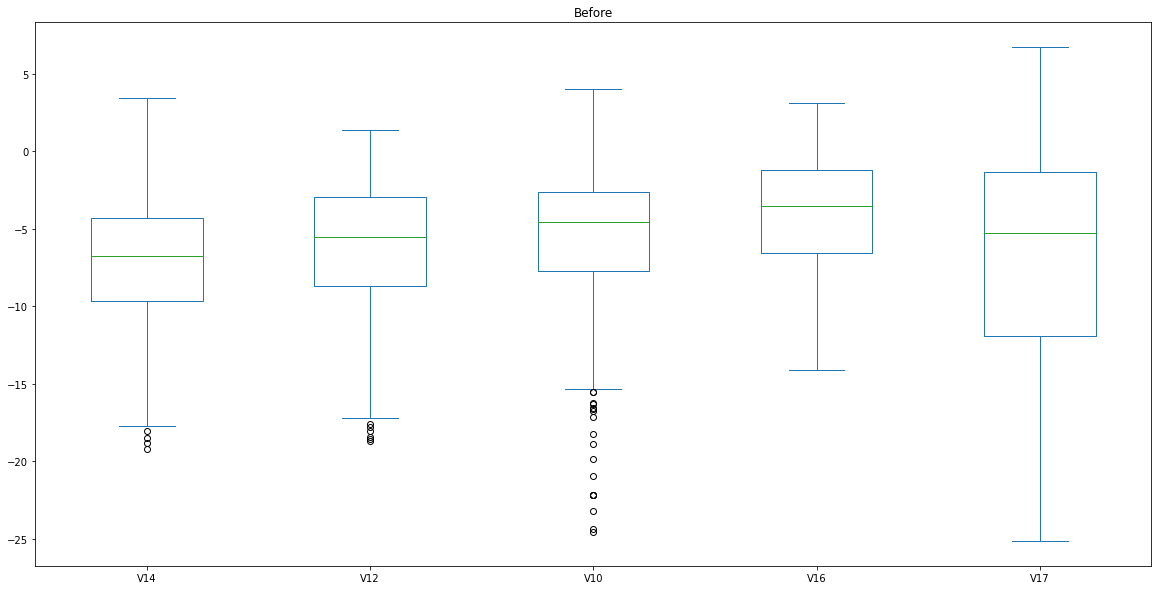

In [ ]:
undersampled_df[n_corrs_names].loc[undersampled_df['Class'] == 1].plot(kind="box", figsize=(20,10), title="Before");

In [ ]:
# Filtering outliers
for col in n_corrs_names:
  undersampled_df[col].loc[undersampled_df["Class"]==1] = undersampled_df[col].loc[undersampled_df["Class"]==1][~is_outliers[col]]
  
# Dropping na values becaouse of multiple variable filtering
undersampled_df.dropna(inplace=True)

undersampled_df[n_corrs_names].isnull().sum()

V14    0
V12    0
V10    0
V16    0
V17    0
dtype: int64

<AxesSubplot:title={'center':'After'}>

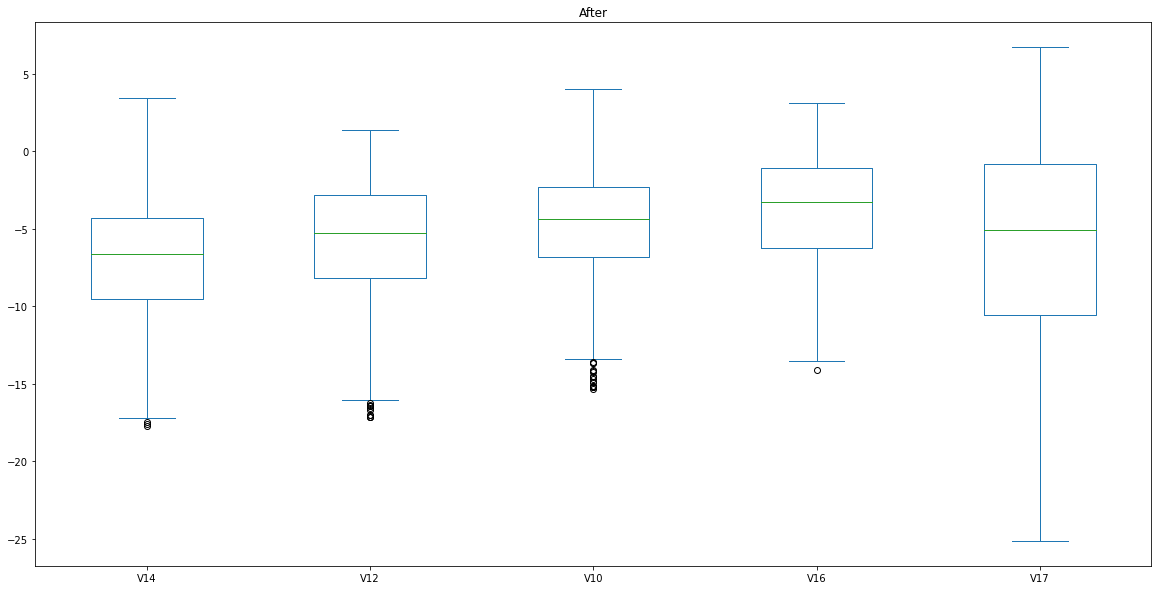

In [ ]:
undersampled_df[n_corrs_names].loc[undersampled_df['Class'] == 1].plot(kind="box", figsize=(20,10), title="After")

##### Dimetion Reduction of undersampled data
- We just want to visualizate via dimention reducing, no futher usage.

In [ ]:
# New_df is from the random undersample data (fewer instances)
X = undersampled_df.drop('Class', axis=1)
y = undersampled_df['Class']

In [ ]:
undersampled_df.isnull().sum()

V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
scaled_amount    0
scaled_time      0
dtype: int64

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD


# T-SNE Implementation
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

# PCA Implementation
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

# TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)


reduced_featurues = [("T-SNE", X_reduced_tsne), ("PCA", X_reduced_pca), ("TruncatedSVD", X_reduced_svd)]

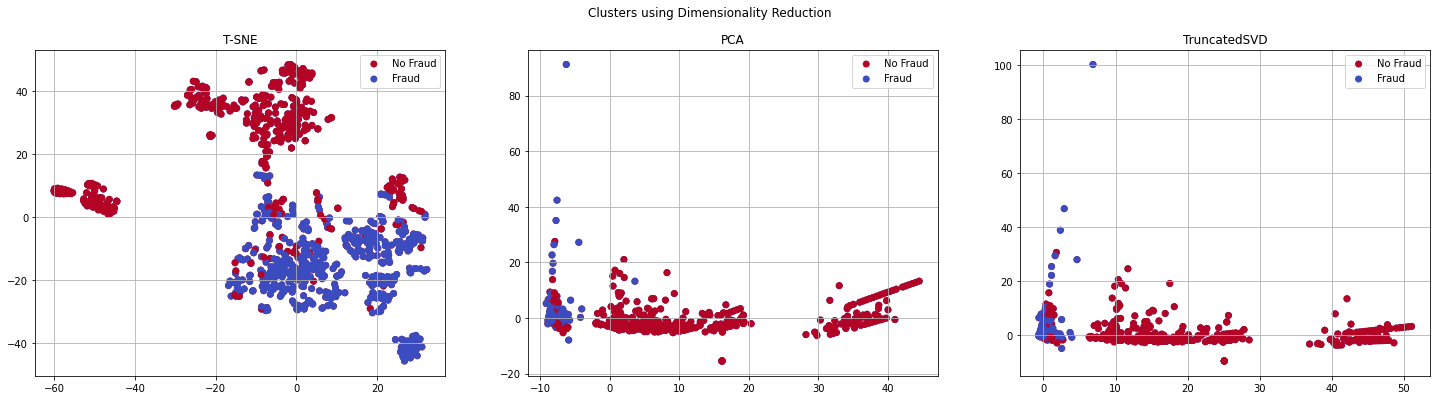

In [ ]:
plt.figure(figsize=(25,6))
plt.suptitle('Clusters using Dimensionality Reduction')
for i, (name, reduced_features) in enumerate(reduced_featurues):
  
  plt.subplot(1,3,i+1)
  
  plt.scatter(reduced_features[:,0], reduced_features[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud')
  plt.scatter(reduced_features[:,0], reduced_features[:,1], c=(y == 1), cmap='coolwarm', label='Fraud')
  
  plt.title(name)
  plt.grid(True)
  plt.legend()

plt.show()

## (3) Random Undersampling
- Under Sampling to get balanced distribution 
  - Remove same data randomly to get more balance dataset
  - Setting the count of classes into same size
- We will get subdataset via removing observations. 
  - so we should shuffle the dataset before undersampling for randomless.
- NOTE THAT:
  - We get a lot of information loss because of UNDER SAMPLING to get balanced target variable ditribution

##### Undersampling the dataset

In [86]:
# Splitting the dataset
us_X = df.drop('Class', axis=1)
us_y = df['Class']

In [87]:
# Split via preserving target distribution
for train_index, test_index in sss.split(us_X, us_y):
    us_X_train, us_X_test = us_X.iloc[train_index], us_X.iloc[test_index]
    us_y_train, us_y_test = us_y.iloc[train_index], us_y.iloc[test_index];

In [88]:
# getting the values to avoid index key error while trainnig after second split.
us_X_train = us_X_train.values
us_X_test = us_X_test.values
us_y_train = us_y_train.values
us_y_test = us_y_test.values;

In [89]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(sampling_strategy='majority') #, random_state=42
X_train_us, y_train_us = nm.fit_resample(us_X_train, us_y_train)
X_test_us, y_test_us = nm.fit_resample(us_X_test, us_y_test)

```python
# Undersampling & Training

from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss

# First Validation split then undersampling. After all, train and score it.
us_scores  = dict()
for train, test in sss.split(us_X_train, us_y_train):
    model_scores= dict()
    for name, model in best_clfs.items():
      
      # undersample then train it with best clsfs wihch trained by GridSearchCV
      us_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), model)
      us_model = us_pipeline.fit(us_X_train[train], us_y_train[train])
      us_pred = us_model.predict(us_X_train[test])

      # calculate & collcet the model scores with original data
      cur_scores = evaluate_with_origin(model, us_pred)
      model_scores = collect_scores(model_scores, cur_scores)

      # update results
      us_scores[name] = model_scores

```

```python
from pprint import pprint
pprint(us_scores)
```

#### Undersample Training  Function
- This functions will be used at the model selection section


with undersampling [NearMiss] during cross validation
- Undersampling 
  - NearMiss(sampling_strategy='majority')

In [115]:
import pandas as pd
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss


def undersample_training(clfs:dict, us_X_train:np.ndarray, us_y_train:np.ndarray)->dict:
  us_scores, us_models  = dict(), dict()
  for train, test in sss.split(us_X_train, us_y_train):
      model_scores= dict()
      for name, model in clfs.items():

        # undersample then train it with best clsfs wihch trained by GridSearchCV
        us_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), model)
        us_model = us_pipeline.fit(us_X_train[train], us_y_train[train])
        us_pred = us_model.predict(us_X_train[test])

        # calculate & collcet the model scores with original data
        cur_scores = evaluate_with_origin(model, us_pred, test_indexes=test)
        model_scores = collect_scores(model_scores, cur_scores)

        # update results
        us_scores[name] = model_scores
        us_models[name] = us_model
  
  return us_scores, us_models
  

```python
# Example Usage
us_scores = undersample_training(best_clfs, us_X_train, us_y_train)
```

## (4) OverSampling

##### Oversampling the dataset

__Avoiding data leakage__


Setting Right way for avoiding  data leakage while oversampling

- Oversampling creates sentetic data according to dataset.
  - NOTE THAT:
    - You must implement cross-validation process before oversampling process.
    - If you do opposite. It will be data leakage becaus of sentetic data generation. So the model will be overfitted.
- Right way
  - (1) Split the data via corss validation
  - (2) Implement the oversampling process.

In [144]:
# Splitting the dataset
os_X = df.drop('Class', axis=1)
os_y = df['Class']

In [145]:
# Split via preserving target distribution
for train_index, test_index in sss.split(os_X, os_y):
    os_X_train, os_X_test = os_X.iloc[train_index], os_X.iloc[test_index]
    os_y_train, os_y_test = os_y.iloc[train_index], os_y.iloc[test_index];

In [146]:
# getting the values to avoid index key error while trainnig after second split.
os_X_train = os_X_train.values
os_X_test = os_X_test.values
os_y_train = os_y_train.values
os_y_test = os_y_test.values;

In [147]:
# Oversampling the dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42) 
X_train_os, y_train_os = sm.fit_resample(os_X_train, os_y_train)
X_test_os, y_test_os = sm.fit_resample(os_X_test, os_y_test)

```python
# copy the tuned models on original data for hyperparamters
best_clfs_os = best_clfs.copy()
pprint(best_clfs_os)
```

```python
# Oversampling & Training
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE

# First Validation split then oversample. After all, train and score it.
os_scores  = dict()
for train, test in sss.split(us_X_train, us_y_train):
    model_scores= dict()
    for name, model in best_clfs_os.items():
      
      # oversample then train it with best clsfs wihch trained by GridSearchCV
      os_pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), model)
      os_model = os_pipeline.fit(us_X_train[train], os_y_train[train])
      os_pred = os_model.predict(us_X_train[test])

      # calculate & collcet the model scores with original data
      cur_scores = evaluate_with_origin(model, os_pred)
      model_scores = collect_scores(model_scores, cur_scores)

      # update results
      os_scores[name] = model_scores
```

##### Oversample Training Function

In [141]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE

def owersample_train(best_clfs_os, os_X_train, os_y_train):
  # First Validation split then oversample. After all, train and score it.
  os_scores, os_models  = dict(), dict()
  for train, test in sss.split(os_X_train, os_y_train):
      model_scores= dict()
      for name, model in best_clfs_os.items():
        
        # oversample then train it with best clsfs wihch trained by GridSearchCV
        os_pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), model)
        os_model = os_pipeline.fit(os_X_train[train], os_y_train[train])
        os_pred = os_model.predict(os_X_train[test])

        # calculate & collcet the model scores with original data
        cur_scores = evaluate_with_origin(model, os_pred, test_indexes=test)
        model_scores = collect_scores(model_scores, cur_scores)

        # update results
        os_scores[name] = model_scores
        os_models[name] = os_model

  return os_scores, os_models

```python
# Example Usage
owersample_train(best_clfs_os, os_X_train, os_y_train)
```

## (5) Missing Value 

### Finding out the missing values

In [ ]:
# find the null values
df.isnull().sum()

V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
scaled_amount    0
scaled_time      0
dtype: int64

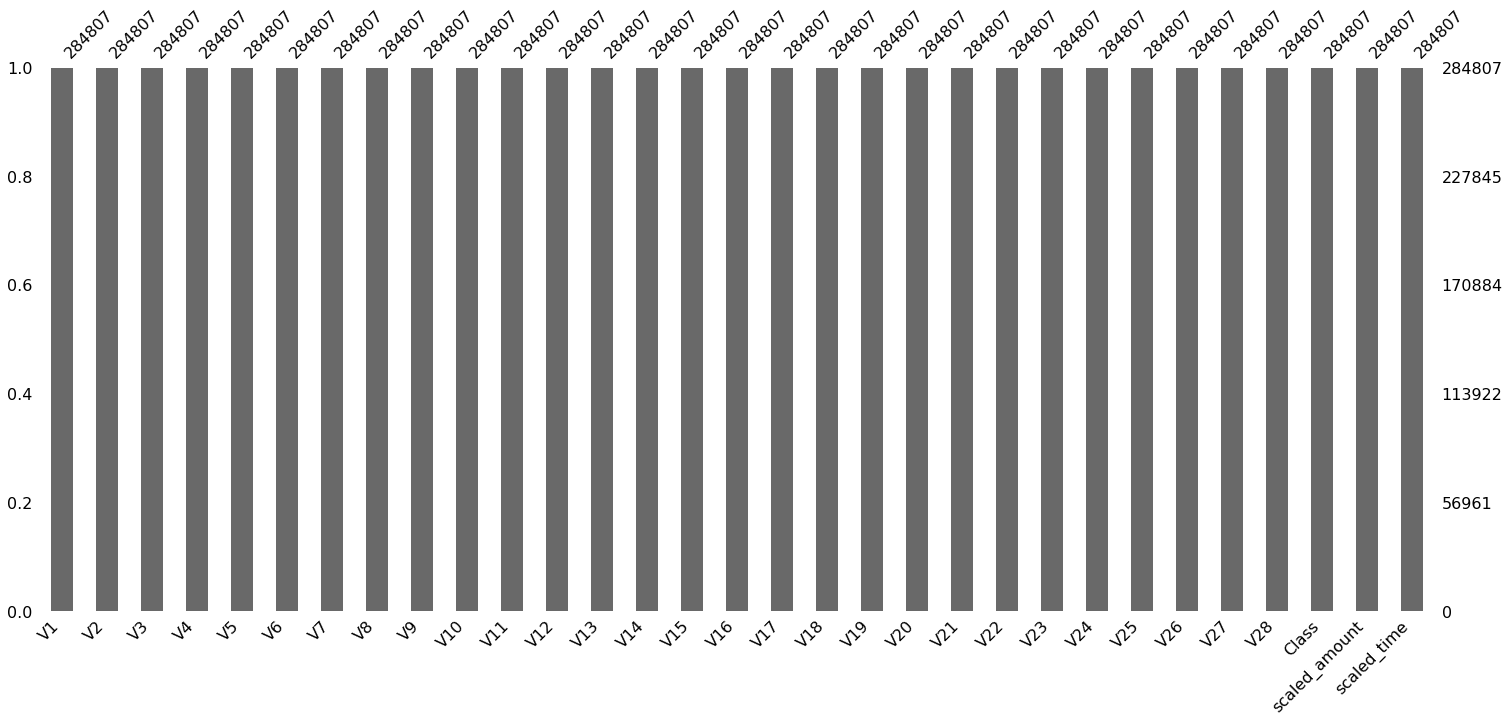

In [ ]:
import missingno as msno
msno.bar(df);

<AxesSubplot:>

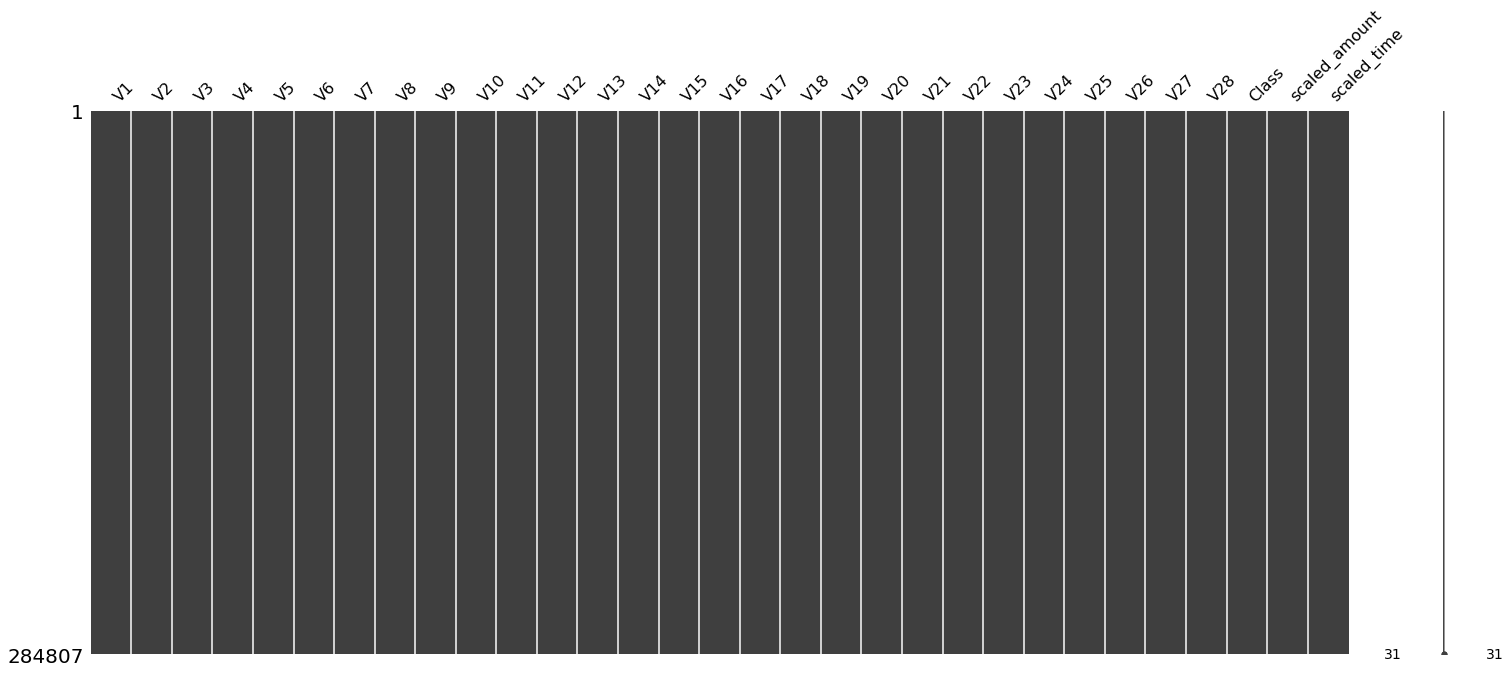

In [ ]:
msno.matrix(df)

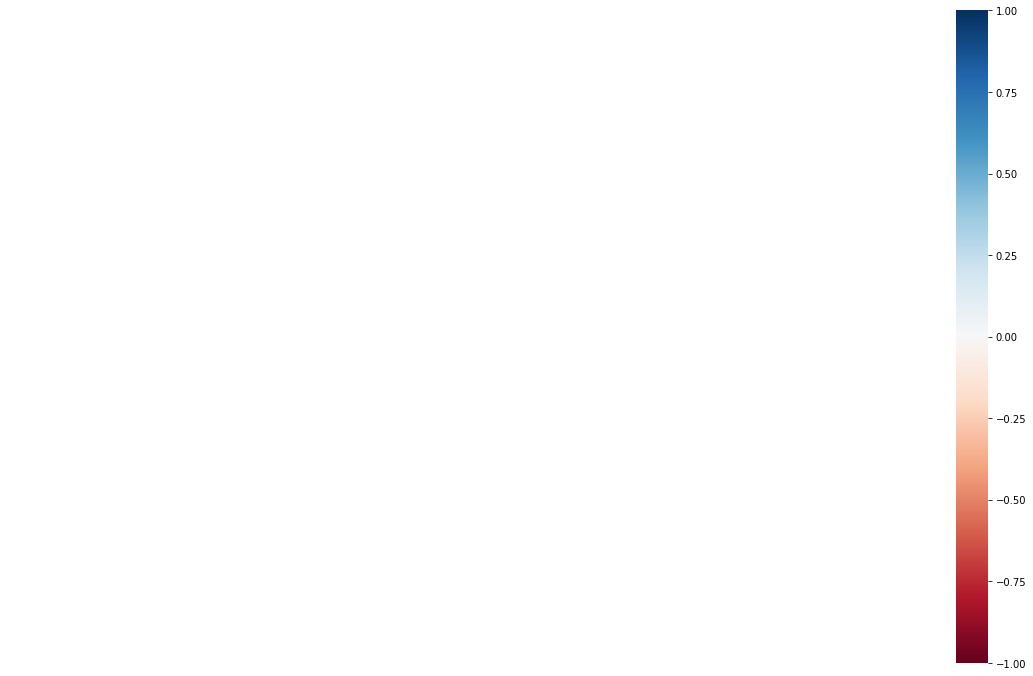

In [ ]:
msno.heatmap(df);

### Handling The Missing Values
- There is no missing values, so no action implemented

## (6) Outlier Analysis
- Outliers must be analyse according to re-sampling method because of to detect anomaly (Fraud Detection).

### Visual Approach

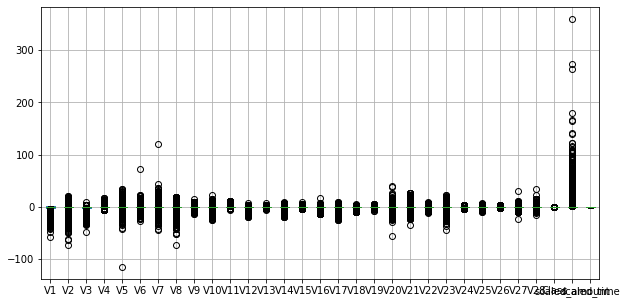

In [ ]:
plt.figure(figsize=(10,5));
df.boxplot();

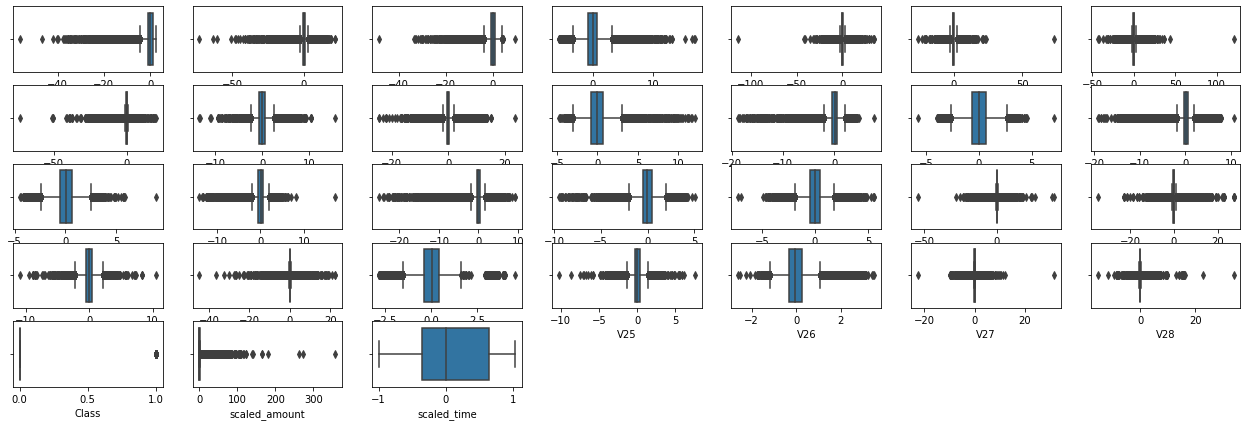

In [ ]:
cum_col_sie = len(df.columns)

plt.figure(figsize=(22, 7))
for i, col in enumerate(df.columns):
  plt.subplot(5, cum_col_sie//5+1, i+1)
  sns.boxplot(df[col]);

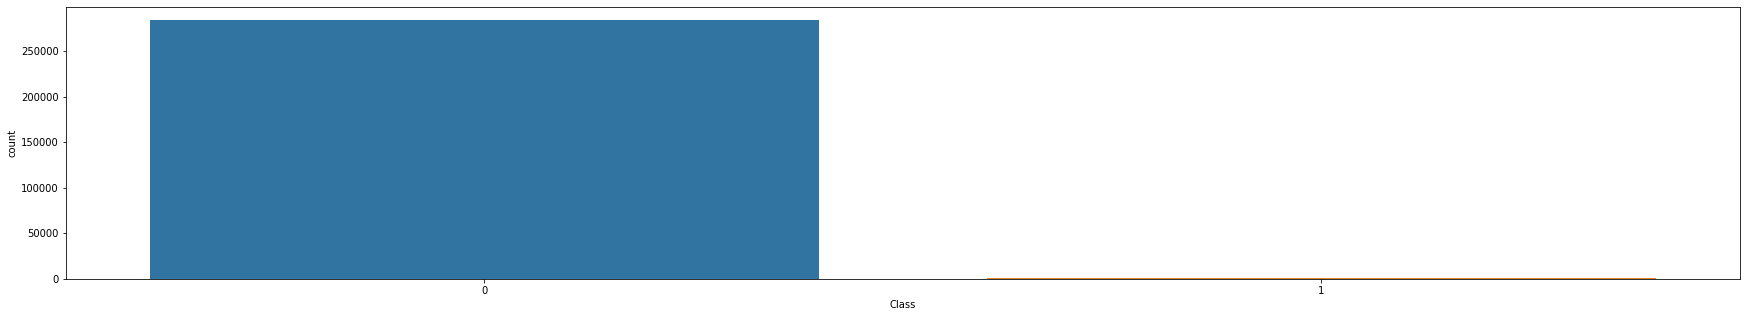

In [ ]:
plt.figure(figsize=(30, 5))
sns.countplot(df["Class"]);

### IQR approach

- Note that
  - If you want to change a certain pertantage of the data for handling outliers.
    - You can adjust the ratio param forn  IQR_calculator funct to adjust inliar range.
  - If the ratio increate, 
    - outlier count will be reduce. Just the most outliers will be captured. 

#### Calculating IQR
- Calculates
  - __IQR__ pandas series for all the given variables
  - __l_th__ lower_threashold pandas series for all the given variables
  - __h_th__ higher_threashold pandas series for all the given variables

In [ ]:
def IQR_calculator(df, ratio=1.5):
    # Calculating the quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # IQR range calculation
    IQR = Q3 -Q1

    # Determinating the boundaries
    lower_threashold = Q1 - ratio * IQR
    higher_threashold = Q3 + ratio *IQR
    
    return IQR, lower_threashold, higher_threashold

In [ ]:
IQR, l_th, h_th = IQR_calculator(df, ratio=1.5)

In [ ]:
from pprint import pprint
for i in [IQR, l_th, h_th]:
  print("-"*20)
  pprint(i)
  print("-"*20, end="\n"*2)

--------------------
V1               2.236015
V2               1.402274
V3               1.917560
V4               1.591981
V5               1.303524
V6               1.166861
V7               1.124512
V8               0.535976
V9               1.240237
V10              0.989349
V11              1.502088
V12              1.023810
V13              1.311044
V14              0.918724
V15              1.231705
V16              0.991333
V17              0.883423
V18              0.999657
V19              0.915248
V20              0.344762
V21              0.414772
V22              1.070904
V23              0.309488
V24              0.794113
V25              0.667861
V26              0.567936
V27              0.161885
V28              0.131240
Class            0.000000
scaled_amount    1.000000
scaled_time      1.000000
dtype: float64
--------------------

--------------------
V1              -4.274396
V2              -2.701961
V3              -3.766705
V4              -3.236612
V5         

### Finding out The outlier values
- Finds __is_outlier__ and __is_outlier_val__ dataframes which include boolean value for ever individual value.

In [ ]:
def find_outlier_single(data:pd.DataFrame, lower_threashold:float, higher_threashold:float)->pd.DataFrame:
    boolean_outlier_df = (data < lower_threashold) | (higher_threashold < data)
    return boolean_outlier_df

In [ ]:
def find_outlier(df:pd.DataFrame, lower_threashold:pd.Series, higher_threashold:pd.Series)->pd.DataFrame:
    data = df[lower_threashold.index]
    boolean_outlier_df = (data < lower_threashold) | (higher_threashold < data)
    return boolean_outlier_df

In [ ]:
# Getting the outlier indexes
is_outlier = find_outlier(df, l_th, h_th)
is_outlier.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   

     V22    V23    V24    V25    V26    V27    V28  Class  scaled_amount  \
0  False  False  False  False  False  False  False  False          False   
1  False  False  False  False  False  False  False  False          False   
2  False   True  False  False  False  False  False  False           True   
3  False  False  False  False  False  False  False  False          False   
4  False  False  False  False  False  False  False  False          False   

   scaled_time  
0        False  
1        False  
2        False  
3        False  
4        False  

[5 rows x 31 columns]

In [ ]:
is_outlier.sum()

V1                7062
V2               13526
V3                3363
V4               11148
V5               12295
V6               22965
V7                8948
V8               24134
V9                8283
V10               9496
V11                780
V12              15348
V13               3368
V14              14149
V15               2894
V16               8184
V17               7420
V18               7533
V19              10205
V20              27770
V21              14497
V22               1317
V23              18541
V24               4774
V25               5367
V26               5596
V27              39163
V28              30342
Class              492
scaled_amount    31904
scaled_time          0
dtype: int64

In [ ]:
df["parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
is_outlier.sum() / df[is_outlier.columns].count()

survived    0.000000
pclass      0.000000
age         0.074074
sibsp       0.051627
parch       0.239057
fare        0.034792
dtype: float64

In [ ]:
# determinating the variables which will be handle for avoiding outlier 
outlier_cols = ["age", "sibsp"]
is_outlier_val = is_outlier[outlier_cols]

In [ ]:
is_outlier_val

age  sibsp
0    False  False
1    False  False
2    False  False
3    False  False
4    False  False
..     ...    ...
886  False  False
887  False  False
888  False  False
889  False  False
890  False  False

[891 rows x 2 columns]

In [ ]:
df["age"][is_outlier_val["age"]].head()

7      2.0
11    58.0
15    55.0
16     2.0
33    66.0
Name: age, dtype: float64

In [ ]:
age_outlier_indexs = df["age"][is_outlier_val["age"]].index
age_outlier_indexs[:5]

Int64Index([7, 11, 15, 16, 33], dtype='int64')

In [ ]:
# Getting Outlier values
age_outlier_values = df[is_outlier_val].iloc[list(age_outlier_indexs)]#[is_outlier_val]
age_outlier_values[outlier_cols].head(10)

age  sibsp
7     2.00    3.0
11   58.00    NaN
15   55.00    NaN
16    2.00    4.0
33   66.00    NaN
54   65.00    NaN
78    0.83    NaN
94   59.00    NaN
96   71.00    NaN
116  70.50    NaN

In [ ]:
df["sibsp"][is_outlier_val["sibsp"]].head()

7     3
16    4
24    3
27    3
50    4
Name: sibsp, dtype: int64

In [ ]:
sibsp_outlier_indexs = df["sibsp"][is_outlier_val["sibsp"]].index
sibsp_outlier_indexs[:5]

Int64Index([7, 16, 24, 27, 50], dtype='int64')

In [ ]:
# Getting Outlier values
sibsp_outlier_values = df[is_outlier_val].iloc[list(sibsp_outlier_indexs)]#[is_outlier_val]
sibsp_outlier_values[outlier_cols].head(10)

age  sibsp
7   2.0    3.0
16  2.0    4.0
24  NaN    3.0
27  NaN    3.0
50  NaN    4.0
59  NaN    5.0
63  NaN    3.0
68  NaN    4.0
71  NaN    5.0
85  NaN    3.0

### Handling outlier
- Handling depend the re-sampling approach to detect anomaly. It will be handle the outliers while re-sample training.

# (D) Exploratory Data Analysis

## Dataset 

### Spesifications

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   V1             284807 non-null  float64
 1   V2             284807 non-null  float64
 2   V3             284807 non-null  float64
 3   V4             284807 non-null  float64
 4   V5             284807 non-null  float64
 5   V6             284807 non-null  float64
 6   V7             284807 non-null  float64
 7   V8             284807 non-null  float64
 8   V9             284807 non-null  float64
 9   V10            284807 non-null  float64
 10  V11            284807 non-null  float64
 11  V12            284807 non-null  float64
 12  V13            284807 non-null  float64
 13  V14            284807 non-null  float64
 14  V15            284807 non-null  float64
 15  V16            284807 non-null  float64
 16  V17            284807 non-null  float64
 17  V18            284807 non-nul

In [ ]:
df.describe().T

count          mean       std         min       25%  \
V1             284807.0  1.168375e-15  1.958696  -56.407510 -0.920373   
V2             284807.0  3.416908e-16  1.651309  -72.715728 -0.598550   
V3             284807.0 -1.379537e-15  1.516255  -48.325589 -0.890365   
V4             284807.0  2.074095e-15  1.415869   -5.683171 -0.848640   
V5             284807.0  9.604066e-16  1.380247 -113.743307 -0.691597   
V6             284807.0  1.487313e-15  1.332271  -26.160506 -0.768296   
V7             284807.0 -5.556467e-16  1.237094  -43.557242 -0.554076   
V8             284807.0  1.213481e-16  1.194353  -73.216718 -0.208630   
V9             284807.0 -2.406331e-15  1.098632  -13.434066 -0.643098   
V10            284807.0  2.239053e-15  1.088850  -24.588262 -0.535426   
V11            284807.0  1.673327e-15  1.020713   -4.797473 -0.762494   
V12            284807.0 -1.247012e-15  0.999201  -18.683715 -0.405571   
V13            284807.0  8.190001e-16  0.995274   -5.791881 -0.648539   
V14            284807.0  1.207294e-15  0.958596  -19.214325 -0.425574   
V15            284807.0  4.887456e-15  0.915316   -4.498945 -0.582884   
V16            284807.0  1.437716e-15  0.876253  -14.129855 -0.468037   
V17            284807.0 -3.772171e-16  0.849337  -25.162799 -0.483748   
V18            284807.0  9.564149e-16  0.838176   -9.498746 -0.498850   
V19            284807.0  1.039917e-15  0.814041   -7.213527 -0.456299   
V20            284807.0  6.406204e-16  0.770925  -54.497720 -0.211721   
V21            284807.0  1.654067e-16  0.734524  -34.830382 -0.228395   
V22            284807.0 -3.568593e-16  0.725702  -10.933144 -0.542350   
V23            284807.0  2.578648e-16  0.624460  -44.807735 -0.161846   
V24            284807.0  4.473266e-15  0.605647   -2.836627 -0.354586   
V25            284807.0  5.340915e-16  0.521278  -10.295397 -0.317145   
V26            284807.0  1.683437e-15  0.482227   -2.604551 -0.326984   
V27            284807.0 -3.660091e-16  0.403632  -22.565679 -0.070840   
V28            284807.0 -1.227390e-16  0.330083  -15.430084 -0.052960   
Class          284807.0  1.727486e-03  0.041527    0.000000  0.000000   
scaled_amount  284807.0  9.271239e-01  3.495006   -0.307413 -0.229162   
scaled_time    284807.0  1.189142e-01  0.557903   -0.994983 -0.358210   

                    50%       75%         max  
V1             0.018109  1.315642    2.454930  
V2             0.065486  0.803724   22.057729  
V3             0.179846  1.027196    9.382558  
V4            -0.019847  0.743341   16.875344  
V5            -0.054336  0.611926   34.801666  
V6            -0.274187  0.398565   73.301626  
V7             0.040103  0.570436  120.589494  
V8             0.022358  0.327346   20.007208  
V9            -0.051429  0.597139   15.594995  
V10           -0.092917  0.453923   23.745136  
V11           -0.032757  0.739593   12.018913  
V12            0.140033  0.618238    7.848392  
V13           -0.013568  0.662505    7.126883  
V14            0.050601  0.493150   10.526766  
V15            0.048072  0.648821    8.877742  
V16            0.066413  0.523296   17.315112  
V17           -0.065676  0.399675    9.253526  
V18           -0.003636  0.500807    5.041069  
V19            0.003735  0.458949    5.591971  
V20           -0.062481  0.133041   39.420904  
V21           -0.029450  0.186377   27.202839  
V22            0.006782  0.528554   10.503090  
V23           -0.011193  0.147642   22.528412  
V24            0.040976  0.439527    4.584549  
V25            0.016594  0.350716    7.519589  
V26           -0.052139  0.240952    3.517346  
V27            0.001342  0.091045   31.612198  
V28            0.011244  0.078280   33.847808  
Class          0.000000  0.000000    1.000000  
scaled_amount  0.000000  0.770838  358.683155  
scaled_time    0.000000  0.641790    1.035022

In [ ]:
pd.unique(df.select_dtypes(include=["category"]).values.ravel('k'))

array([], dtype=float64)

### Temporary encoding

In [ ]:
encoded_df = df.copy()

In [ ]:
for col in encoded_df.select_dtypes(include= ["category"]):
  encoded_df[col] = encoded_df[col].cat.codes

In [ ]:
for col in encoded_df.select_dtypes(include=[bool]):
  encoded_df[col] = encoded_df[col].astype(int)

In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   V1             284807 non-null  float64
 1   V2             284807 non-null  float64
 2   V3             284807 non-null  float64
 3   V4             284807 non-null  float64
 4   V5             284807 non-null  float64
 5   V6             284807 non-null  float64
 6   V7             284807 non-null  float64
 7   V8             284807 non-null  float64
 8   V9             284807 non-null  float64
 9   V10            284807 non-null  float64
 10  V11            284807 non-null  float64
 11  V12            284807 non-null  float64
 12  V13            284807 non-null  float64
 13  V14            284807 non-null  float64
 14  V15            284807 non-null  float64
 15  V16            284807 non-null  float64
 16  V17            284807 non-null  float64
 17  V18            284807 non-nul

## Univariate Analysis

In [ ]:
num_cols = df.select_dtypes(include=("int64","float64"), exclude=("bool") ).columns
cat_cols = df.select_dtypes(exclude=("int64","float64")).columns

In [ ]:
num_cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'scaled_time'],
      dtype='object')

In [ ]:
len(df.columns), df.columns

(31, Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
        'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
        'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
        'scaled_amount', 'scaled_time'],
       dtype='object'))

In [ ]:
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Empty DataFrame

In [ ]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   V1             284807 non-null  float64
 1   V2             284807 non-null  float64
 2   V3             284807 non-null  float64
 3   V4             284807 non-null  float64
 4   V5             284807 non-null  float64
 5   V6             284807 non-null  float64
 6   V7             284807 non-null  float64
 7   V8             284807 non-null  float64
 8   V9             284807 non-null  float64
 9   V10            284807 non-null  float64
 10  V11            284807 non-null  float64
 11  V12            284807 non-null  float64
 12  V13            284807 non-null  float64
 13  V14            284807 non-null  float64
 14  V15            284807 non-null  float64
 15  V16            284807 non-null  float64
 16  V17            284807 non-null  float64
 17  V18            284807 non-nul

### Target Variable

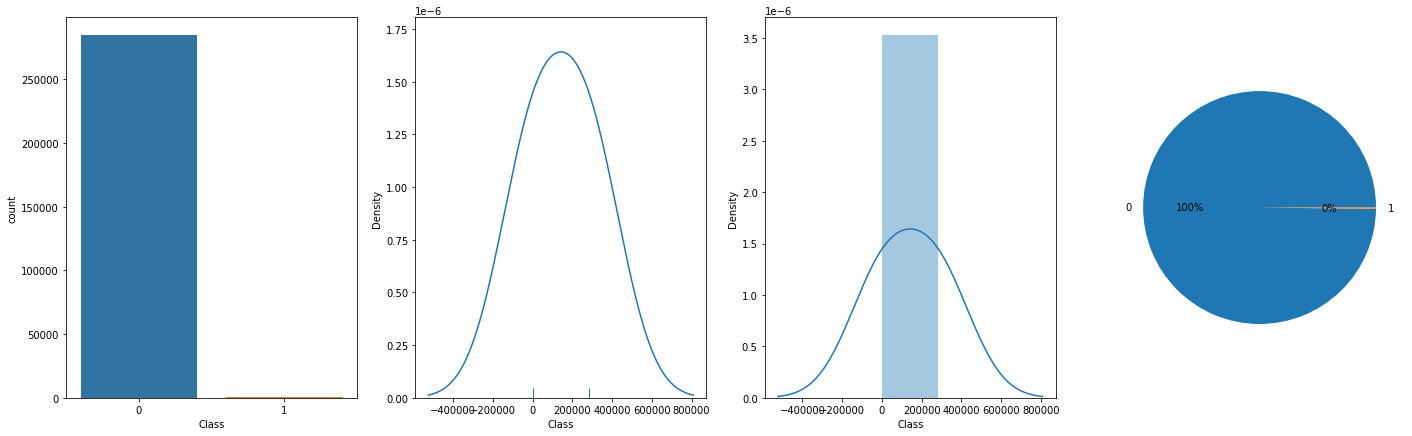

In [ ]:
target_var = "Class"

plt.figure(figsize=(24,7))

plt.subplot(1,4,1)
sns.countplot(data=df, x=target_var);

plt.subplot(1,4,2)
sns.distplot(df[target_var].value_counts(), rug=True, hist=False);

plt.subplot(1,4,3)
sns.distplot(df[target_var].value_counts(), rug=False, hist=True);

plt.subplot(1,4,4)
plt.pie(df[target_var].value_counts(), labels=df[target_var].unique(), autopct="%.0f%%");

### Feature Variables [Numerical]

#### setting the plotting params

In [ ]:
# Defining the params
target_var = "Class"
#num_cols = df.select_dtypes(exclude='category').columns
num_col_size = len(df.columns)
cols, rows = (5, num_col_size//5 + 1) if num_col_size > 5 else (5, 1) 
figsize = (cols*7, rows*5)

#### [histplot] Distributions

In [ ]:
num_cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'scaled_time'],
      dtype='object')

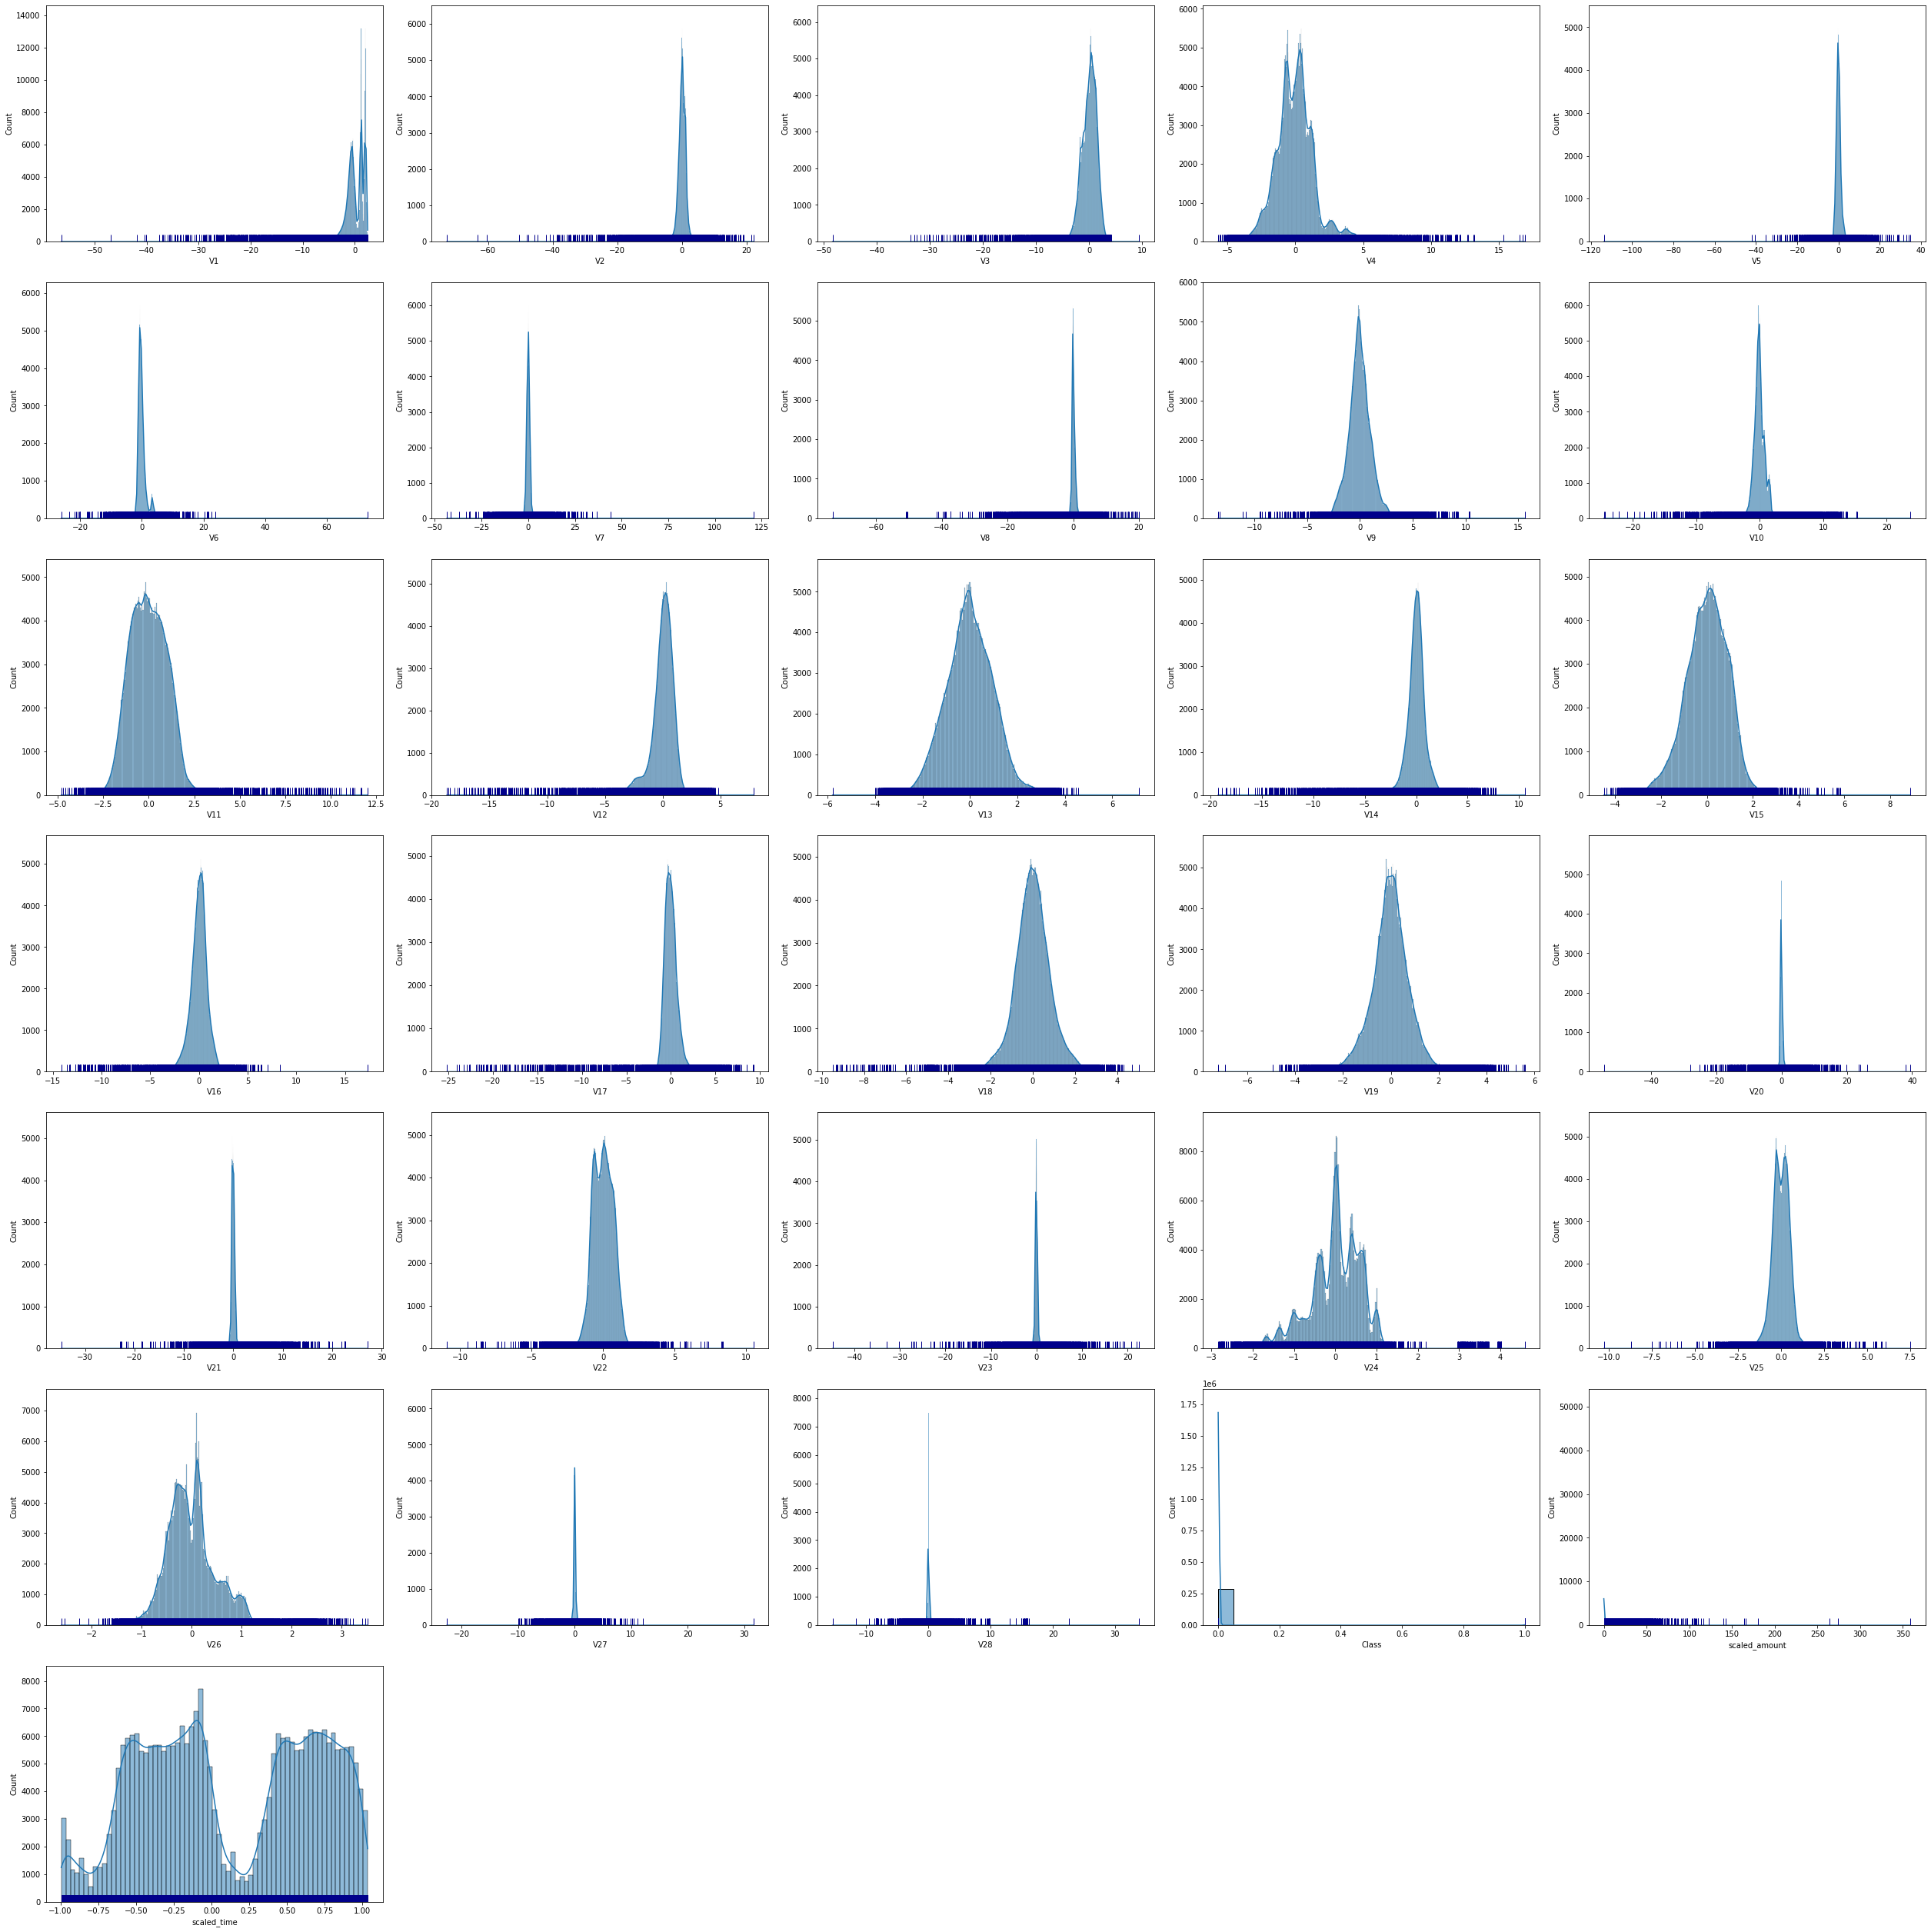

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x=df[col], data=df, kde=True, ax=ax)
    sns.rugplot(x=df[col], data=df, height=.03, color='darkblue', ax=ax)
    
fig.tight_layout()  
plt.show()

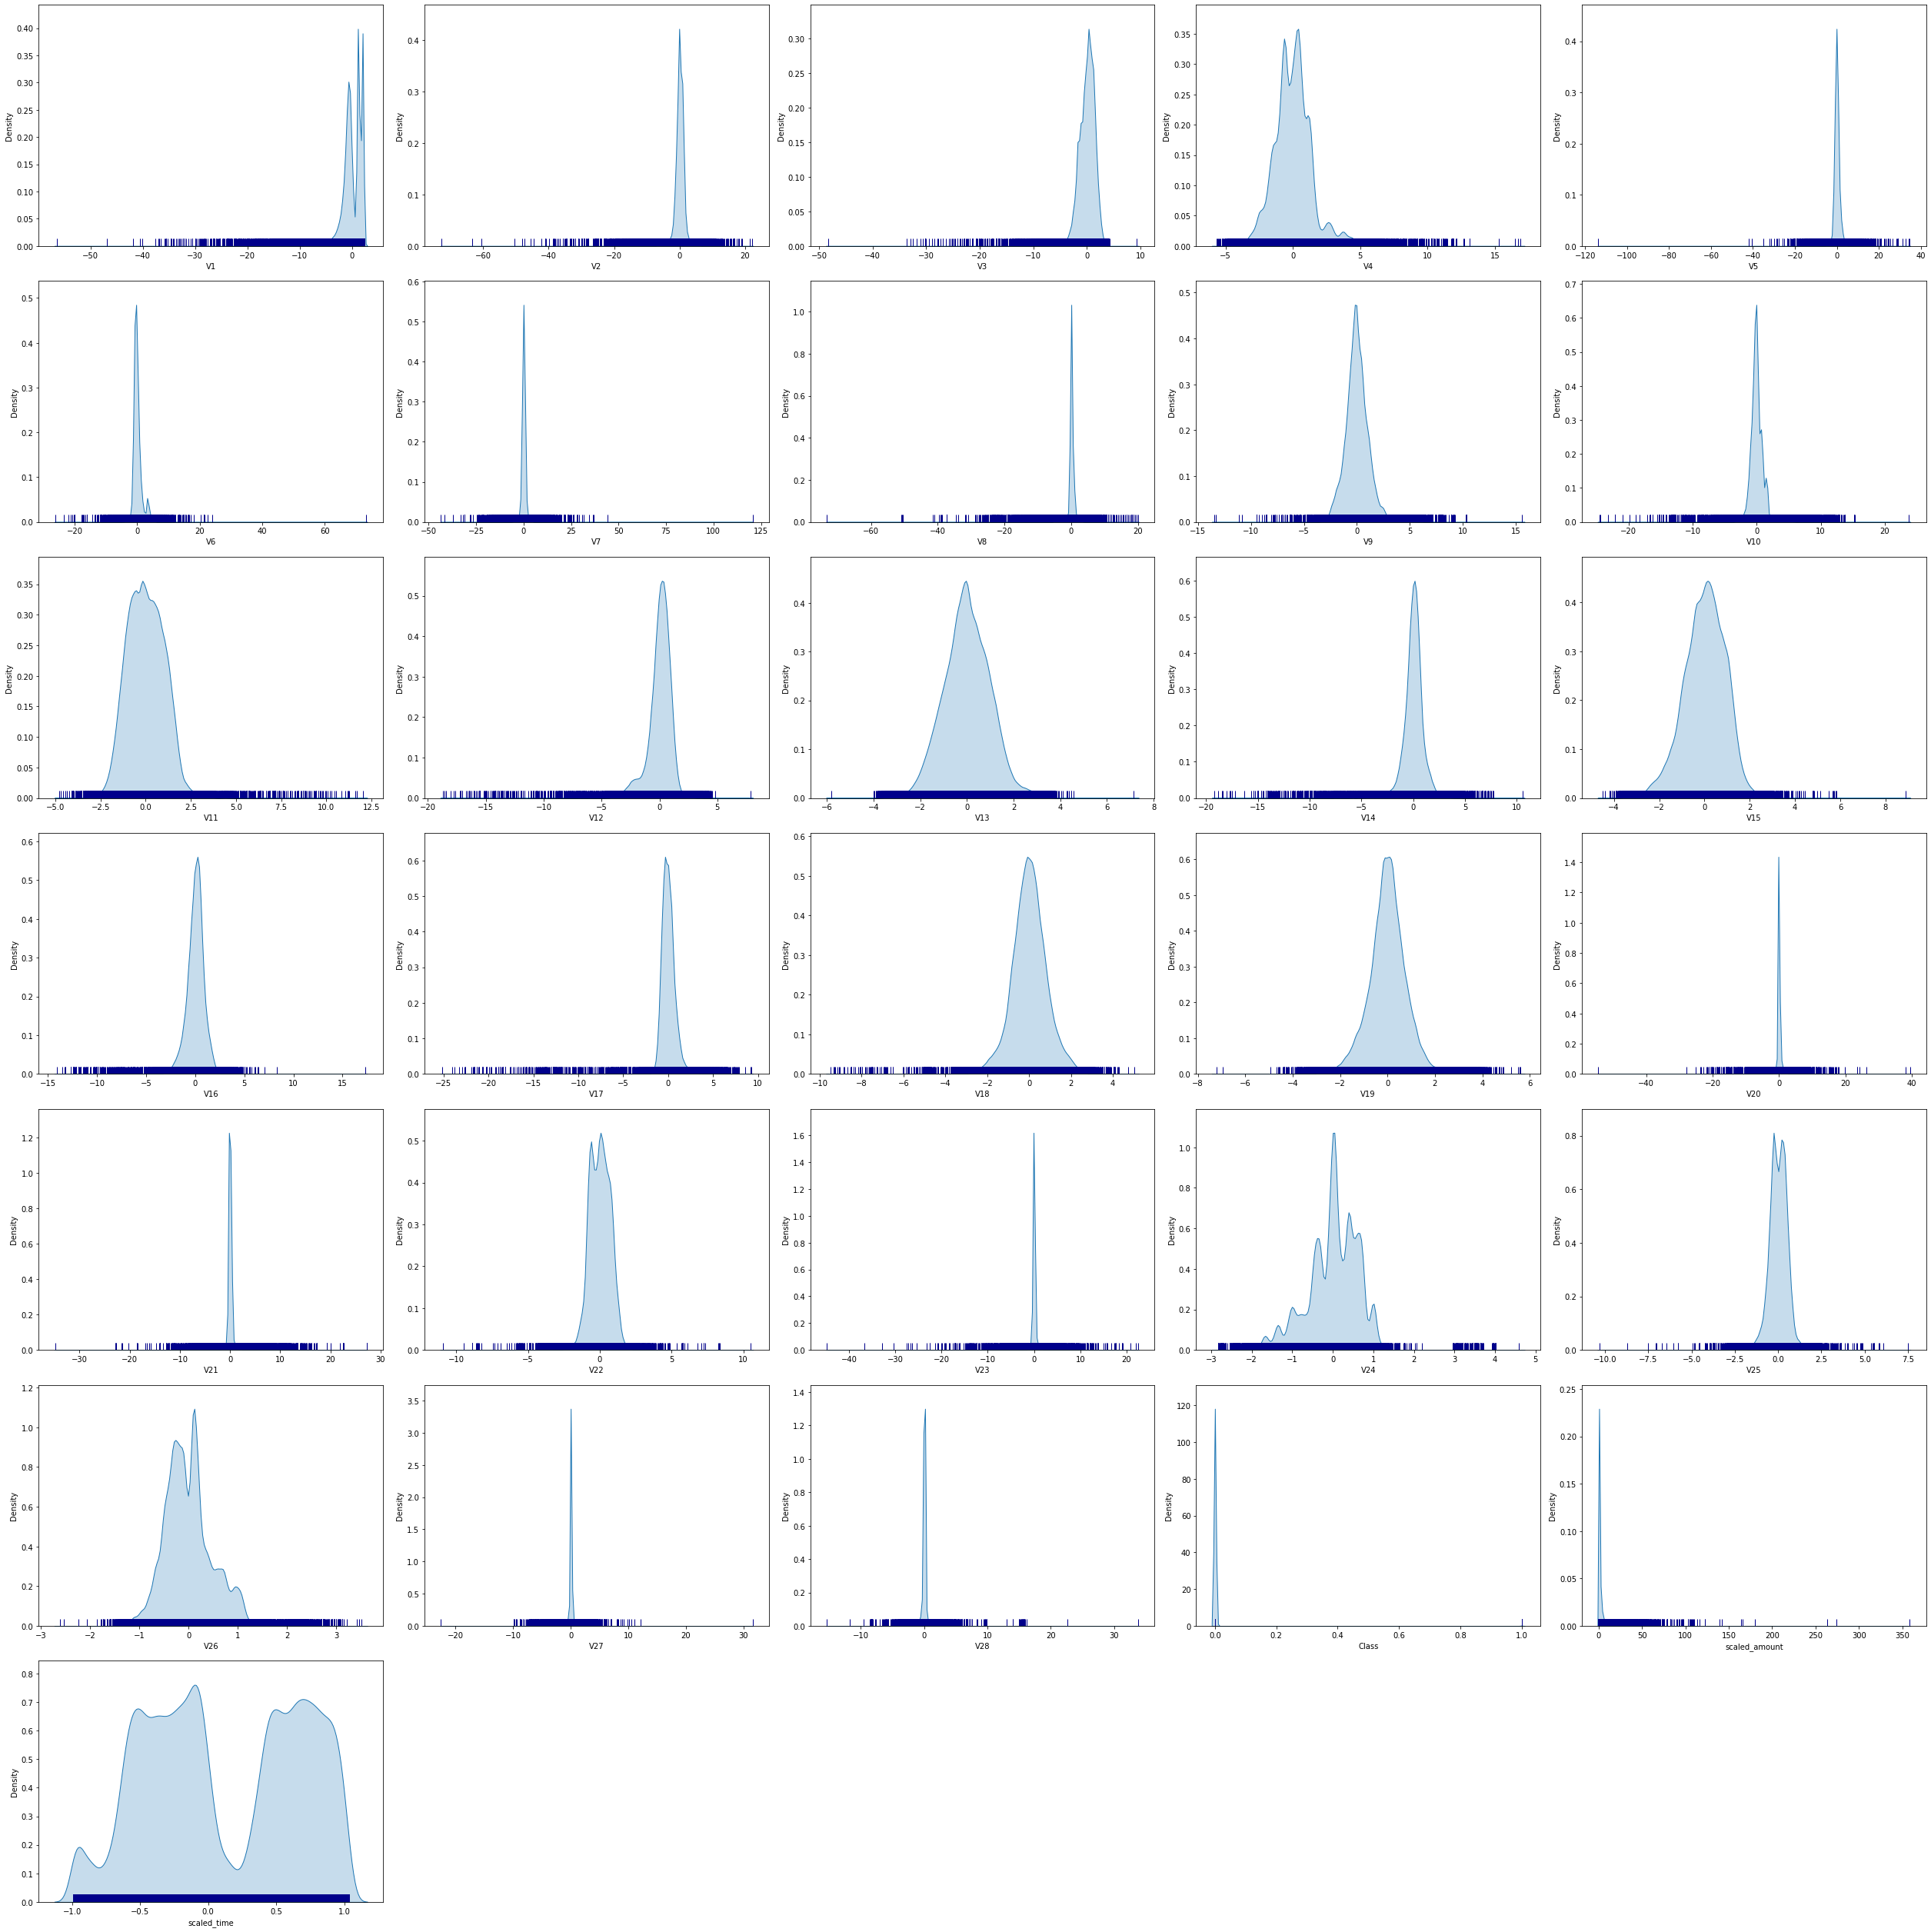

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.kdeplot(x=df[col], data=df ,shade=True, ax=ax)
    sns.rugplot(x=df[col], data=df, height=.03, color='darkblue', ax=ax)
    
fig.tight_layout()  
plt.show()

#### [boxplot] Distributions with quartiles (Outlier)

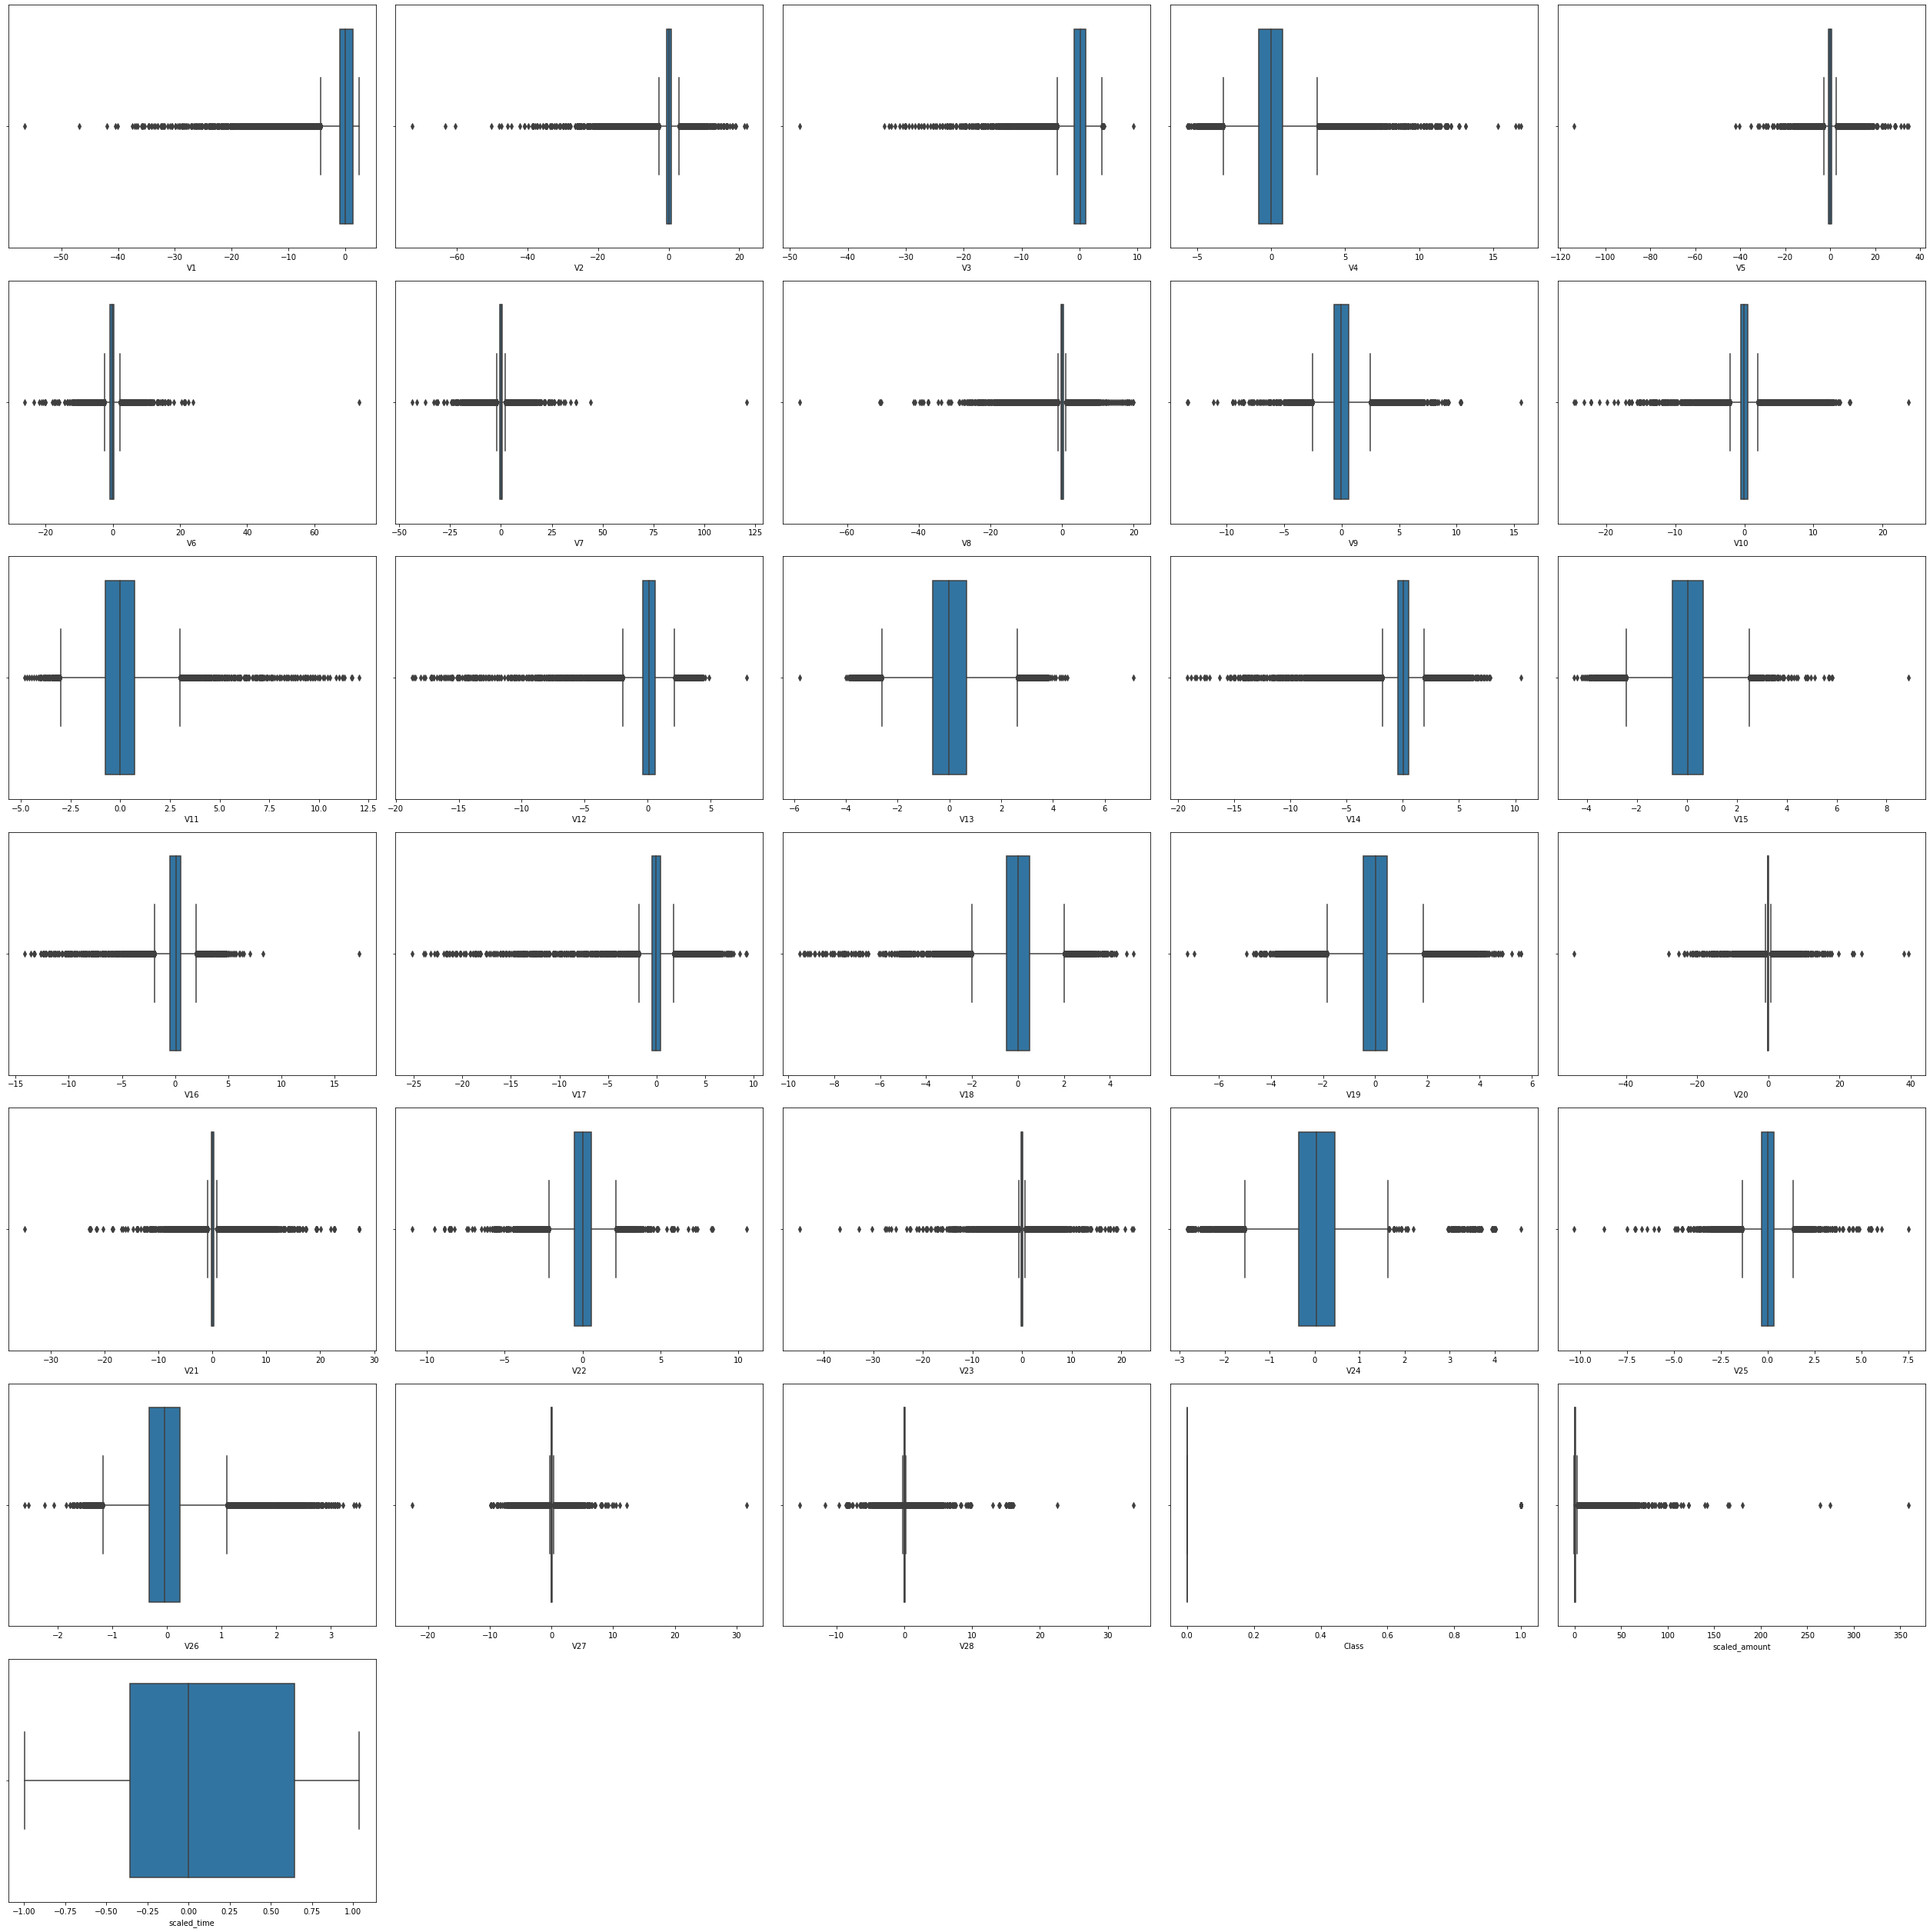

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [scatterplot] Spread of data 

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)

    sns.scatterplot(x = df[col].index, y= df[col], hue=df[target_var], ax=ax)
    
fig.tight_layout()  
plt.show()

## Relations

### Correlation

In [ ]:
df.corr()

V1            V2            V3            V4  \
V1             1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2             4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3            -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4            -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5             1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6            -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7            -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8            -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9            -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10            7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11            2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12            2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13           -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14           -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15            3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16            7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17           -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18            3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19            1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20            4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21           -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22           -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23            6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24           -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25           -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26           -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27            1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28            2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Class         -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   
scaled_amount -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
scaled_time    1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   

                         V5            V6            V7            V8  \
V1             1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16   
V2             5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17   
V3            -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15   
V4            -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16   
V5             1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16   
V6             2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16   
V7             2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16   
V8             7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00   
V9             7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16   
V10           -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16   
V11            7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16   
V12            7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16   
V13            5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16   
V14            6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16   
V15           -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16   
V16            2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16   
V17            1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16   
V18            5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e-16   
V19           -1.450421e-16 -1.865597e-16 -1.881008e-16 -3.875186e-16   
V20           -3.554057e-16 -1.858755e-16  9.379684e-16  2.033737e-16   
V21           -3.920976e-16  5.833316e-17 -2.027779e-16  3.892798e-16   
V22            1.253751e-16 -4.705235e-19 -8.898922e-16  2.026927e-16   
V23      

<AxesSubplot:>

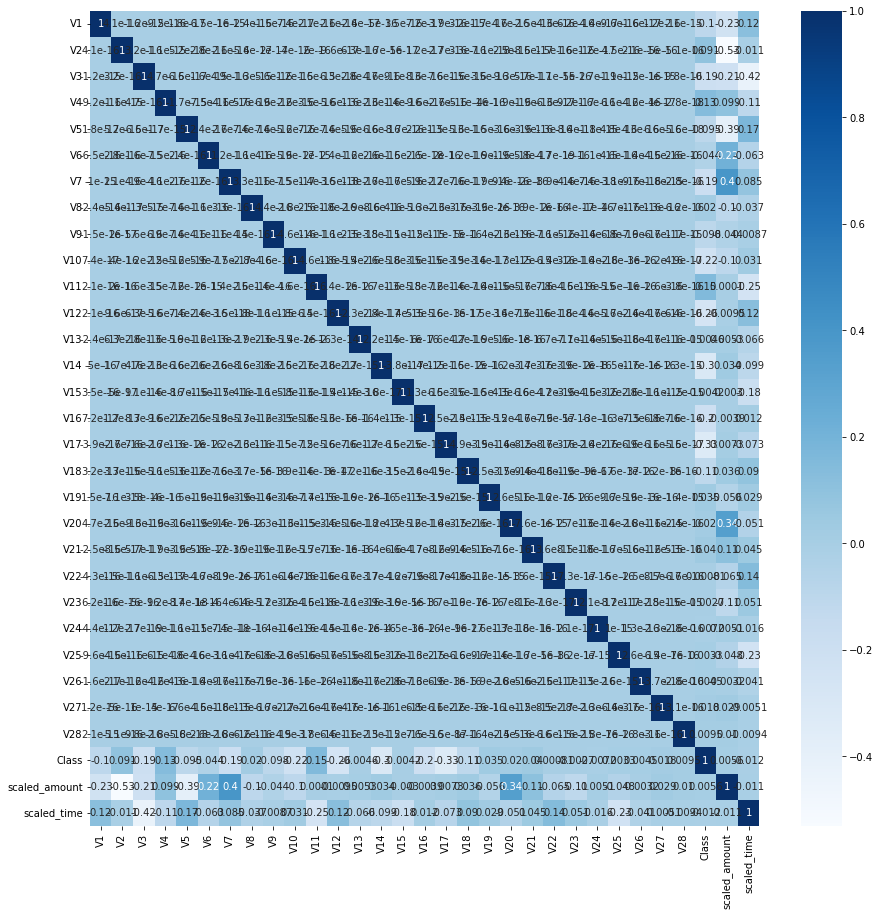

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

<AxesSubplot:>

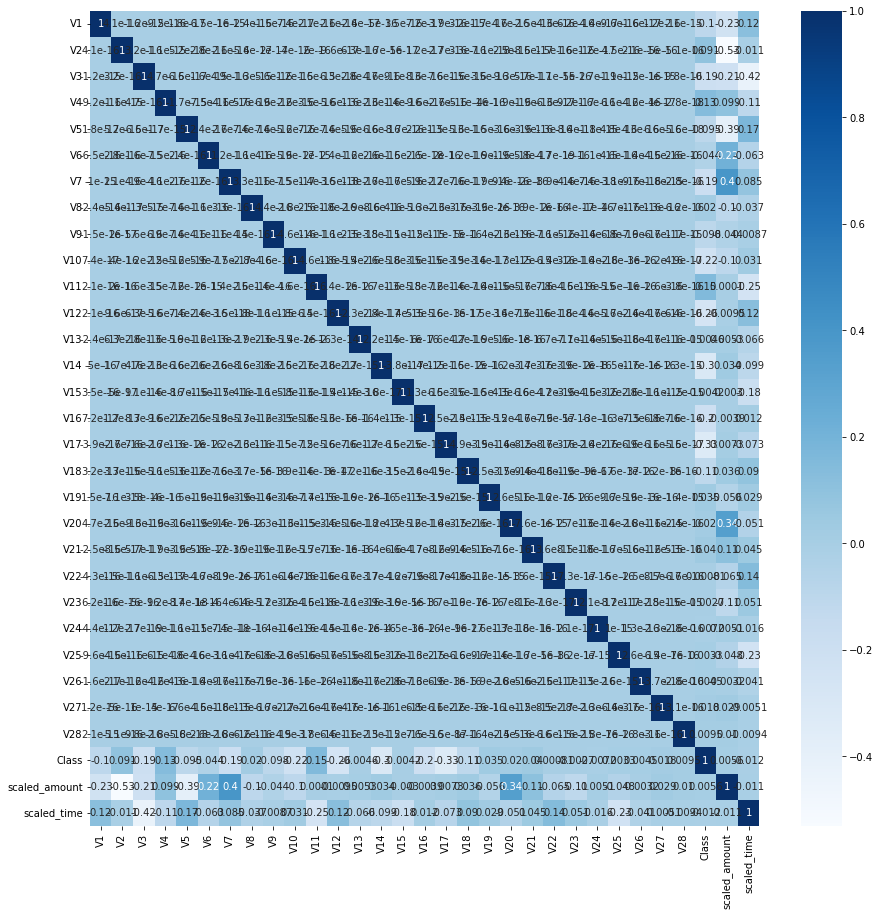

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(encoded_df.corr(), annot=True, cmap='Blues')

<AxesSubplot:>

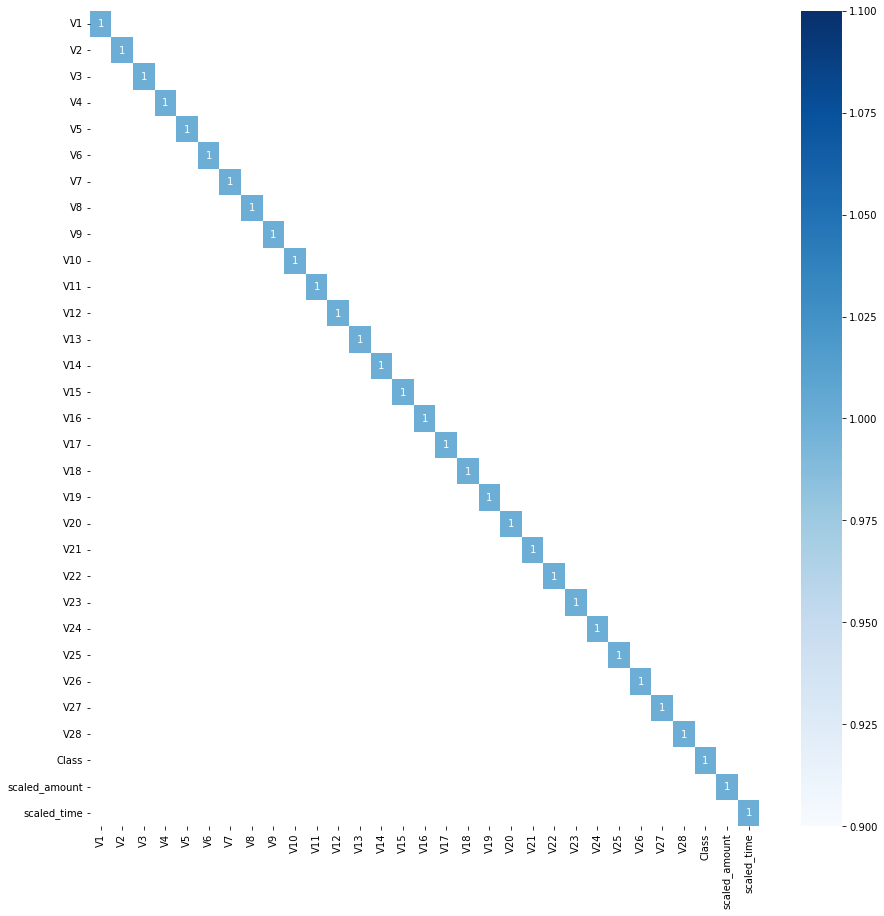

In [ ]:
plt.figure(figsize=(15,15))
th = 0.7
sns.heatmap(encoded_df.corr()[encoded_df.corr() > th], annot=True, cmap='Blues')

### Variances

In [ ]:
df.var().sort_values(ascending=False)

scaled_amount    12.215067
V1                3.836489
V2                2.726820
V3                2.299029
V4                2.004684
V5                1.905081
V6                1.774946
V7                1.530401
V8                1.426479
V9                1.206992
V10               1.185594
V11               1.041855
V12               0.998403
V13               0.990571
V14               0.918906
V15               0.837803
V16               0.767819
V17               0.721373
V18               0.702539
V19               0.662662
V20               0.594325
V21               0.539526
V22               0.526643
V23               0.389951
V24               0.366808
scaled_time       0.311256
V25               0.271731
V26               0.232543
V27               0.162919
V28               0.108955
Class             0.001725
dtype: float64

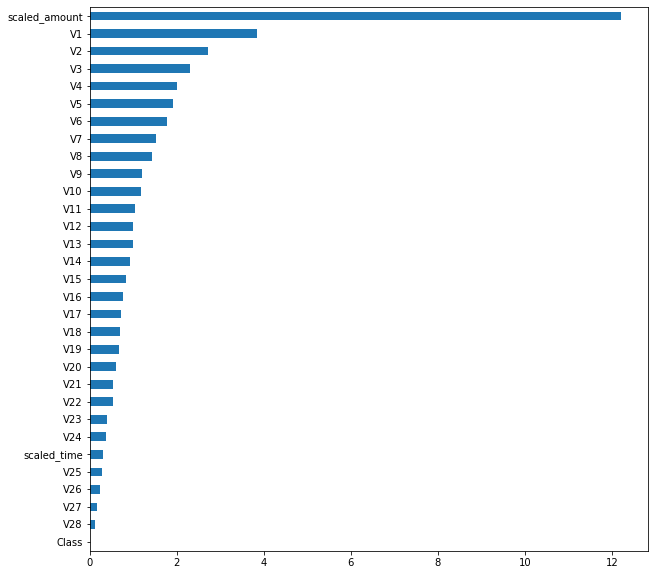

In [ ]:
plt.figure(figsize=(10, 10))
df.var().sort_values(ascending=True).plot.barh();

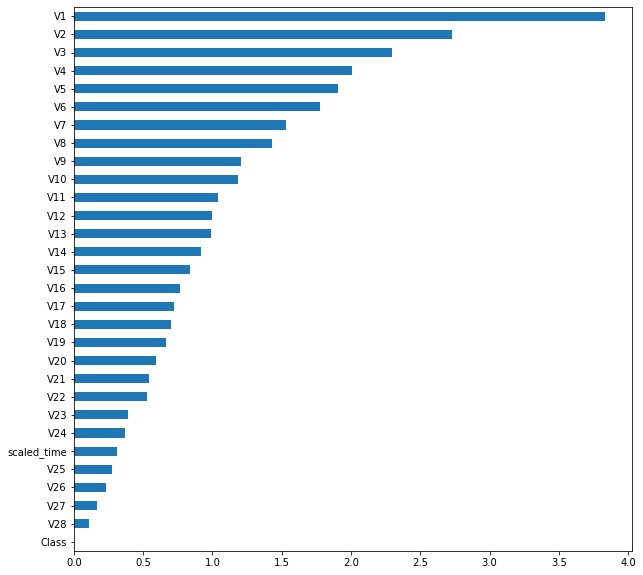

In [ ]:
plt.figure(figsize=(10, 10))
df.loc[:, df.columns != "scaled_amount"].var().sort_values(ascending=True).plot.barh();

In [ ]:
encoded_df.var().sort_values(ascending=False)

scaled_amount    12.215067
V1                3.836489
V2                2.726820
V3                2.299029
V4                2.004684
V5                1.905081
V6                1.774946
V7                1.530401
V8                1.426479
V9                1.206992
V10               1.185594
V11               1.041855
V12               0.998403
V13               0.990571
V14               0.918906
V15               0.837803
V16               0.767819
V17               0.721373
V18               0.702539
V19               0.662662
V20               0.594325
V21               0.539526
V22               0.526643
V23               0.389951
V24               0.366808
scaled_time       0.311256
V25               0.271731
V26               0.232543
V27               0.162919
V28               0.108955
Class             0.001725
dtype: float64

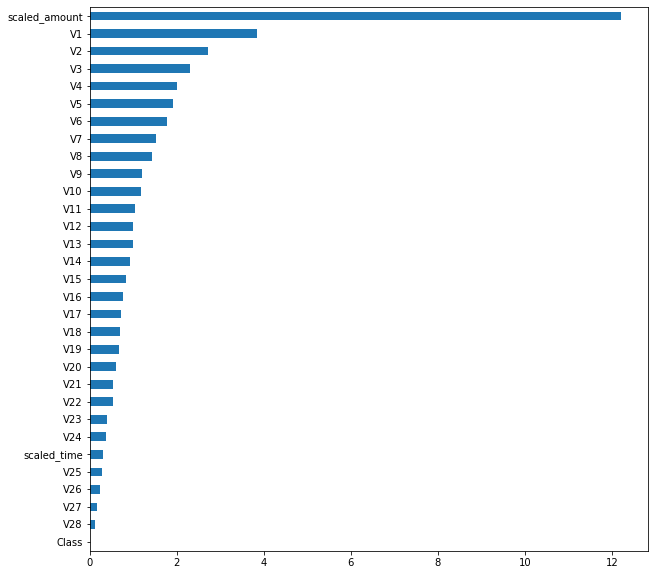

In [ ]:
plt.figure(figsize=(10, 10))
encoded_df.var().sort_values(ascending=True).plot.barh();

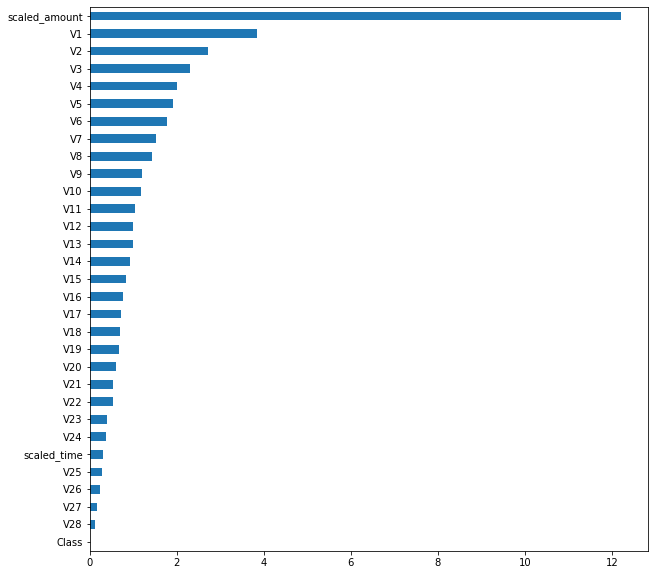

In [ ]:
plt.figure(figsize=(10, 10))
encoded_df.loc[:, df.columns != "age"].var().sort_values(ascending=True).plot.barh();

### Covariance between target var

#### Way-1

In [ ]:
def numerical_covariance(df, target_var):
    # Separate out numerical columns
    numerical_cols = df.select_dtypes(include=[int, float, "int8", bool]).columns

    # Create a copy of the DataFrame with only the numerical columns
    numerical_df = df[numerical_cols].copy()

    # If the target variable is categorical, encode it temporarily
    if df[target_var].dtype == 'object' or df[target_var].dtype == 'category':
        temp_encode = pd.get_dummies(df[target_var], prefix=target_var)
        numerical_df = pd.concat([numerical_df, temp_encode], axis=1)
        target_var = temp_encode.columns[0]

    # Calculate the covariance between each numerical column and the target variable
    covariances = numerical_df.cov()[target_var]

    # Return the result as a pandas Series
    return covariances

In [ ]:
covariances = numerical_covariance(df, target_var)
covariances

V1              -0.008244
V2               0.006260
V3              -0.012150
V4               0.007846
V5              -0.005444
V6              -0.002415
V7              -0.009620
V8               0.000986
V9              -0.004459
V10             -0.009807
V11              0.006565
V12             -0.010813
V13             -0.000189
V14             -0.012044
V15             -0.000161
V16             -0.007152
V17             -0.011515
V18             -0.003880
V19              0.001176
V20              0.000643
V21              0.001233
V22              0.000024
V23             -0.000070
V24             -0.000182
V25              0.000072
V26              0.000089
V27              0.000295
V28              0.000131
Class            0.001725
scaled_amount    0.000817
scaled_time     -0.000285
Name: Class, dtype: float64

<AxesSubplot:>

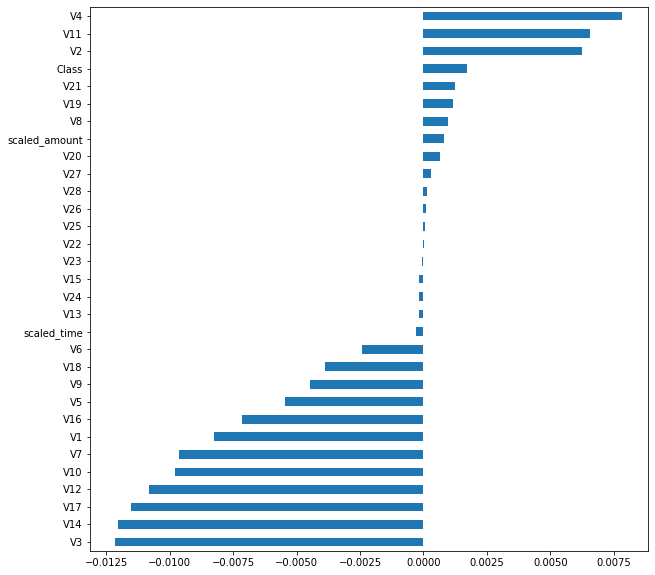

In [ ]:
plt.figure(figsize=(10, 10))
covariances.sort_values(ascending=True).plot.barh()

<AxesSubplot:>

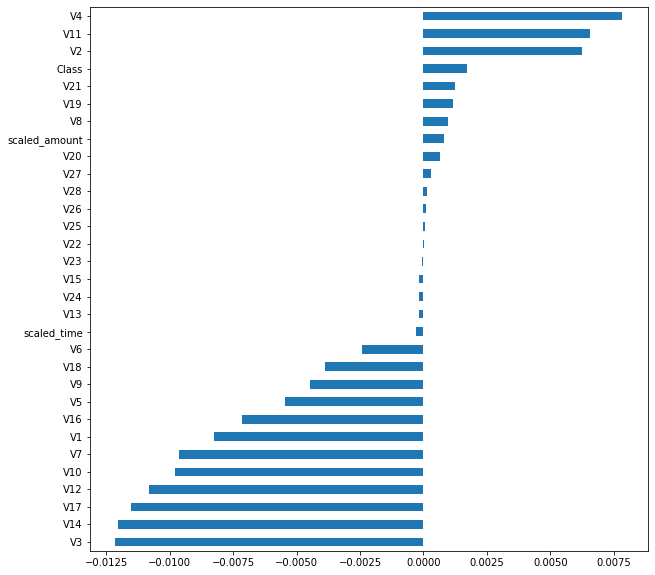

In [ ]:
plt.figure(figsize=(10, 10))
numerical_covariance(encoded_df, target_var).sort_values(ascending=True).plot.barh()

#### Way-2
```python
# Calculate the covariance between the target and the feature
cov = {  col: [ np.cov(df[target_var].cat.codes, df[col])[0,1] ] for col in num_cols }
cov_s = pd.Series(np.squeeze(list(cov.values())), index=cov.keys())
cov_s
```

### Quick Variable Relation Recap

In [ ]:
def rel_filter(df:pd.DataFrame, th:float)->pd.DataFrame:
  # Calculating the relations
  corr = df.corr()

  # filtering the relations
  filtered_corr = corr[corr > th]  if th > 0.0 else corr[corr < th]

  return filtered_corr

def rel_plotter(corr:pd.DataFrame, title:str="Correlations", figsize:tuple=None, cmap="Blues", annot=True):
  
  # plotting configurations
  if figsize != None: plt.figure(figsize=figsize)

  # plotting the relattions
  sns.heatmap(corr, cmap="Blues", annot=True)
  plt.title(title);

def get_relations(corr:pd.DataFrame, th:float)->list:

  # decleration of params
  columns = corr.columns
  is_exceed = (lambda rel: rel > th)  if th > 0 else (lambda rel: rel < th)  

  # getting the column names which exceedes the threashold
  filtered_relations = list()
  for row in columns:
    for col in columns:
        
        # Pass the correaltion with itself
        if col==row: continue

        # Collect variables which exvide threashold correlation 
        cur_corr = corr.loc[row, col]
        if  is_exceed(cur_corr):

          # Check whether the record have already added
          is_already_added = [ all([ e in record for e in [row, col] ])  for record in filtered_relations ]
          
          # Add if it have not already added
          if not any(is_already_added): filtered_relations.append([row, col, np.round(cur_corr, 2)]) 
  
  return filtered_relations

In [ ]:
get_relations(undersampled_df.corr(), 0.85)

[['V1', 'V3', 0.88],
 ['V1', 'V5', 0.87],
 ['V1', 'V7', 0.88],
 ['V3', 'V7', 0.89],
 ['V3', 'V10', 0.86],
 ['V7', 'V10', 0.87],
 ['V10', 'V12', 0.88],
 ['V10', 'V16', 0.85],
 ['V10', 'V17', 0.85],
 ['V12', 'V14', 0.88],
 ['V12', 'V16', 0.89],
 ['V12', 'V17', 0.88],
 ['V16', 'V17', 0.95],
 ['V16', 'V18', 0.91],
 ['V17', 'V18', 0.94]]

In [ ]:
get_relations(undersampled_df.corr(), (-0.7))

[['V1', 'V2', -0.8],
 ['V2', 'V3', -0.86],
 ['V2', 'V5', -0.78],
 ['V2', 'V7', -0.86],
 ['V2', 'V9', -0.71],
 ['V2', 'V10', -0.77],
 ['V3', 'V4', -0.77],
 ['V3', 'V11', -0.72],
 ['V4', 'V7', -0.7],
 ['V4', 'V9', -0.79],
 ['V4', 'V10', -0.8],
 ['V4', 'V12', -0.84],
 ['V4', 'V14', -0.79],
 ['V4', 'V16', -0.72],
 ['V4', 'V17', -0.71],
 ['V9', 'V11', -0.7],
 ['V10', 'V11', -0.8],
 ['V11', 'V12', -0.9],
 ['V11', 'V14', -0.89],
 ['V11', 'V16', -0.81],
 ['V11', 'V17', -0.78],
 ['V14', 'Class', -0.75],
 ['V21', 'V22', -0.75]]

In [ ]:
def get_var_corrs(df:pd.DataFrame, var:str, top_n:int=5, th:float=None):
  # checking the params whether valid
  if var not in df.columns: raise f"'{var}' column does not exist in the dataframe"

  # Calculating the correlation
  var_corrs = df.corr()[var].drop(var)

  # Filtering & sorting 
  if th != None:

    # Filtering
    filter = (lambda df: df[df > th] )  if th > 0 else (lambda df: df[df < th]) 
    var_corrs = filter(var_corrs)
    
    # Sorting
    is_asc = False if th > 0 else True
    var_corrs = var_corrs.sort_values(ascending=is_asc)
    var_corrs = var_corrs[:top_n]

  return var_corrs

In [ ]:
p_corrs = get_var_corrs(undersampled_df, "Class", top_n=5, th=0.25)
p_corrs_names = p_corrs.index
p_corrs

V4     0.715430
V11    0.688440
V2     0.496701
Name: Class, dtype: float64

In [ ]:
n_corrs = get_var_corrs(undersampled_df, "Class", top_n=5, th=-0.25)
n_corrs_names = n_corrs.index
n_corrs

V14   -0.747496
V12   -0.682295
V10   -0.626914
V16   -0.593685
V3    -0.564913
Name: Class, dtype: float64

## Bivariate & Multivariate Analysis

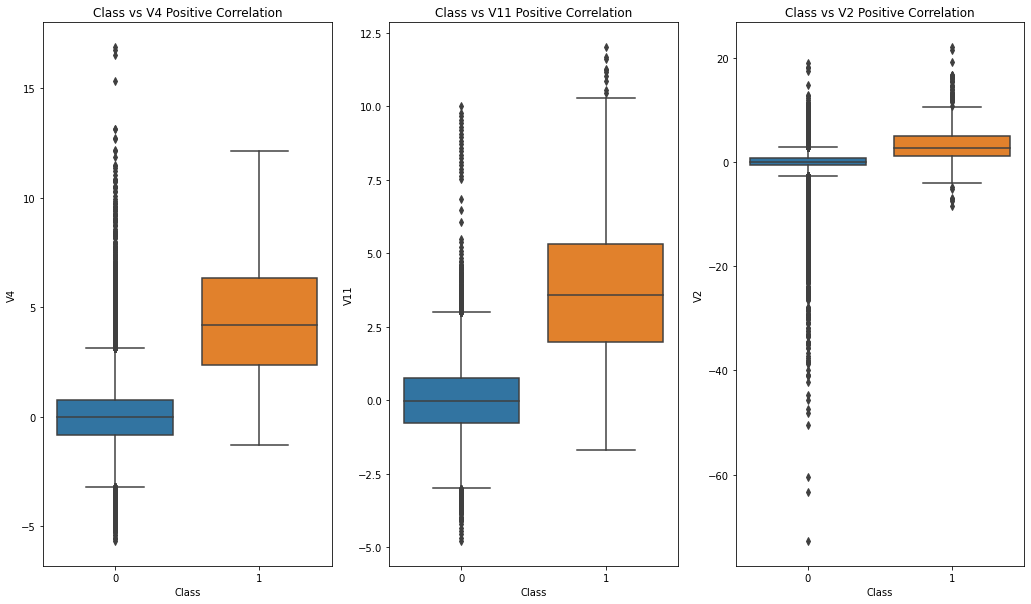

In [ ]:
rs, cs =len(p_corrs_names)//5+1, 5

plt.figure(figsize=(30,10))

for i, col in enumerate(p_corrs_names):
  plt.subplot(rs, cs, i+1)
  sns.boxplot(x="Class", y=col, data=df)
  plt.title(f"Class vs {col} Positive Correlation")

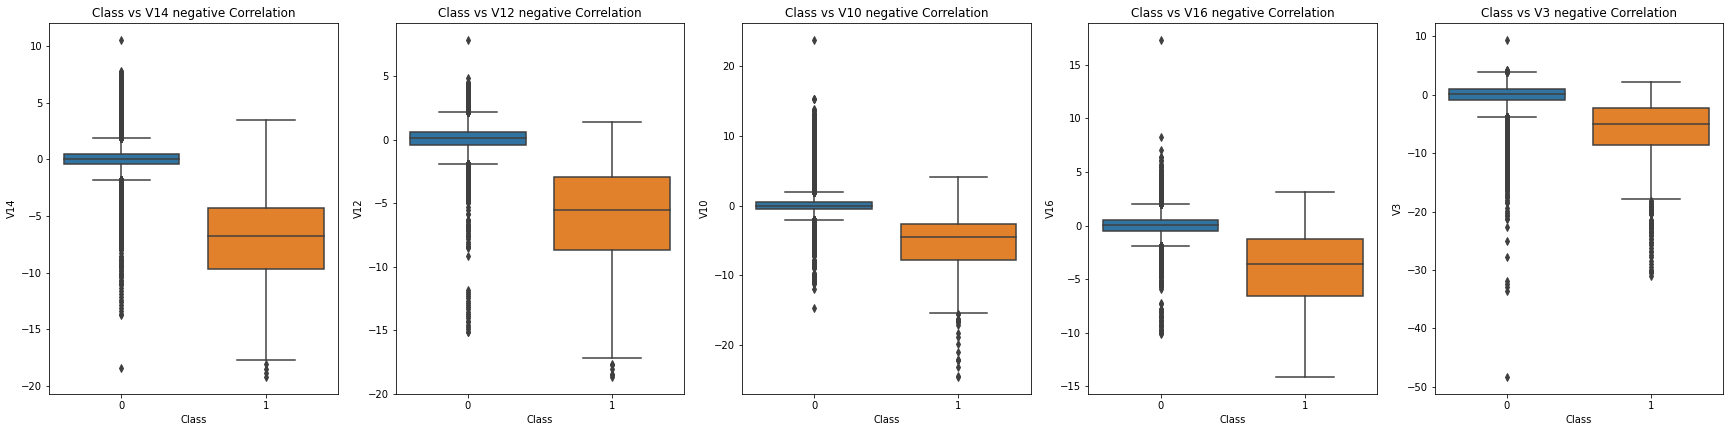

In [ ]:
rs, cs =len(n_corrs_names)//5+1, 5

plt.figure(figsize=(30,15))
for i, col in enumerate(n_corrs_names):
  plt.subplot(rs, cs, i+1)
  sns.boxplot(x="Class", y=col, data=df)
  plt.title(f"Class vs {col} negative Correlation")

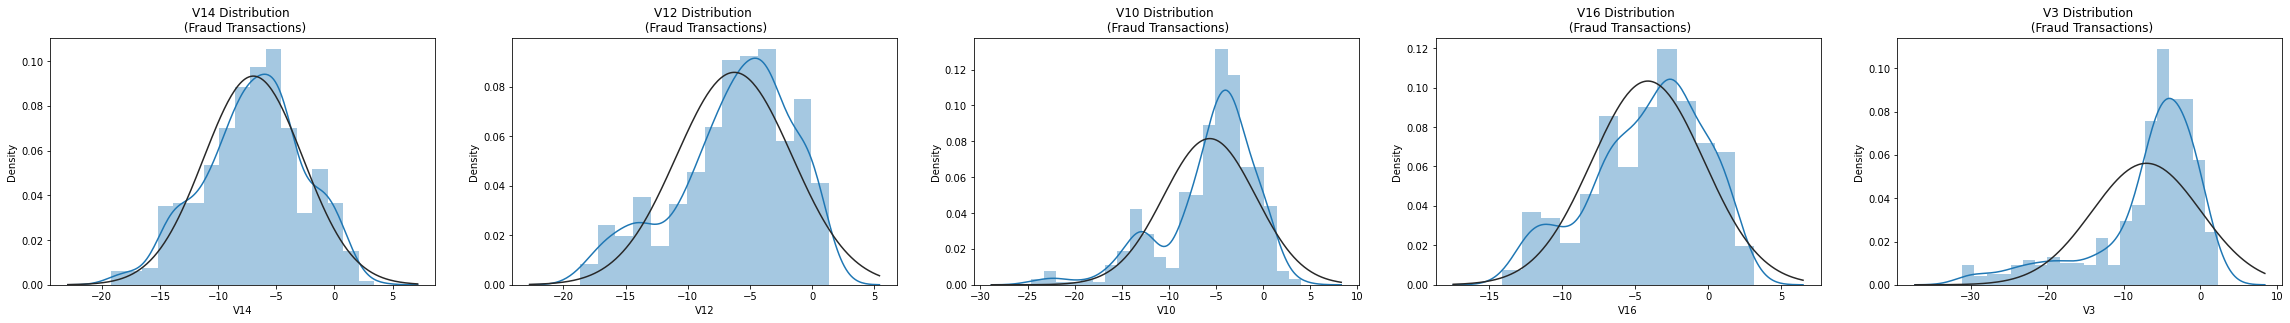

In [ ]:
from scipy.stats import norm

s, cs =len(n_corrs_names)//5+1, 5
target_var = "Class"

plt.figure(figsize=(40,10))
for i, col in enumerate(n_corrs_names):
  
  col_rel_dist = df[col].loc[df[target_var] == 1]
  
  plt.subplot(rs, cs, i+1)
  sns.distplot(col_rel_dist,fit=norm)
  plt.title(f'{col} Distribution \n (Fraud Transactions)')

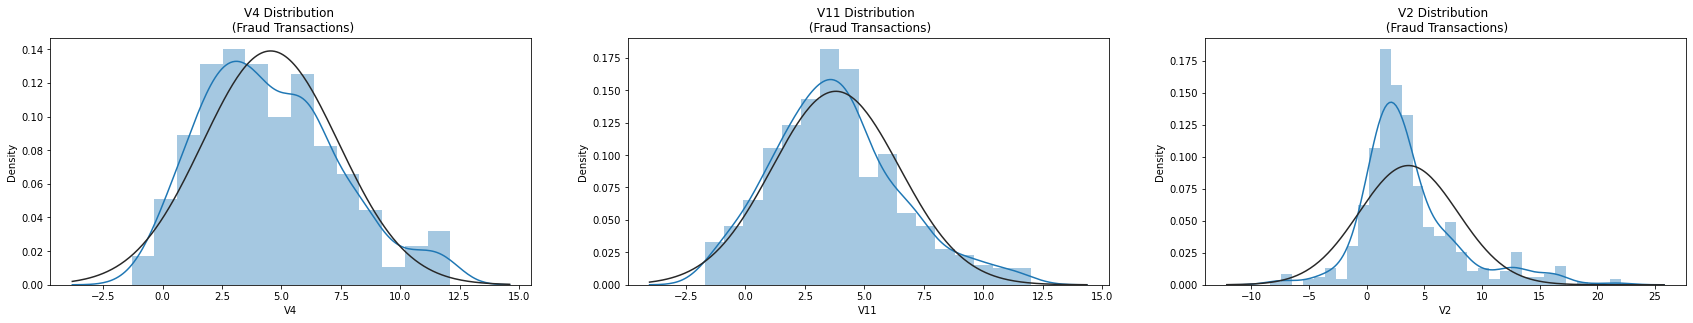

In [ ]:
from scipy.stats import norm

s, cs =len(p_corrs_names)//5+1, 5
target_var = "Class"

plt.figure(figsize=(50,10))
for i, col in enumerate(p_corrs_names):
  
  col_rel_dist = df[col].loc[df[target_var] == 1]
  
  plt.subplot(rs, cs, i+1)
  sns.distplot(col_rel_dist, fit=norm)
  plt.title(f'{col} Distribution \n (Fraud Transactions)')

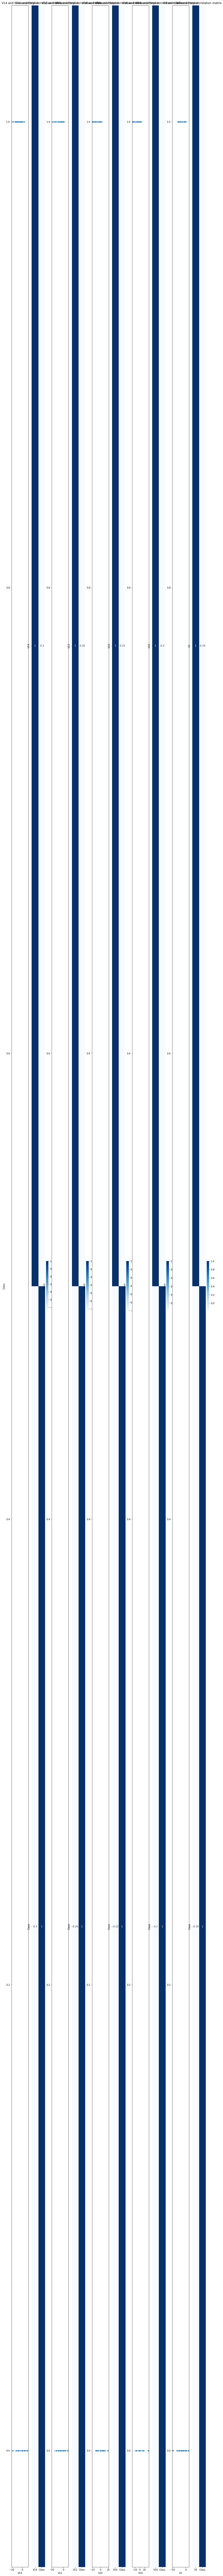

In [ ]:
from scipy.stats import norm
from itertools import count

rs, cs =len(p_corrs_names)//5+1, 5*2
target_var = "Class"

plt.figure(figsize=(rs*15,cs*20))
for i, col in zip(count(step=2), n_corrs_names):

  
  col_rel_dist = df[col].loc[df[target_var] == 1]
  
  
  plt.subplot(rs, cs, i+1)
  sns.scatterplot(df[col], df[target_var])
  plt.title(f'{col} and {target_var} scatterplot')

  plt.subplot(rs, cs, i+2)
  sns.heatmap(df[[col,target_var]].corr(), annot=True,cmap='Blues')
  plt.title(f'{col} and {target_var} correlation matrix')

In [ ]:
from scipy.stats import norm
from itertools import count

rs, cs =len(p_corrs_names)//5+1, 5*2
target_var = "Class"

plt.figure(figsize=(rs*5,cs*5))
for i, col in zip(count(step=2), p_corrs_names):

  
  col_rel_dist = df[col].loc[df[target_var] == 1]
  
  
  plt.subplot(rs, cs, i+1)
  sns.scatterplot(df[col], df[target_var])
  plt.title(f'{col} and {target_var} scatterplot')

  plt.subplot(rs, cs, i+2)
  sns.heatmap(df[[col,target_var]].corr(), annot=True,cmap='Blues')
  plt.title(f'{col} and {target_var} correlation matrix')

<AxesSubplot:>

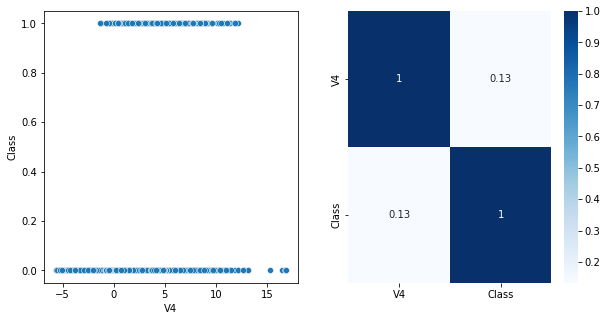

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(df["V4"], df[target_var])

plt.subplot(1,2,2)
sns.heatmap(df[["V4",target_var]].corr(), annot=True,cmap='Blues')

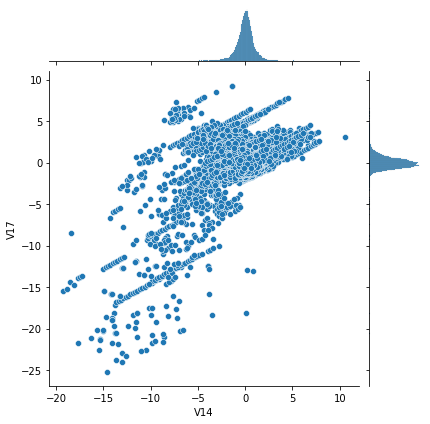

In [ ]:
sns.JointGrid(df["V14"], df["V17"]).plot(sns.scatterplot, sns.histplot);

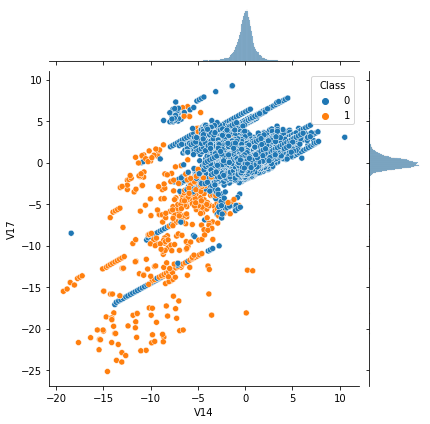

In [ ]:
sns.JointGrid(df["V14"], df["V17"], hue=df[target_var]).plot(sns.scatterplot, sns.histplot);

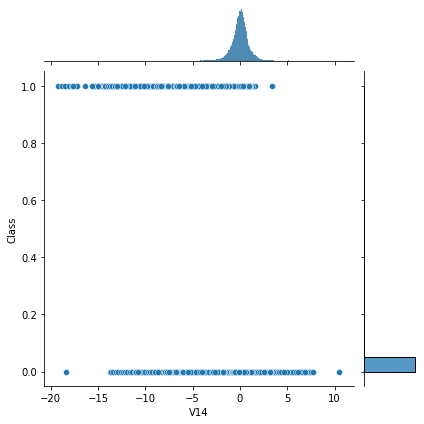

In [ ]:
sns.JointGrid(df["V14"], df[target_var]).plot(sns.scatterplot, sns.histplot);

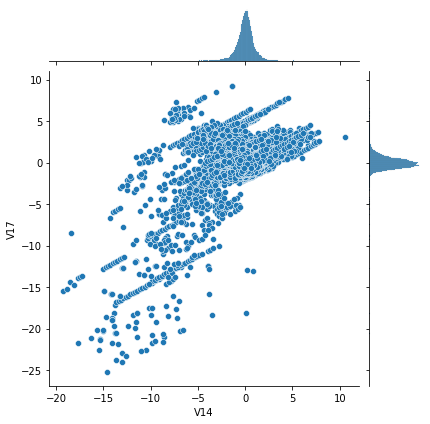

In [ ]:
sns.JointGrid(df["V14"], df["V17"]).plot(sns.scatterplot, sns.histplot);

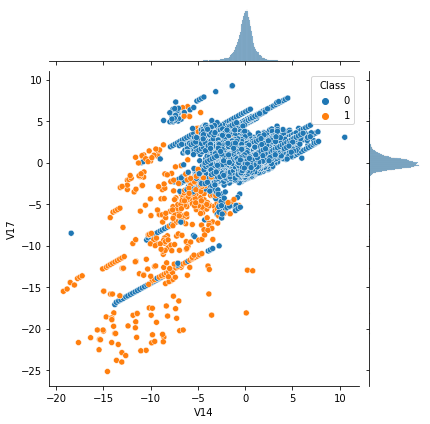

In [ ]:
sns.JointGrid(df["V14"], df["V17"], hue=df[target_var]).plot(sns.scatterplot, sns.histplot);

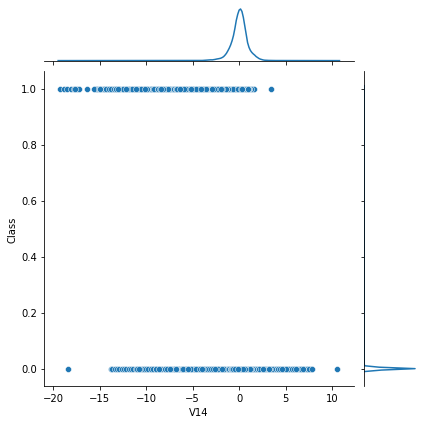

In [ ]:
sns.JointGrid(df["V14"], df[target_var]).plot(sns.scatterplot, sns.kdeplot);

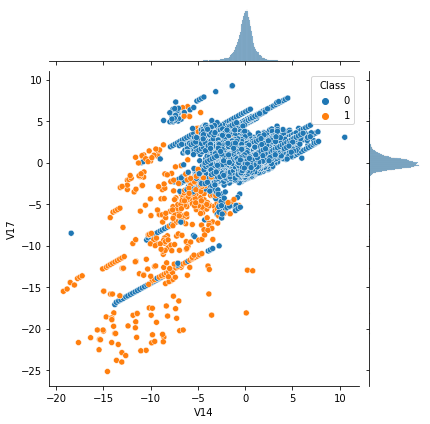

In [ ]:
sns.JointGrid(df["V14"], df["V17"], hue=df[target_var]).plot(sns.scatterplot, sns.histplot);

# (E) Model Selection (Classic ML models)

## Prepare The Data To Training

### Splitting the dataset
```python
# train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# train, validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)
```

#### Denoting the Features and target variable

In [91]:
target_var ="Class"

In [92]:
# Balanced Subsampled data used For fast tuning, then whole data will be used
X = undersampled_df.drop(target_var, axis=1) #df.drop(columns=target_var)
y = undersampled_df[target_var] #df[target_var]

#### Train-Test Split

- X_train, y_train, X_test , y_test 
  - from Undersampled_df 
  - but not implemeneted NearMiss (Undersampling method)
  - Just balanced subsampled Randomly


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Util Functions
- Utils functions for model tuning

### Hyperparameter Tuning Utils

#### Greedy Step tune

In [94]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

def greedy_search(model, params:dict, X_train, y_train, cv=10, n_jobs=-1, verbose=2, is_print=False):
  """It tunes params individually step by step . select best value on current step.
  It assumes the params sorted by importance on the model as descending. 
  The important param, second important param, etc.... 
  """
  
  best_params = {}
  for name, values in params.items():
    # Initial params
    best_params[name] = values

    if is_print: print("before:");pprint(best_params);
    
    # create GridSearch&Train 
    cv_model = GridSearchCV(model, best_params, cv=cv, n_jobs=n_jobs, verbose=verbose)
    cv_model.fit(X_train, y_train)

    # Update the param
    best_params[name] = [cv_model.best_params_[name]]
    
    if is_print: print("after:");pprint(best_params);print("-"*25, end="\n\n");

  return cv_model, cv_model.best_estimator_, best_params

#### Model Tuner

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


def gen_clf_metrics(y_test, y_pred, is_round, return_y_data=False):
  """
  Calculate and return a dictionary of common classification metrics.
  """

  if is_round: y_pred = np.round(y_pred).astype(np.int64)

  clf_metrics = {
            "accuracy":accuracy_score(y_test, y_pred),
            "precision" : precision_score(y_test, y_pred, average="micro"),
            "recall": recall_score(y_test, y_pred, average="micro"),
            "f1_score": f1_score(y_test, y_pred, average="micro"),
            "clf_report":classification_report(y_test, y_pred, output_dict=True)
  }

  if return_y_data:
    clf_metrics["y_pred"] = y_pred
    clf_metrics["y_test"] = y_test
            
  
  return clf_metrics

In [96]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error

def gen_reg_metrics(y_test, y_pred, is_round, return_y_data=False):
  """
  Calculate and return a dictionary of common regression metrics.
  """

  if is_round: y_pred = np.round(y_pred).astype(np.int64)


  reg_metrics = {
      "MaxError": np.max(y_test - y_pred),
      "MeanAbsoluteError": median_absolute_error(y_test, y_pred),
      "MeanAbsolutePercentageError": np.mean(np.abs((y_test - y_pred) / y_test)) * 100,
      "MSE": mean_squared_error(y_test, y_pred),
      "RMSE": mean_squared_error(y_test, y_pred, squared=False),
      "MAE": mean_absolute_error(y_test, y_pred),
      "R2":r2_score(y_test, y_pred),
      "ExplainedVariance":explained_variance_score(y_test, y_pred)
  }

  if return_y_data:
    reg_metrics["y_pred"] = y_pred
    reg_metrics["y_test"] = y_test


  return reg_metrics

In [97]:
import pandas as pd
def tune_models(tuners, X_train, y_train, x_test, y_test, is_clf, is_round=False, return_y_data=False):
  
  results, metric_summary = dict(), dict()
  for name, [model, params] in tuners.items():
    # Tuning
    cv_model, tuned_model, best_params = greedy_search(model, params, X_train, y_train)
    
    # predicting
    y_pred = tuned_model.predict(X_test)

    metric_kwargs = {"y_test":y_test, "y_pred":y_pred, "is_round":is_round, "return_y_data":return_y_data} 
    metric_results = gen_clf_metrics(**metric_kwargs) if is_clf else gen_reg_metrics(**metric_kwargs)

    # Generating results
    cur_results = {
        "tune_results": {
            "cv_model":cv_model,
            "tuned_model":tuned_model,
            "best_params":best_params,
        },
        "metric_results": metric_results
    }
    
    results[name] = cur_results
    metric_summary[name] = metric_results

  return results, pd.DataFrame(metric_summary).T


In [98]:
import pandas as pd
def tune_linear_cv_models(tuners, X_train, y_train, X_test, y_test, is_clf, is_round=False, return_y_data=False):
  
  results, metric_summary = dict(), dict()
  for name, [model, params] in tuners.items():
      # Tuning
      tuned_model = model(**params)
      tuned_model.fit(X_train, y_train)
      
      # predicting
      y_pred = tuned_model.predict(X_test)
      metric_kwargs = {"y_test":y_test, "y_pred":y_pred, "is_round":is_round, "return_y_data":return_y_data} 
      metric_results = gen_clf_metrics(**metric_kwargs) if is_clf else gen_reg_metrics(**metric_kwargs)

      # Generating results
      cur_results = {
          "tune_results": {
              "tuned_model":tuned_model,
              "best_params":tuned_model.get_params(True) ,#best_params_,
          },
          "metric_results": metric_results
      }
      
      results[name] = cur_results
      metric_summary[name] = metric_results

  return results, pd.DataFrame(metric_summary).T

### Sampling Utils

###### Metrics

In [99]:
from sklearn.metrics import classification_report

def print_clf_reports(best_clfs,original_y_test, labels = ['No Fraud', 'Fraud']):
  for name, model in  best_clfs.items():
  
    preds = model.predict(original_X_test)

    print("*"*50, end="\n"*3)
    print(f"{name:<0.15} Classification Results")
    print(classification_report(original_y_test, preds, target_names=labels))
    print("*"*50, end="\n"*3)


```python
# Example Usage
print_clf_reports(best_clfs_os, original_y_test, labels = ['No Fraud', 'Fraud'])
```

###### Learning Curve

In [100]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, name, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), figsize=(20,20)):

    # checking the params
    if ylim is not None: plt.ylim(*ylim)
    
    # pre-declerations
    orange, blue = "#ff9124", "#2492ff"

    # Extracting the learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Extracting the scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # calculating params    
    tra_left_edge = train_scores_mean - train_scores_std
    tra_right_edge = train_scores_mean + train_scores_std

    test_left_edge = test_scores_mean - test_scores_std
    test_right_edge = test_scores_mean + test_scores_std

    # transparent plot for confidence value range
    plt.fill_between(train_sizes, tra_left_edge, tra_right_edge, alpha=0.1, color=orange)
    plt.fill_between(train_sizes, test_left_edge, test_right_edge, alpha=0.1, color=blue)
    
    # Plotting as point
    plt.plot(train_sizes, train_scores_mean, 'o-', color=orange, label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color=blue, label="Cross-validation score")
    
    # Configurating the plottings
    plt.title(f"{name} Learning Curve", fontsize=14)
    plt.xlabel('Training size (m)')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend(loc="best")

In [101]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

def get_learning_curve_stats(clfs, X_train, y_train, cv, model_size, rs, cs, figsize, ylim):

  plt.figure(figsize=figsize)
  # EXtracting the learning curve and validation metrics
  best_models_cross_val_preds, roc_auc_scores = {}, {}
  for i, (name, model) in enumerate(clfs.items()):

    # Training with best models again (the best params already saved inside) for visualizate the duration.
    plt.subplot(rs, cs, i+1)
    print(f"{i}.turn [{name}], plotting learning curve")
    plot_learning_curve(model, name, X_train, y_train, ylim, cv=cv, n_jobs=-1, figsize=figsize) 

    # validating the trained models
    print(f"{i}.turn, cross_validation")
    method = "decision_function" if name in ["loj_reg", "svc"] else "predict"
    best_models_cross_val_preds[name]  = cross_val_predict(model, X_train, y_train, cv=5, method=method)

    # Displating the roc scores
    print(f"{i}.turn, roc_auc_scores")
    roc_auc_scores[name] = roc_auc_score(y_train, best_models_cross_val_preds[name])
    print(f'{name:<20}: ',roc_auc_scores[name])

  return plt.gcf(), best_models_cross_val_preds, roc_auc_scores

```python
# Example Usage
model_size = len(us_models)
rs, cs = (model_size//2+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=100, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (40,20),
    "ylim" : (0.87, 1.01)
}

lc_plot, best_models_cross_val_preds, roc_auc_scores  = get_learning_curve_stats(us_models, figsize=(40,10), **lcs_params)
```

###### ROC Curve

In [107]:
from sklearn.metrics import roc_auc_score

def plot_roc(name, fpr, tpr, y, preds):
    
    # ROC curve of given model
    label = f"{name:<20} Classifier Score: {roc_auc_score(y, preds)::>10}"
    plt.plot(fpr, tpr, label=label)
    
    # Dummy case for referance
    plt.plot([0, 1], [0, 1], 'k--')
    
    # configurating the plottings
    plt.title('ROC Curves', fontsize=18)
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [108]:
from sklearn.metrics import roc_curve

def plot_multiple_rocs(best_models_cross_val_preds, figsize=(16,8)):
  
  plt.figure(figsize=figsize)
  for name, preds in best_models_cross_val_preds.items(): 
    
    # Calculating the curve 
    fpr, tpr, th = roc_curve(y_train, preds)

    # plotting the roc curve
    plot_roc(name, fpr, tpr, y_train, preds)
  plt.legend()
  
  return plt.gcf()


##### Precision recall curve

In [103]:
import matplotlib.pyplot as plt
def plot_precision_recall(precision, recall, avg_precision, prefix_title=""):
  
  # decleration of the params
  title = f"Precision-Recall curve: \n Average Precision-Recall Score ={avg_precision:0.2f}"
  title = prefix_title + title

  # plotting the precission-recall curve
  plt.step(recall, precision, where='post', alpha=0.2, color='#004a93' )
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')

  # Configurating the plot
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title(title)

In [104]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_multiple_precision_recall(best_clfs, original_X_test, original_y_test, prefix_title="", figsize=(16,8)):
  
  # extracting the configurations
  model_size = len(best_clfs)
  rs, cs = model_size//5+1, 5


  fig = plt.figure(figsize=(figsize))
  for i, (name, model) in enumerate(best_clfs.items()):
    
    # extracting the score
    y_score = model.predict(original_X_test)#decision_function(original_X_test) # .predict(original_X_test)

    # calculating the precision, recall, avg_presision
    precision, recall, _ = precision_recall_curve(original_y_test, y_score)
    average_precision = average_precision_score(original_y_test, y_score)

    # plotting the precision recall
    plt.subplot(rs, cs, i+1)
    plot_precision_recall(precision, recall, average_precision, prefix_title=prefix_title)

```python
# Example USage
multi_roc_curves = plot_multiple_rocs(best_models_cross_val_preds, figsize=(16,8))
```

#### Hyperparams

In [ ]:
# loj_params = {"penalty": ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
loj_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'fit_intercept': [True, False],
    'intercept_scaling': [0.5, 1, 2]
}
from sklearn.linear_model import LogisticRegression
loj_reg = [LogisticRegression(), loj_params]

In [ ]:
# knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2, 3, 4, 5],
}
from sklearn.neighbors import KNeighborsClassifier
knn = [KNeighborsClassifier() , knn_params]

In [ ]:
# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
svc_params = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'coef0': [-1, 0, 1],
    'shrinking': [True, False],
    'probability': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'max_iter': [-1, 1000, 10000, 100000],
    "class_weight": [None, "balanced"]
}
from sklearn.svm import SVC
svc = [SVC() , svc_params]

In [ ]:
# dt_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
dt_params = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_features": [None, "auto", "log2"],
    "class_weight": [None, "balanced"]
}
from sklearn.tree import DecisionTreeClassifier
dt = [DecisionTreeClassifier() , dt_params]

In [ ]:
non_linear_tuners = {
    "loj_reg":loj_reg,
    "knn":knn,
    "svc":svc,
    "dt":dt
}

In [ ]:
non_lin_results, non_lin_metric_summary = tune_models(non_linear_tuners, X_train, y_train, y_test, is_clf=True)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for eac

In [ ]:
best_clfs=dict()
for model_name in non_linear_tuners.keys():
  best_clfs[model_name] = non_lin_results[model_name]["tune_results"]["cv_model"].best_estimator_

In [ ]:
# Overfitting Case
for name, model in best_clfs.items():
  score = cross_val_score(model, X_train, y_train, cv=5)
  print(f'{name:<7} = {score.mean():<5.4}')

loj_reg = 0.9429
knn     = 0.9416
svc     = 0.9375
dt      = 0.9267


## Model Tuning [Classic ML Models]

### (0) Dummy Training (default params)  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [ ]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 94.0 % accuracy score


### (1) Linear Models

#### Hyperparams

In [ ]:
lin_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
}
from sklearn.linear_model import LinearRegression
linear_reg = [LinearRegression(), lin_params]

In [ ]:
lasso_params = {
    "alphas": np.logspace(-4, 0, 100),
    #"cv": [3, 5, 10],
    "normalize": True,
    #"tol": [1e-4, 1e-3, 1e-2]
}
from sklearn.linear_model import LassoCV
l1_reg = [LassoCV, lasso_params] 

In [ ]:
ridge_params = {
    "alphas": (10**np.linspace(10,-2,100))*0.5,
    "scoring":"neg_mean_squared_error",
    "normalize": True
}

from sklearn.linear_model import RidgeClassifierCV 
l2_reg = [RidgeClassifierCV, ridge_params]

In [ ]:
ElasticNet_params = {
    "alphas": np.logspace(-4, 0, 100),
    #"cv": 10, #[3, 5, 10],
    #"normalize": True#[True, False],
    #"tol": [1e-4, 1e-3, 1e-2]
}

from sklearn.linear_model import ElasticNetCV 
enet_reg = [ElasticNetCV, ElasticNet_params]

In [ ]:
linear_cv_tuners = {
    "l1_reg":l1_reg,
    "l2_reg":l2_reg,
    "enet_reg":enet_reg
}
linear_tuners = {
    "lin_reg":linear_reg,
    #**linear_cv_tuners
}

#### Tuning Demostration (Undersampled data)
- X_train_us, y_train_us

In [ ]:
lin_results, lin_metric_summary = tune_linear_cv_models(linear_cv_tuners, X_train, y_train, X_test , y_test, is_clf=False, is_round=True) # X_train_us, y_train_us, X_test_us, y_test_us,

In [ ]:
list(lin_results.keys())

['l1_reg', 'l2_reg', 'enet_reg']

In [ ]:
lin_metric_summary

MaxError  MeanAbsoluteError  MeanAbsolutePercentageError       MSE  \
l1_reg         1.0                0.0                          inf  0.076142   
l2_reg         0.0                1.0                          inf  0.543147   
enet_reg       1.0                0.0                          inf  0.076142   

              RMSE       MAE        R2  ExplainedVariance  
l1_reg    0.275939  0.076142  0.693146           0.705711  
l2_reg    0.736985  0.543147 -1.188889           0.000000  
enet_reg  0.275939  0.076142  0.693146           0.705711

In [ ]:
from pprint import pprint
pprint(lin_results)

{'enet_reg': {'metric_results': {'ExplainedVariance': 0.7057113187954309,
                                 'MAE': 0.07614213197969544,
                                 'MSE': 0.07614213197969544,
                                 'MaxError': 1,
                                 'MeanAbsoluteError': 0.0,
                                 'MeanAbsolutePercentageError': inf,
                                 'R2': 0.6931464174454829,
                                 'RMSE': 0.2759386380695814},
              'tune_results': {'best_params': {'alphas': array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-04, 7.74263683e-04, 8.49753436e-04,
       9.32603347e-04, 1

In [ ]:
lin_reg_results, lin_reg_metric_summary = tune_models(linear_tuners, X_train, y_train, X_test , y_test, is_clf=False, is_round=True)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [ ]:
list(lin_reg_results.keys())

['lin_reg']

In [ ]:
lin_reg_metric_summary

ExplainedVariance       MAE       MSE  MaxError  MeanAbsoluteError  \
lin_reg           0.728557  0.071066  0.071066       1.0                0.0   

         MeanAbsolutePercentageError        R2      RMSE  
lin_reg                          inf  0.713603  0.266582

In [ ]:
from pprint import pprint
pprint(lin_reg_results)

{'lin_reg': {'metric_results': {'ExplainedVariance': 0.7285565939771548,
                                'MAE': 0.07106598984771574,
                                'MSE': 0.07106598984771574,
                                'MaxError': 1,
                                'MeanAbsoluteError': 0.0,
                                'MeanAbsolutePercentageError': inf,
                                'R2': 0.7136033229491173,
                                'RMSE': 0.2665820508731144},
             'tune_results': {'best_params': {'copy_X': [True],
                                              'fit_intercept': [True],
                                              'normalize': [True]},
                              'cv_model': GridSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'normalize': [True]},
             verbose=2),
                              'tuned_model': LinearRegression(normali

### (2) Non-Linear Models 

#### Hyperparams

In [109]:
loj_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'fit_intercept': [True, False],
    'intercept_scaling': [0.5, 1, 2]
}
from sklearn.linear_model import LogisticRegression
loj_reg = [LogisticRegression(), loj_params]

In [ ]:
nb_params = {
    "priors": [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]],
    "var_smoothing":  np.linspace(1e-6, 1e-12, 10)
}
from sklearn.naive_bayes import GaussianNB
nb = [GaussianNB(), nb_params]

In [ ]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2, 3, 4, 5],
}
from sklearn.neighbors import KNeighborsClassifier
knn = [KNeighborsClassifier() , knn_params]

In [ ]:
svc_params = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'coef0': [-1, 0, 1],
    'shrinking': [True, False],
    'probability': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'max_iter': [-1, 1000, 10000, 100000],
    "class_weight": [None, "balanced"]
}
from sklearn.svm import SVC
svc = [SVC() , svc_params]

In [ ]:
dt_params = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_features": [None, "auto", "log2"],
    "class_weight": [None, "balanced"]
}
from sklearn.tree import DecisionTreeClassifier
dt = [DecisionTreeClassifier() , dt_params]

In [ ]:
non_linear_tuners = {
    "loj_reg":loj_reg,
    "nb_params":nb,
    "knn":knn,
    "svc":svc,
    "dt":dt
}

#### Tuning Demostration (Balanced Subsample Data)
- X_train, y_train, X_test , y_test 
  - from Undersampled_df 
  - but not implemeneted NearMiss (Undersampling method)
  - Just balanced subsampled Randomly



In [ ]:
non_lin_results, non_lin_metric_summary = tune_models(non_linear_tuners, X_train, y_train, X_test , y_test, is_clf=True)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for e

In [ ]:
list(non_lin_results.keys())

['loj_reg', 'nb_params', 'knn', 'svc', 'dt']

In [ ]:
non_lin_metric_summary

accuracy precision    recall  f1_score  \
loj_reg     0.93401   0.93401   0.93401   0.93401   
nb_params  0.918782  0.918782  0.918782  0.918782   
knn        0.944162  0.944162  0.944162  0.944162   
svc        0.949239  0.949239  0.949239  0.949239   
dt         0.913706  0.913706  0.913706  0.913706   

                                                  clf_report  
loj_reg    {'0': {'precision': 0.9196428571428571, 'recal...  
nb_params  {'0': {'precision': 0.9174311926605505, 'recal...  
knn        {'0': {'precision': 0.9363636363636364, 'recal...  
svc        {'0': {'precision': 0.9217391304347826, 'recal...  
dt         {'0': {'precision': 0.9326923076923077, 'recal...

In [ ]:
from pprint import pprint
pprint(non_lin_results)

{'dt': {'metric_results': {'accuracy': 0.9137055837563451,
                           'clf_report': {'0': {'f1-score': 0.919431279620853,
                                                'precision': 0.9326923076923077,
                                                'recall': 0.9065420560747663,
                                                'support': 107},
                                          '1': {'f1-score': 0.9071038251366121,
                                                'precision': 0.8924731182795699,
                                                'recall': 0.9222222222222223,
                                                'support': 90},
                                          'accuracy': 0.9137055837563451,
                                          'macro avg': {'f1-score': 0.9132675523787326,
                                                        'precision': 0.9125827129859387,
                                                        'recall': 0.9143821391484943

### (3) Ensemble Models

#### Hyperparams

In [ ]:
# Defining parameters
rf_params = {
    "n_estimators": [10, 50, 100, 200],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4],
    "max_features": [None, "auto", "log2"],
    "class_weight": [None, "balanced"],
    "bootstrap": [True, False],
    "oob_score": [True, False],
    "n_jobs": [None, -1, 1]
}
from sklearn.ensemble import RandomForestClassifier
rf = [RandomForestClassifier(), rf_params] 

In [ ]:
# Defining parameters
gbc_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.7, 0.8, 0.9]
}
from sklearn.ensemble import GradientBoostingClassifier
gbc = [GradientBoostingClassifier(), gbc_params] 

In [ ]:
# Defining parameters
xgbc_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 2, 4],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 1e-1, 1],
    'reg_lambda': [0, 1e-1, 1]
}
from xgboost import XGBClassifier
xgbc = [XGBClassifier(), xgbc_params] 

In [ ]:
# Defining parameters
lgbm_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 63, 127],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    'min_child_weight': [1e-3, 1e-2, 1e-1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 1e-1, 1],
    'reg_lambda': [0, 1e-1, 1]
}
from lightgbm import LGBMClassifier
lgbm = [LGBMClassifier(), lgbm_params] 

In [ ]:
!pip install catboost
import os
if os.system("pip freeze | grep catboost==") != 0: os.system("pip install catboost")

cb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 2, 4],
    'boosting_type': ['Ordered', 'Plain', 'Pointwise'],
    'colsample_bylevel': [0.7, 0.8, 0.9],
    #'reg_lambda': [0, 1e-1, 1] # or # 'l2_leaf_reg': [1, 2, 4]
}
from catboost import CatBoostClassifier
cb = [CatBoostClassifier(), cb_params] 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.2 MB/s eta 0:00:00


In [ ]:
ensemble_tuners = {
    "rf":rf,
    "gbc":gbc,
    "xgbc":xgbc,
    "lgbm":lgbm,
    "cb":cb
}

#### Tuning Demostration (Undersampled Data)
- X_train_us, y_train_us

In [ ]:
# annotating the columns for xgbc 
co = df.drop("Class", axis=1).columns

X_train_e = pd.DataFrame(X_train ,columns=co)
y_train_e = pd.DataFrame(y_train, columns = ["Class"])
X_test_e = pd.DataFrame(X_test ,columns=co)
y_test_e = pd.DataFrame(y_test, columns = ["Class"])

In [ ]:
ensemble_results, ensemble_metric_summary = tune_models(ensemble_tuners,  X_train_e, y_train_e, X_test_e , y_test_e, is_clf=True)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for eac

In [ ]:
list(ensemble_results)

['rf', 'gbc', 'xgbc', 'lgbm', 'cb']

In [ ]:
ensemble_metric_summary

accuracy precision    recall  f1_score  \
rf    0.949239  0.949239  0.949239  0.949239   
gbc   0.954315  0.954315  0.954315  0.954315   
xgbc  0.954315  0.954315  0.954315  0.954315   
lgbm  0.949239  0.949239  0.949239  0.949239   
cb    0.959391  0.959391  0.959391  0.959391   

                                             clf_report  
rf    {'0': {'precision': 0.9292035398230089, 'recal...  
gbc   {'0': {'precision': 0.9375, 'recall': 0.981308...  
xgbc  {'0': {'precision': 0.9375, 'recall': 0.981308...  
lgbm  {'0': {'precision': 0.9292035398230089, 'recal...  
cb    {'0': {'precision': 0.9380530973451328, 'recal...

In [ ]:
from pprint import pprint
pprint(ensemble_results)

{'cb': {'metric_results': {'accuracy': 0.9593908629441624,
                           'clf_report': {'0': {'f1-score': 0.9636363636363636,
                                                'precision': 0.9380530973451328,
                                                'recall': 0.9906542056074766,
                                                'support': 107},
                                          '1': {'f1-score': 0.9540229885057472,
                                                'precision': 0.9880952380952381,
                                                'recall': 0.9222222222222223,
                                                'support': 90},
                                          'accuracy': 0.9593908629441624,
                                          'macro avg': {'f1-score': 0.9588296760710554,
                                                        'precision': 0.9630741677201855,
                                                        'recall': 0.956438213914849

### Collectinng the results

In [ ]:
# lin_results, lin_metric_summary
# lin_reg_results, lin_reg_metric_summary
# non_lin_results, non_lin_metric_summary
# ensemble_results, ensemble_metric_summary

#### Collecting the models

In [ ]:
results = [non_lin_results, ensemble_results]

In [ ]:
tuned_non_lin_models = dict()
for results in results:
 for name, result in results.items():
   tuned_non_lin_models[name] = result["tune_results"]["cv_model"]

In [ ]:
from pprint import pprint
pprint(tuned_non_lin_models)

{'cb': GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f8ec8086820>,
             n_jobs=-1,
             param_grid={'boosting_type': ['Ordered'],
                         'colsample_bylevel': [0.7], 'depth': [5],
                         'l2_leaf_reg': [2], 'learning_rate': [0.05],
                         'n_estimators': [100]},
             verbose=2),
 'dt': GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'criterion': ['entropy'],
                         'max_depth': [3], 'max_features': [None],
                         'min_samples_leaf': [3], 'min_samples_split': [3],
                         'splitter': ['best']},
             verbose=2),
 'gbc': GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05], 'max_depth': [3],
                         'max_features': ['log2'], 'min_samples_leaf': [1],
     

#### Collecting scores

In [ ]:
lin_model_scores = pd.concat([lin_metric_summary, lin_reg_metric_summary])
lin_model_scores = lin_model_scores.sort_values(by=['MSE'], ascending=True)
lin_model_scores

MaxError  MeanAbsoluteError  MeanAbsolutePercentageError       MSE  \
lin_reg        1.0                0.0                          inf  0.071066   
l1_reg         1.0                0.0                          inf  0.076142   
enet_reg       1.0                0.0                          inf  0.076142   
l2_reg         0.0                1.0                          inf  0.543147   

              RMSE       MAE        R2  ExplainedVariance  
lin_reg   0.266582  0.071066  0.713603           0.728557  
l1_reg    0.275939  0.076142  0.693146           0.705711  
enet_reg  0.275939  0.076142  0.693146           0.705711  
l2_reg    0.736985  0.543147 -1.188889           0.000000

In [ ]:
non_linear_model_scores = pd.concat([non_lin_metric_summary, ensemble_metric_summary])
non_linear_model_scores = non_linear_model_scores.sort_values(by=['f1_score'],  ascending=False)
non_linear_model_scores

accuracy precision    recall  f1_score  \
cb         0.959391  0.959391  0.959391  0.959391   
gbc        0.954315  0.954315  0.954315  0.954315   
xgbc       0.954315  0.954315  0.954315  0.954315   
svc        0.949239  0.949239  0.949239  0.949239   
rf         0.949239  0.949239  0.949239  0.949239   
lgbm       0.949239  0.949239  0.949239  0.949239   
knn        0.944162  0.944162  0.944162  0.944162   
loj_reg     0.93401   0.93401   0.93401   0.93401   
nb_params  0.918782  0.918782  0.918782  0.918782   
dt         0.913706  0.913706  0.913706  0.913706   

                                                  clf_report  
cb         {'0': {'precision': 0.9380530973451328, 'recal...  
gbc        {'0': {'precision': 0.9375, 'recall': 0.981308...  
xgbc       {'0': {'precision': 0.9375, 'recall': 0.981308...  
svc        {'0': {'precision': 0.9217391304347826, 'recal...  
rf         {'0': {'precision': 0.9292035398230089, 'recal...  
lgbm       {'0': {'precision': 0.9292035398230089, 'recal...  
knn        {'0': {'precision': 0.9363636363636364, 'recal...  
loj_reg    {'0': {'precision': 0.9196428571428571, 'recal...  
nb_params  {'0': {'precision': 0.9174311926605505, 'recal...  
dt         {'0': {'precision': 0.9326923076923077, 'recal...

In [ ]:
non_linear_model_scores.index

Index(['cb', 'gbc', 'xgbc', 'svc', 'rf', 'lgbm', 'knn', 'loj_reg', 'nb_params',
       'dt'],
      dtype='object')

## Resampled Tuning

### (1) Random Sampling Train

#### Classic Ml

##### Undersampled Training

In [ ]:
# copying the hyper tuned models to get good start
us_models = tuned_non_lin_models.copy()

In [ ]:
# Undersampled training
us_scores, us_models = undersample_training(tuned_non_lin_models, us_X_train, us_y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
0:	learn: 0.6149707	total: 31.5ms	remaining: 3.12s
1:	learn: 0.5379138	total: 73.8ms	remaining: 3.62s
2:	learn: 0.4774078	total: 118ms	remaining: 3.8s
3:	learn: 0.4318942	total: 159ms	remaining: 3.82s
4:	learn: 0.3889662	total: 184ms	remaining: 3.5s
5:	learn: 0.3551434	total: 254ms	remaining: 3.98s
6:	learn: 0.3192525	total: 312ms	remaining: 4.15s
7:	learn: 0.2892570	total: 359ms	remaini

In [ ]:
us_scores

{'loj_reg': {'acc': [[0.7731791349382255],
   [0.3226535583400996],
   [0.6749325199148544],
   [0.5806798481423775],
   [0.059009414294805676],
   [0.027189536746472384],
   [0.03976387456384823],
   [0.061445280782988436],
   [0.07320766310430336],
   [0.06697535605345739]],
  'precision': [[0.007301373811124988],
   [0.002520763985392496],
   [0.005038968019349637],
   [0.0041173711367071455],
   [0.0018157692576297227],
   [0.0017789186876534036],
   [0.0018021717309973538],
   [0.0018437266616878267],
   [0.0018435358071377925],
   [0.0018546342379566155]],
  'recall': [[0.9620253164556962],
   [0.9873417721518988],
   [0.9493670886075949],
   [1.0],
   [0.9873417721518988],
   [1.0],
   [1.0],
   [1.0],
   [0.9873417721518988],
   [1.0]],
  'f1': [[0.014492753623188406],
   [0.00502868931725872],
   [0.010024727661565194],
   [0.008200975812311845],
   [0.0036248722000185893],
   [0.0035515195108793383],
   [0.003597859501309348],
   [0.0036806671791646283],
   [0.003680200051900

In [ ]:
us_scores.keys()

dict_keys(['loj_reg', 'nb_params', 'knn', 'svc', 'dt', 'rf', 'gbc', 'xgbc', 'lgbm', 'cb'])

In [ ]:
non_lin_us_names = ['loj_reg', 'nb_params', 'knn', 'svc', 'dt']
non_lin_us_scores = {name:scores for name, scores in us_scores.items() if name in  non_lin_us_names}
non_lin_us_models = {name:model for name, model in us_models.items() if name in  non_lin_us_names}

In [ ]:
non_lin_us_scores.keys()

dict_keys(['loj_reg', 'nb_params', 'knn', 'svc', 'dt'])

##### Results

###### Learning Curves

0.turn [loj_reg], plotting learning curve
0.turn, cross_validation
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
0.turn, roc_auc_scores
loj_reg             :  0.9772048846675713
1.turn [nb_params], plotting learning curve
1.turn, cross_validation
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
1.turn, roc_auc_scores
nb_params           :  0.9171415649027589
2.turn [knn], plotting learning curve
2.turn, cross_validation
Fitting 10 folds for each of 1 candidates, totalling 10 fits


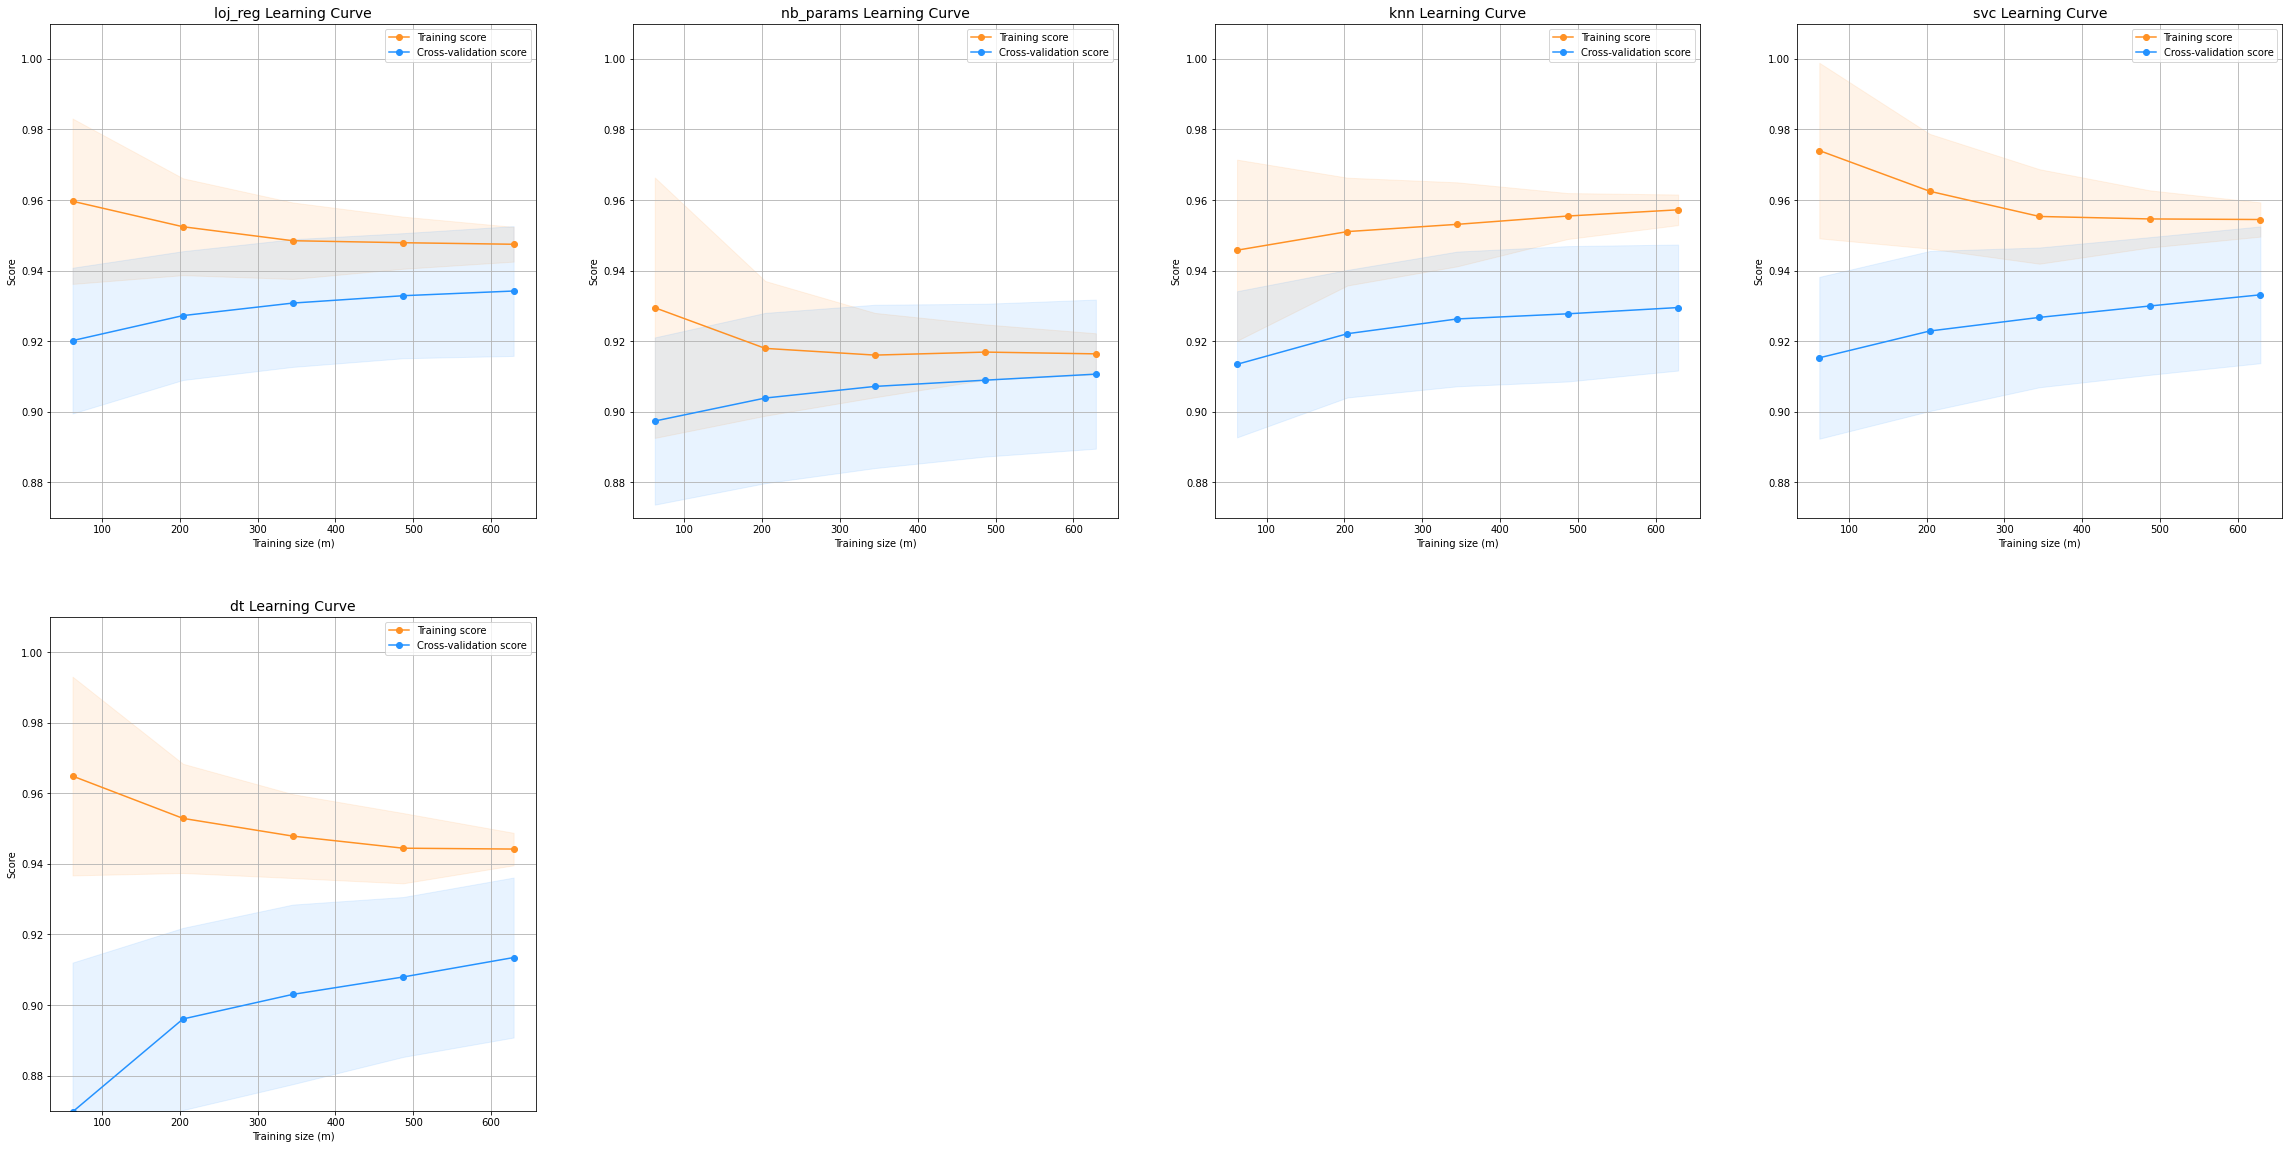

In [ ]:
# Example Usage
model_size = len(non_lin_us_models)
rs, cs = (model_size//4+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=100, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (40,20),
    "ylim" : (0.87, 1.01), 
    "X_train": X_train,
    "y_train":y_train
}

lc_plot, best_models_cross_val_preds, roc_auc_scores  = get_learning_curve_stats(non_lin_us_models, **lcs_params)

###### Classification Reports

In [ ]:
# classification report
print_clf_reports(us_models, original_y_test, labels = ['No Fraud', 'Fraud'])

**************************************************


loj_reg Classification Results
              precision    recall  f1-score   support

    No Fraud       1.00      0.81      0.90     56863
       Fraud       0.01      0.91      0.02        98

    accuracy                           0.81     56961
   macro avg       0.50      0.86      0.46     56961
weighted avg       1.00      0.81      0.89     56961

**************************************************


**************************************************


nb_params Classification Results
              precision    recall  f1-score   support

    No Fraud       1.00      0.35      0.52     56863
       Fraud       0.00      0.96      0.01        98

    accuracy                           0.35     56961
   macro avg       0.50      0.66      0.26     56961
weighted avg       1.00      0.35      0.52     56961

**************************************************


**************************************************


knn Classificatio

###### Roc Curves

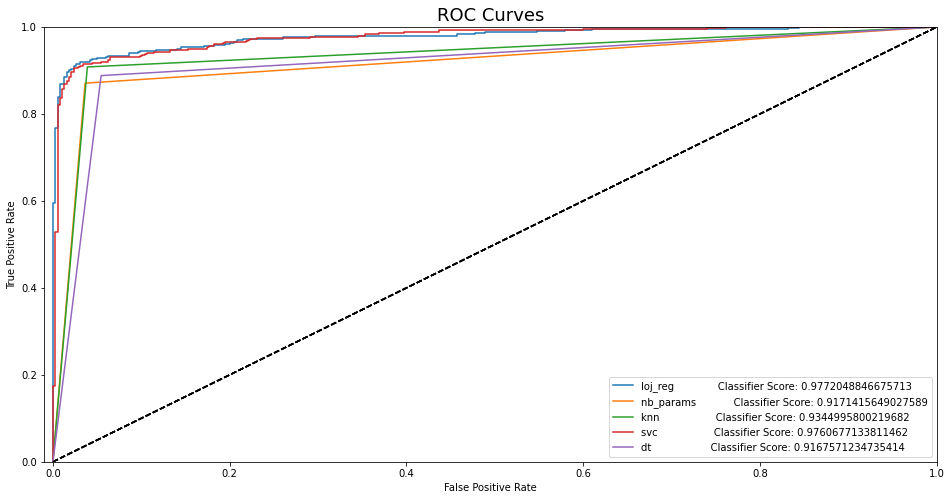

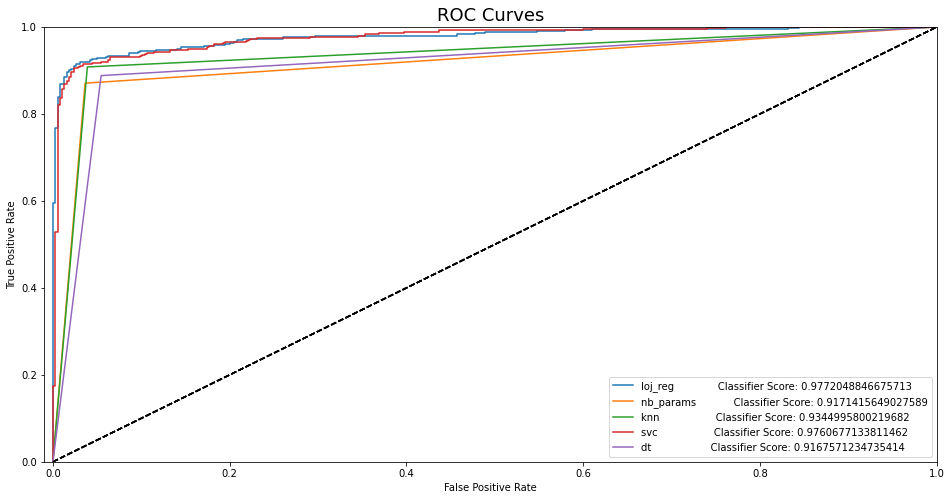

In [ ]:
# Roc Curve
plot_multiple_rocs(best_models_cross_val_preds, figsize=(16,8))

###### Precision Recall Curve

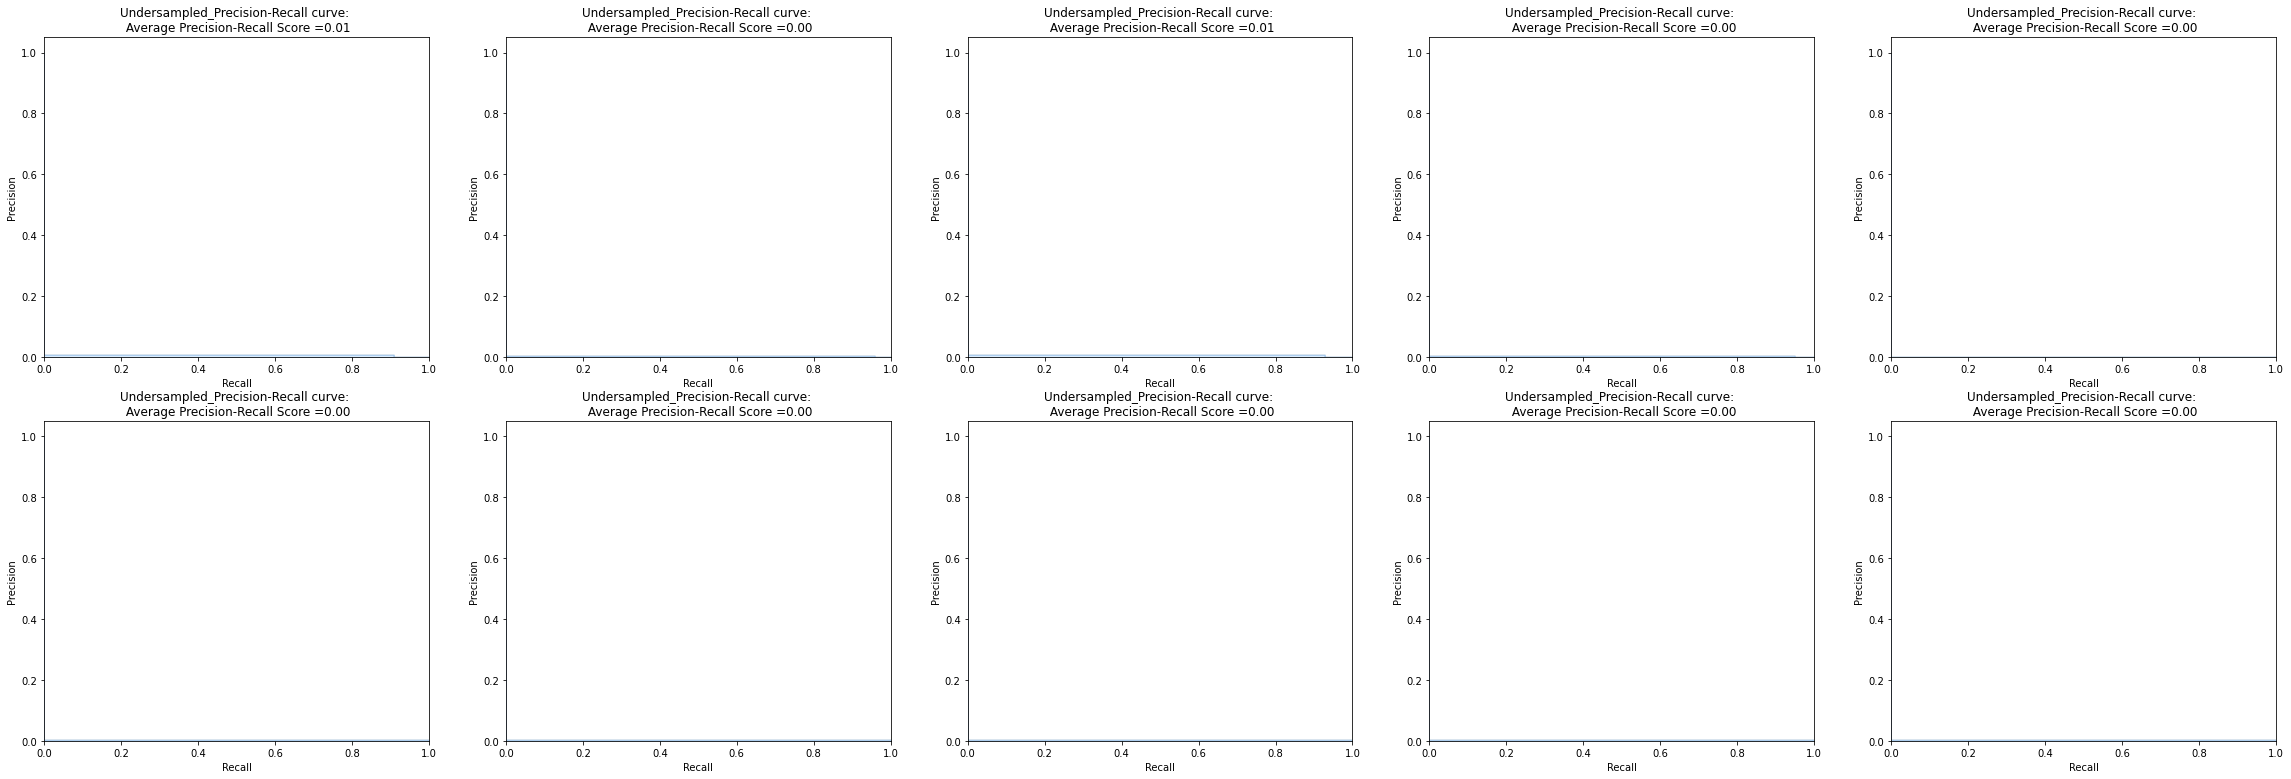

In [ ]:
plot_multiple_precision_recall(us_models, original_X_test, original_y_test, prefix_title="Undersampled_", figsize=(40,20))

#### Deep learning Undersampling

In [ ]:
from imblearn.under_sampling import NearMiss
nn_nm = NearMiss(sampling_strategy='majority') #, random_state=42
X_train_us, y_train_us = nn_nm.fit_resample(original_X_train, original_y_train)

##### Architecture

In [ ]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
# extracting the required params
input_size = X_train_us.shape[1]

# architecture
undersample_model = Sequential([
    Input(shape=(input_size,)), 
    Dense(input_size, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

# Configurating the model to build
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Displaying the model architecture
undersample_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 32)                992       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


##### Training

In [ ]:
training_params = {
    "validation_split":0.2,
    "batch_size":25,
    "epochs":20, 
    "shuffle":True, 
    "verbose":2
}

# Training the model
us_train_hist = undersample_model.fit(X_train_us, y_train_us, **training_params)

Epoch 1/20
26/26 - 4s - loss: 0.5153 - accuracy: 0.6905 - val_loss: 0.2094 - val_accuracy: 0.8924 - 4s/epoch - 142ms/step
Epoch 2/20
26/26 - 0s - loss: 0.3426 - accuracy: 0.9460 - val_loss: 0.2107 - val_accuracy: 0.8797 - 99ms/epoch - 4ms/step
Epoch 3/20
26/26 - 0s - loss: 0.2433 - accuracy: 0.9492 - val_loss: 0.2359 - val_accuracy: 0.8797 - 97ms/epoch - 4ms/step
Epoch 4/20
26/26 - 0s - loss: 0.1862 - accuracy: 0.9524 - val_loss: 0.1913 - val_accuracy: 0.8924 - 96ms/epoch - 4ms/step
Epoch 5/20
26/26 - 0s - loss: 0.1533 - accuracy: 0.9571 - val_loss: 0.1591 - val_accuracy: 0.9114 - 95ms/epoch - 4ms/step
Epoch 6/20
26/26 - 0s - loss: 0.1256 - accuracy: 0.9603 - val_loss: 0.1092 - val_accuracy: 0.9620 - 94ms/epoch - 4ms/step
Epoch 7/20
26/26 - 0s - loss: 0.1121 - accuracy: 0.9651 - val_loss: 0.0939 - val_accuracy: 0.9684 - 108ms/epoch - 4ms/step
Epoch 8/20
26/26 - 0s - loss: 0.1028 - accuracy: 0.9730 - val_loss: 0.0786 - val_accuracy: 0.9810 - 104ms/epoch - 4ms/step
Epoch 9/20
26/26 - 0s 

In [ ]:
us_train_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

##### Results

In [ ]:
def plot_history(histoy:dict):

  
  for name, history in us_train_hist.history.items():
    
    if "accuracy" in name:
        plt.subplot(1,2,1)
        plt.plot(history, label=name)
        plt.title("Accuracy")
    else:
        plt.subplot(1,2,2)
        plt.plot(history, label=name)
        plt.title("Loss")
  plt.legend()



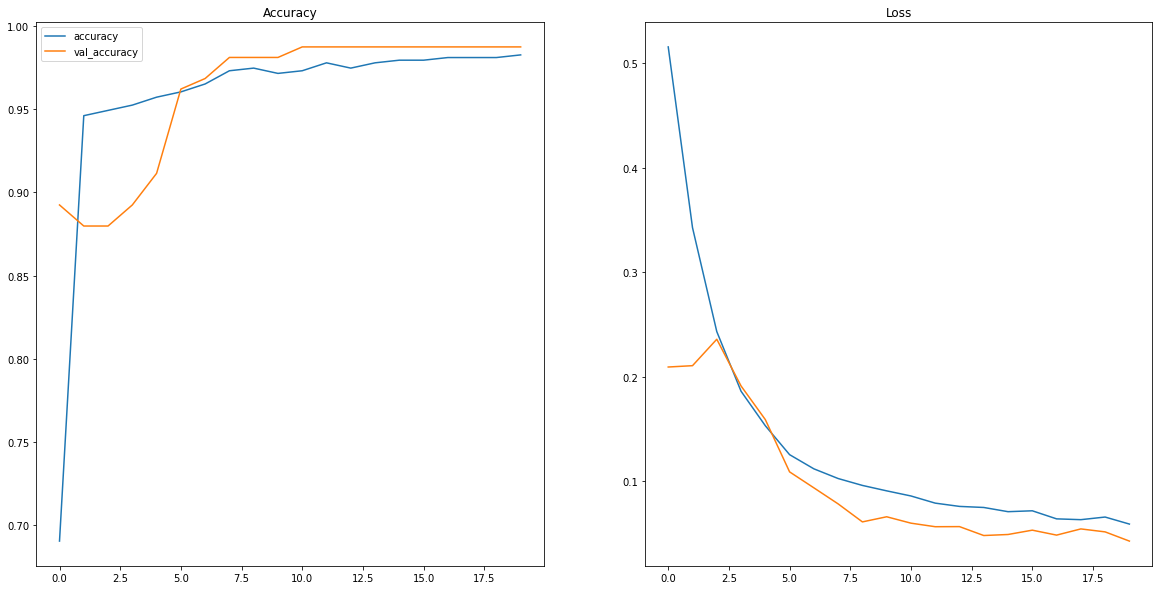

In [ ]:
plt.figure(figsize=(20,10))

# PLottting the training history
plot_history(us_train_hist.history)

In [ ]:
us_nn_preds = undersample_model.predict(original_X_test, batch_size=200, verbose=0)

In [ ]:
us_nn_fraud_preds = undersample_model.predict(original_X_test, batch_size=200, verbose=0)
us_nn_fraud_pred_classes = np.argmax(us_nn_fraud_preds, axis=1)

In [ ]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap="Blues"):
    
    # Adjusting the params
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] if normalize else cm

    # plotting the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # configurating
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Annotating 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # anotate via text
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        annot_params = {
          "color":"white" if cm[i, j] > thresh else "black",
          "horizontalalignment":"center",
        }
        plt.text(j, i, format(cm[i, j], fmt), **annot_params)


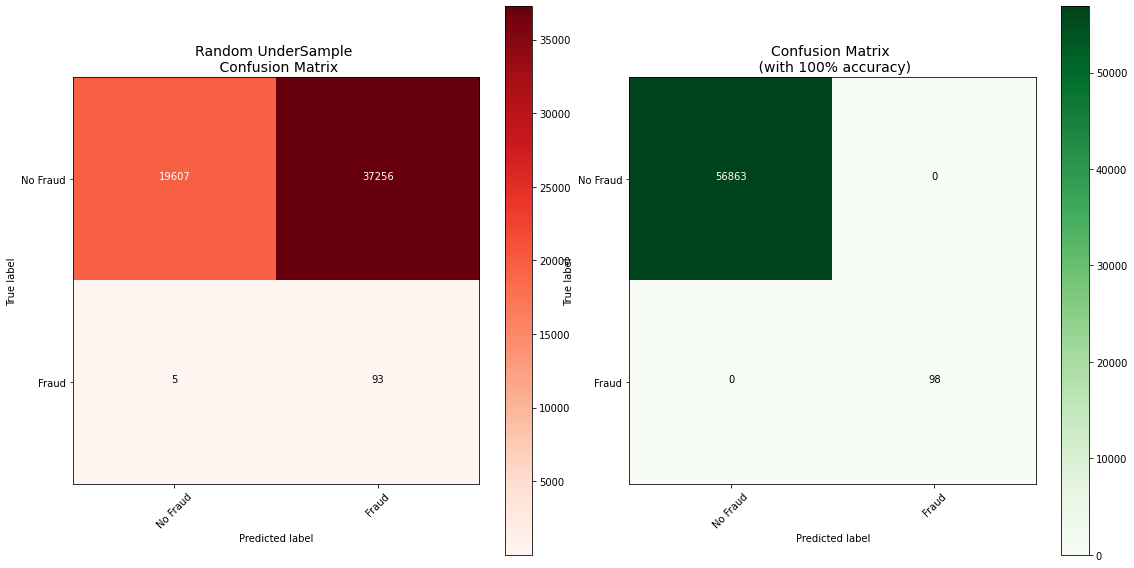

In [ ]:
# extracting the confusion matrices
from sklearn.metrics import confusion_matrix
undersample_cm = confusion_matrix(original_y_test, us_nn_fraud_pred_classes)
actual_cm = confusion_matrix(original_y_test, original_y_test)

# settingt the params
labels = ['No Fraud', 'Fraud']

# plotting the confusion matrices
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

plt.subplot(1,2,2)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

#### Focused Lojistic Regression 

In [ ]:
# Getting the required params for lojistic regression
loj_reg_preds = best_models_cross_val_preds["loj_reg"]
loj_reg_model = us_models["loj_reg"]

# Calculating the reqirements
y_pred = loj_reg_model.predict(X_train)
undersample_y_score = loj_reg_model.decision_function(original_X_test)

##### Curves

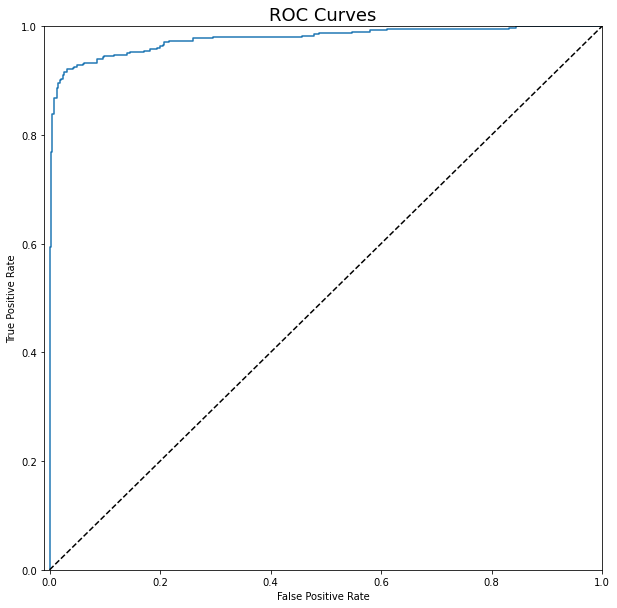

In [ ]:
plt.figure(figsize=(10,10))

# Extracting the roc curve
from sklearn.metrics import roc_curve
loj_fpr, loj_tpr, loj_th = roc_curve(y_train, loj_reg_preds)

# plotting ROC curve of the lokistic Regression
plot_roc("Lojistic Regression", loj_fpr, loj_tpr, y_train, loj_reg_preds)

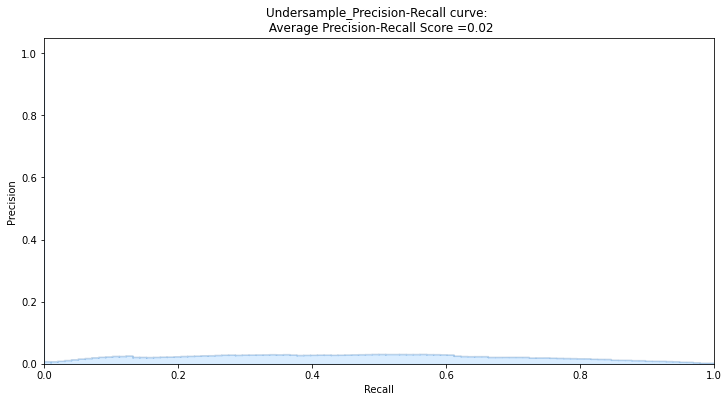

In [ ]:
# Extracting the roc curve precision_recall_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(original_y_test, undersample_y_score)
undersample_average_precision = average_precision_score(original_y_test, undersample_y_score)

# Plotting the precision recall curve
fig = plt.figure(figsize=(12,6))
plot_precision_recall(precision, recall, undersample_average_precision, prefix_title="Undersample_")

##### Result Metrics

In [ ]:
# We expects that following scores will be overfit because of the imbalancity (Pure dataset)
results_from_pure = {
    "acc": np.round(accuracy_score(y_train, y_pred), 2),
    "recall": np.round(recall_score(y_train, y_pred), 2),
    "precision": np.round(precision_score(y_train, y_pred), 2),
    "f1":np.round(f1_score(y_train, y_pred), 2)
}

In [ ]:
# uncpackaging the undersampled results
us_loj_scores = us_scores["loj_reg"]

# expected what it should be
results_from_undersampled = {
    "acc": np.round(np.mean(us_loj_scores["acc"]), 2),
    "recall": np.round(np.mean(us_loj_scores["recall"]), 2),
    "precision": np.round(np.mean(us_loj_scores["precision"]),2),
    "f1_score": np.round(np.mean(us_loj_scores["f1"]), 2),
}

In [ ]:
from pprint import pprint
print("Result classification metrics of overffited")
pprint(results_from_pure)

Result classification metrics of overffited
{'acc': 0.85, 'f1': 0.87, 'precision': 0.8, 'recall': 0.94}


In [ ]:
from pprint import pprint
print("Result classification metrics of what it should be (undersampled)")
pprint(results_from_undersampled)

Result classification metrics of what it should be (undersampled)
{'acc': 0.27, 'f1_score': 0.01, 'precision': 0.0, 'recall': 0.99}


### (2) Oversampling Train

#### Classic Ml Models

##### Oversampple Training
- We just train lojstic regresion because of the hardware limitation and best option from undersampled case.

In [ ]:
os_loj_reg = tuned_non_lin_models["loj_reg"].copy()

In [ ]:
os_loj_reg

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1], 'fit_intercept': [True],
                         'intercept_scaling': [0.5], 'max_iter': [100],
                         'penalty': ['l2'], 'solver': ['newton-cg']},
             verbose=2)

In [ ]:
# copying the hyper tuned models to get good start
os_models = tuned_non_lin_models.copy()

# Oversample training
os_scores, os_models = owersample_train({"loj_reg":os_loj_reg}, os_X_train, os_y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [ ]:
#os_scores.keys()

In [ ]:
#non_lin_os_names = ['loj_reg', 'nb_params', 'knn', 'svc', 'dt']
#non_lin_os_scores = {name:scores for name, scores in os_scores.items() if name in  non_lin_os_names}
#non_lin_os_models = {name:model for name, model in os_models.items() if name in  non_lin_os_names}

##### Results

###### Learning Curves

0.turn [loj_reg], plotting learning curve
0.turn, cross_validation
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
0.turn, roc_auc_scores
loj_reg             :  0.9773922594818117


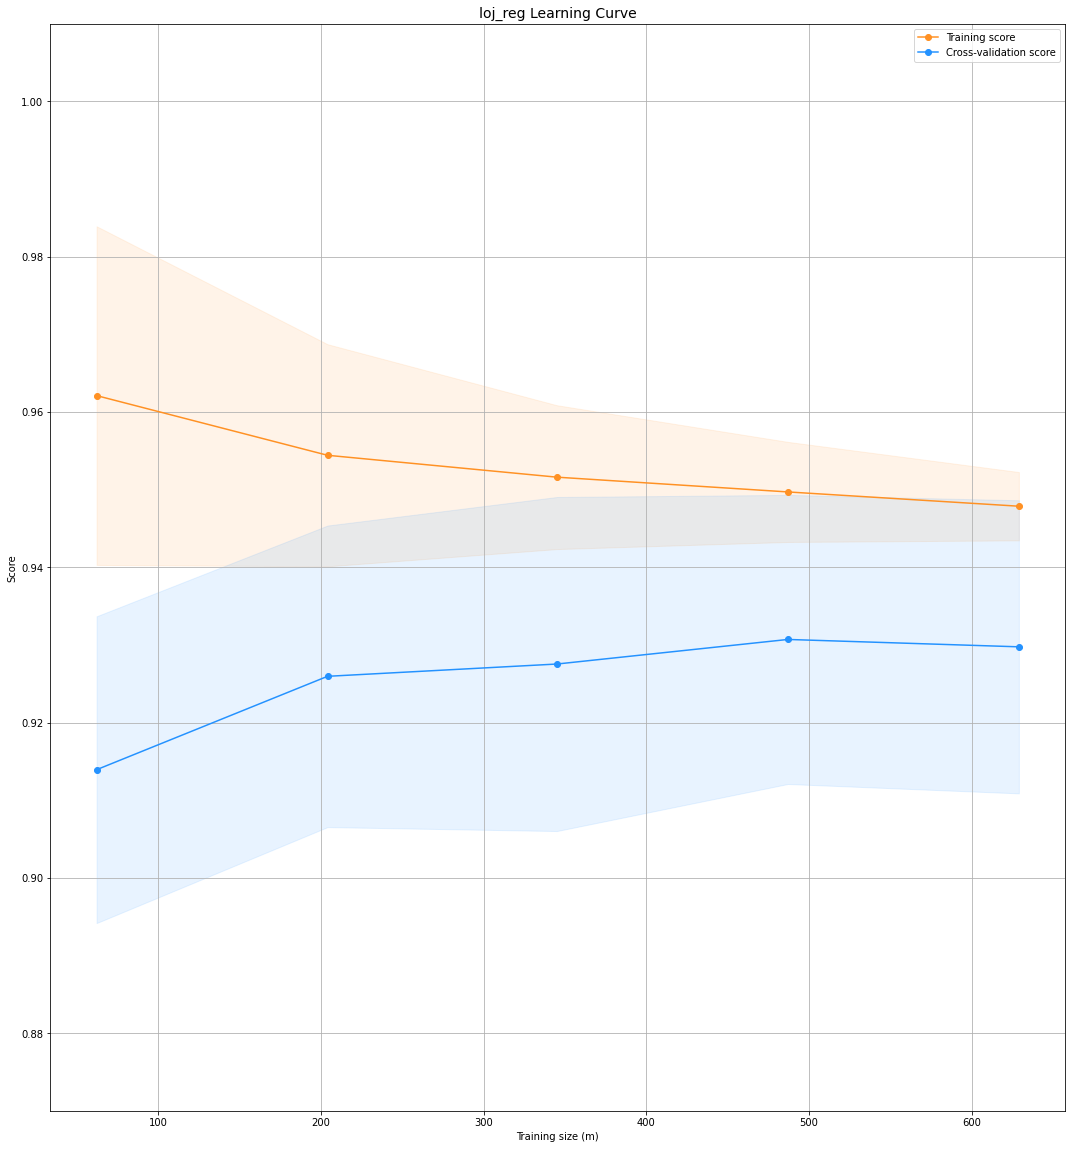

In [ ]:
# Example Usage
model_size = len(os_models)
rs, cs = (model_size//2+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=20, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (40,20),
    "ylim" : (0.87, 1.01),
    "X_train":X_train, #os_X_train,# -> takes too much time
    "y_train":y_train #os_y_train # takes too much time
}

lc_plot, best_models_cross_val_preds, roc_auc_scores  = get_learning_curve_stats(os_models, **lcs_params)

###### Classification Reports

In [ ]:
# classification report
print_clf_reports(os_models, original_y_test,  labels = ['No Fraud', 'Fraud'])

**************************************************


loj_reg Classification Results
              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961

**************************************************




###### Roc Curves

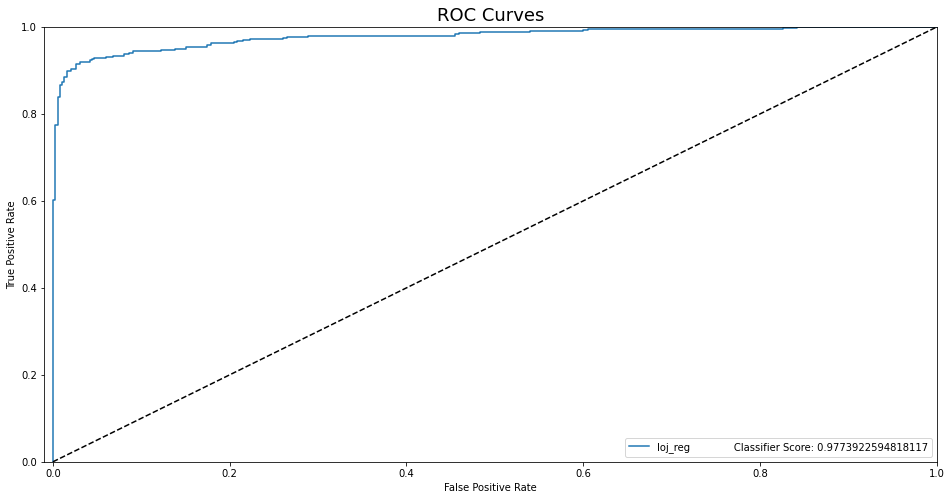

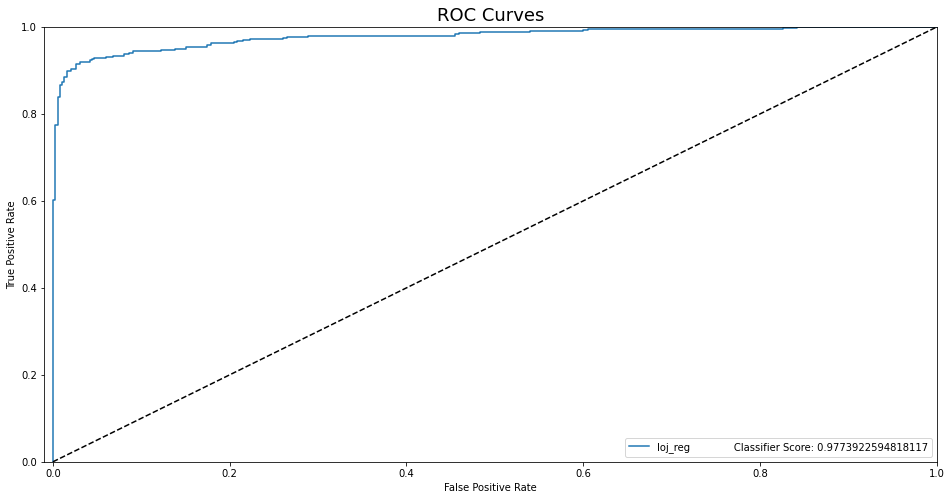

In [ ]:
# Roc Curve
plot_multiple_rocs(best_models_cross_val_preds, figsize=(16,8))

###### Precision Recall Curve

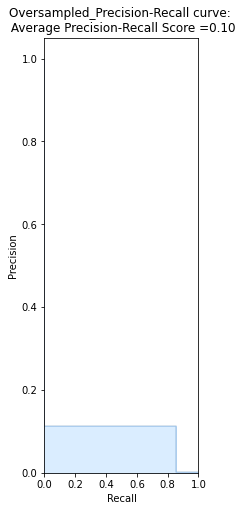

In [ ]:
plot_multiple_precision_recall(os_models, original_X_test, original_y_test, prefix_title="Oversampled_", figsize=(16,8))

#### Deep learning oversamping

In [ ]:
# Oversampling the dataset
from imblearn.over_sampling import SMOTE
nn_sm = SMOTE(sampling_strategy='minority') #, random_state=42) 
X_train_os, y_train_os = nn_sm.fit_resample(os_X_train, os_y_train)

##### Architecture

In [ ]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
# extracting the required params
input_size_os = X_train_os.shape[1]

# architecture
oversample_model = Sequential([
    Input(shape=(input_size_os,)), 
    Dense(input_size_os, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

# Configurating the model to build
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Displaying the model architecture
oversample_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 32)                992       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


##### Training

In [ ]:
training_params = {
    "validation_split":0.2,
    "batch_size":25,
    "epochs":20, 
    "shuffle":True, 
    "verbose":2
}

# Training the model
os_train_hist = oversample_model.fit(X_train_os, y_train_os, **training_params)

Epoch 1/20
14557/14557 - 38s - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0029 - val_accuracy: 0.9999 - 38s/epoch - 3ms/step
Epoch 2/20
14557/14557 - 44s - loss: 0.0057 - accuracy: 0.9986 - val_loss: 7.7842e-04 - val_accuracy: 1.0000 - 44s/epoch - 3ms/step
Epoch 3/20
14557/14557 - 38s - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.0025 - val_accuracy: 0.9996 - 38s/epoch - 3ms/step
Epoch 4/20
14557/14557 - 41s - loss: 0.0036 - accuracy: 0.9992 - val_loss: 7.4355e-04 - val_accuracy: 1.0000 - 41s/epoch - 3ms/step
Epoch 5/20
14557/14557 - 40s - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0017 - val_accuracy: 0.9999 - 40s/epoch - 3ms/step
Epoch 6/20
14557/14557 - 38s - loss: 0.0029 - accuracy: 0.9993 - val_loss: 5.6773e-04 - val_accuracy: 1.0000 - 38s/epoch - 3ms/step
Epoch 7/20
14557/14557 - 38s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 3.1210e-04 - val_accuracy: 1.0000 - 38s/epoch - 3ms/step
Epoch 8/20
14557/14557 - 38s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0019 - val_

##### Results

In [ ]:
os_train_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
def plot_history(histoy:dict):

  
  for name, history in us_train_hist.history.items():
    
    if "accuracy" in name:
        plt.subplot(1,2,1)
        plt.plot(history, label=name)
        plt.title("Accuracy")
    else:
        plt.subplot(1,2,2)
        plt.plot(history, label=name)
        plt.title("Loss")
  plt.legend()



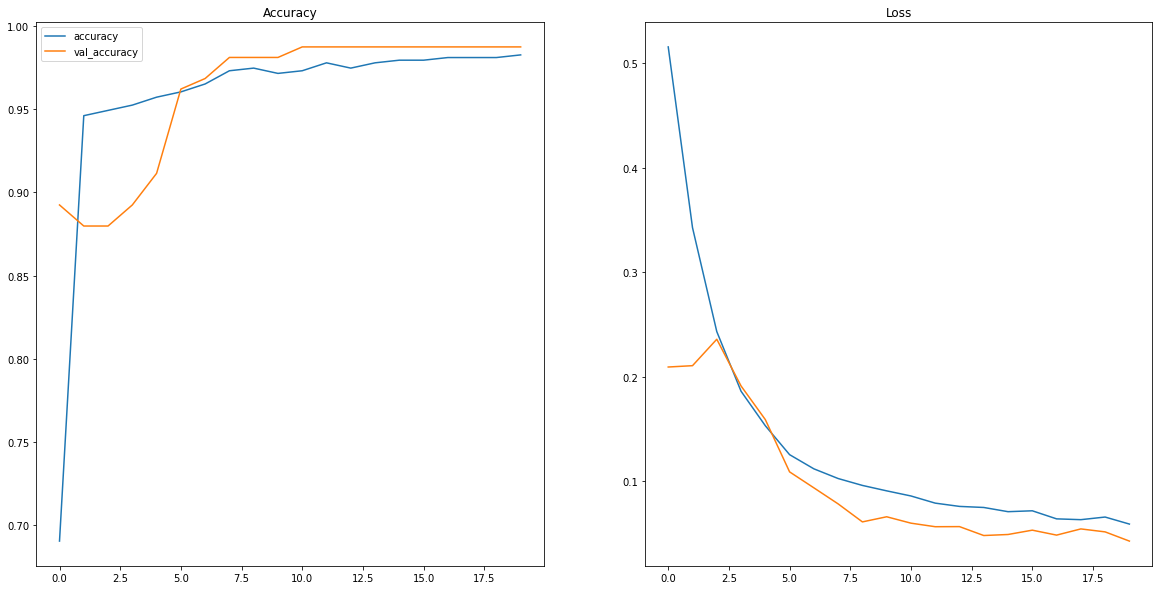

In [ ]:
plt.figure(figsize=(20,10))

# PLottting the training history
plot_history(os_train_hist.history)

In [ ]:
os_nn_preds = oversample_model.predict(original_X_test, batch_size=200, verbose=0)

In [ ]:
os_nn_fraud_preds = oversample_model.predict(original_X_test, batch_size=200, verbose=0)
os_nn_fraud_pred_classes = np.argmax(us_nn_fraud_preds, axis=1)

In [ ]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap="Blues"):
    
    # Adjusting the params
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] if normalize else cm

    # plotting the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # configurating
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Annotating 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # anotate via text
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        annot_params = {
          "color":"white" if cm[i, j] > thresh else "black",
          "horizontalalignment":"center",
        }
        plt.text(j, i, format(cm[i, j], fmt), **annot_params)


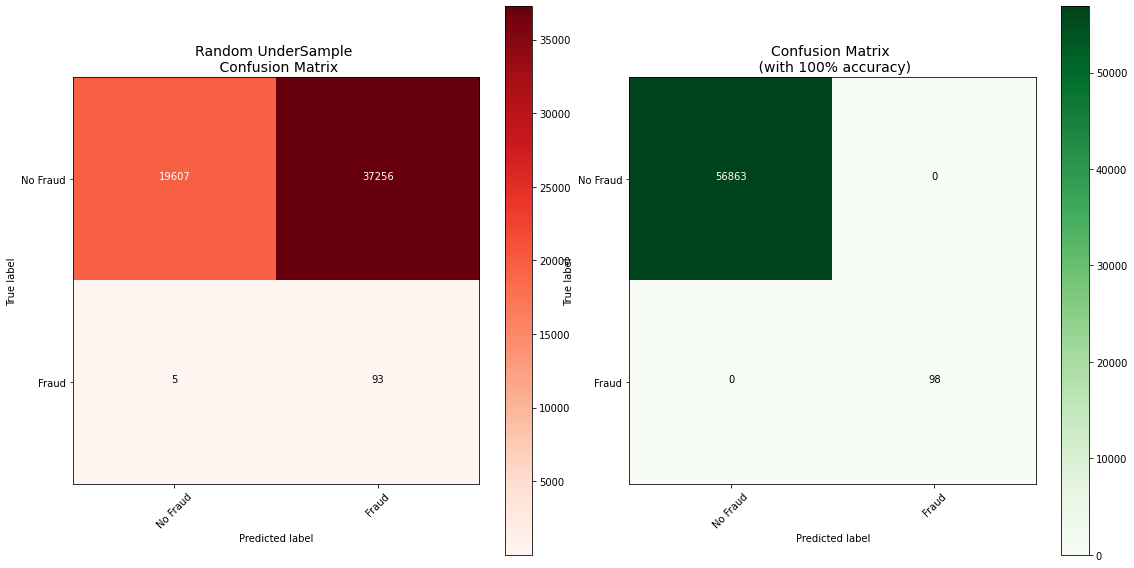

In [ ]:
# extracting the confusion matrices
from sklearn.metrics import confusion_matrix
oversample_cm = confusion_matrix(original_y_test, os_nn_fraud_pred_classes)
actual_cm = confusion_matrix(original_y_test, original_y_test)

# settingt the params
labels = ['No Fraud', 'Fraud']

# plotting the confusion matrices
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plot_confusion_matrix(oversample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

plt.subplot(1,2,2)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

##  Final Model

### Collecting all models

In [ ]:
def finalized_results(us_scores, os_scores):
  all_scores = dict()
  # undersample models (best_clfs, us_scores)

  for name, score in us_scores.items():
    
    all_scores[name] = {
        "Technique": "Random UnderSampling",
        "acc": np.round(np.mean(score["acc"]),3),
        "precision":np.round(np.mean(score["precision"]),3),
        "recall": np.round(np.mean(score["recall"]),3),
        "f1": np.round(np.mean(score["f1"]),3),
        "auc": np.round(np.mean(score["auc"]),3),
    }


  # oversample models (best_clfs_os, os_scores)

  for name, score in os_scores.items():
    
    all_scores[name+"_os"] = {
        "Technique": "OverSampling",
        "acc": np.round(np.mean(score["acc"]),3),
        "precision":np.round(np.mean(score["precision"]),3),
        "recall": np.round(np.mean(score["recall"]),3),
        "f1": np.round(np.mean(score["f1"]),3),
        "auc": np.round(np.mean(score["auc"]),3),
    }

  final_model_scores = pd.DataFrame(data=all_scores)
  
  return final_model_scores

In [ ]:
final_model_scores = finalized_results(us_scores, os_scores).T
final_model_scores = final_model_scores.sort_values(by=['f1'],  ascending=False)
final_model_scores

Technique    acc precision recall     f1    auc
loj_reg_os          OverSampling  0.983     0.084  0.886  0.153  0.935
loj_reg     Random UnderSampling  0.268     0.003  0.987  0.006  0.627
nb_params   Random UnderSampling  0.268     0.003  0.987  0.006  0.627
knn         Random UnderSampling  0.268     0.003  0.987  0.006  0.627
svc         Random UnderSampling  0.268     0.003  0.987  0.006  0.627
dt          Random UnderSampling  0.268     0.003  0.987  0.006  0.627
rf          Random UnderSampling  0.268     0.003  0.987  0.006  0.627
gbc         Random UnderSampling  0.268     0.003  0.987  0.006  0.627
xgbc        Random UnderSampling  0.268     0.003  0.987  0.006  0.627
lgbm        Random UnderSampling  0.268     0.003  0.987  0.006  0.627
cb          Random UnderSampling  0.268     0.003  0.987  0.006  0.627

### Greedy Selection
```python
best_model_name, Technique = final_model_scores.iloc[0].name, final_model_scores.iloc[0]["Technique"]
```

```python
best_model = os_models[best_model_name] if Technique == "OverSampling" else us_models[best_model_name]
tuned_model = best_model.copy()
```

In [ ]:
best_model_name, Technique = "loj_reg", "OverSampling"
best_model_name

'loj_reg'

In [ ]:
best_model = os_models[best_model_name]
tuned_model = best_model
tuned_model

Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('gridsearchcv',
                 GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                              param_grid={'C': [0.1], 'fit_intercept': [True],
                                          'intercept_scaling': [0.5],
                                          'max_iter': [100], 'penalty': ['l2'],
                                          'solver': ['newton-cg']},
                              verbose=2))])

# (F) Saving & Downloading the model

### Saving the model

In [154]:
import pickle
model_save_path = 'finalized_model.sav'
pickle.dump(tuned_model, open(model_save_path, 'wb')) # tuned_model #us_models["loj_reg"]

### Loading the model

In [1]:
import pickle

In [54]:
model_save_path ="/content/finalized_model_98_acc_os_loj.sav"

In [55]:
loaded_model = pickle.load(open(model_save_path, 'rb'))

In [56]:
loaded_model[-1].score(original_X_test, original_y_test)

0.9882902336686504

In [57]:
loaded_model[-1]

LogisticRegression(C=0.1, intercept_scaling=0.5, solver='newton-cg')

In [58]:
from sklearn.metrics import classification_report
print(classification_report(original_y_test, loaded_model.predict(original_X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



[[46189 10674]
 [    9    89]]


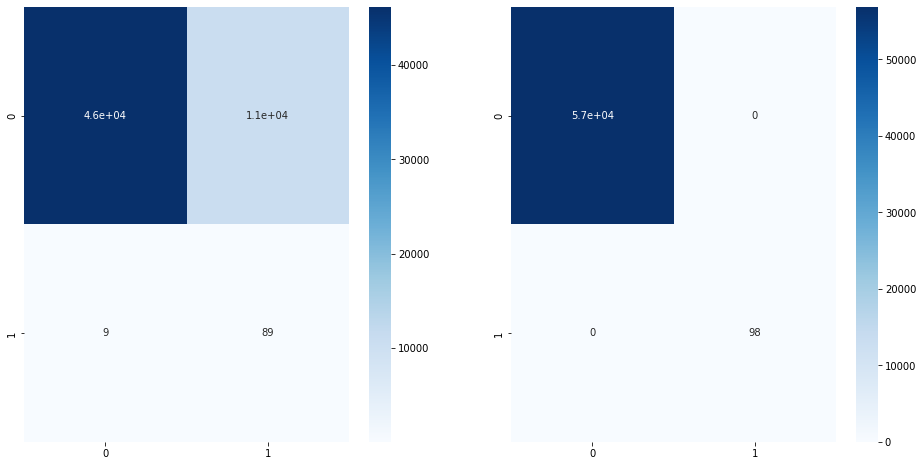

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# settingt the params
labels = ['No Fraud', 'Fraud']

# plotting the confusion matrices
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
m = confusion_matrix(original_y_test, loaded_model.predict(original_X_test))
sns.heatmap(m, annot=True, cmap="Blues")

plt.subplot(1,2,2)
a = confusion_matrix(original_y_test, original_y_test)
sns.heatmap(a, annot=True, cmap="Blues")

print(m)

### Zipping the model
```python
import os 
zip_dst, src = f"{model_save_path}.zip", model_save_path
os.system(f"zip -r {zip_dst} {src}" )
```

### Downloading the model

In [ ]:
from google.colab import files
files.download(model_save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# (G) Deployment as App

## APP (loading from file)

### Declerations & Util Funcs

In [1]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
import pickle
import json 
import numpy as np
import pandas as pd

# File Paths
model_path = 'finalized_model.sav'
component_config_path = "component_configs.json"

# predefined
feature_order = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                 'scaled_amount', 'scaled_time']

# Loading the files
model = pickle.load(open(model_path, 'rb'))

labels = ["not Fraud", "Fraud"]#classes[target].values()

feature_limitations = json.load(open(component_config_path, "r"))

In [6]:
def predict(*args):

  # preparing the input into convenient form
  features = pd.Series([*args], index=feature_order)
  #features = feature_encode(features)
  features = np.array(features).reshape(-1,len(feature_order))

  # prediction
  #model = os_loj_pure
  probabilities = model.predict_proba(features) #.predict(features)
  probs = probabilities.flatten()

  # output form
  results = {l : np.round(p, 3) for l, p in zip(labels, probs)}

  return results

In [69]:
ex_fraud = [138894.0, -1.29844323295373, 1.94810044909488, -4.50994688793757,
            1.30580476704534, -0.0194859272181987, -0.509237783834405,
            -2.64339761889288, 1.28354519416721, -2.51535570266591, 
            -4.50131480977758, 2.09307500991474, -5.41888894354848,
            -1.2470137120242, -3.82826817896473, 0.399050336571034,
            -6.36649950945483, -7.5509680917538, -4.90276666632221,
            0.152892032043683, 0.250415437314689, 1.17803195025635,
            1.3609885807297, -0.272013060161758, -0.325947896160404,
            0.290702673395833, 0.841294588482068, 0.643094248950207,
            0.201155749649851, 0.01]
predict(*ex_fraud)

{'not Fraud': 0.0, 'Fraud': 1.0}

In [70]:
ex_non_fraud = [-0.224389469412635, 1.25728277775973, -0.517980217204391,
                -0.376955027960148, 0.344681977762646, -1.19255259105703,
                0.79760406928044, 0.0786927667429814, -0.305657245718448,
                -0.534524743342495, -1.06817222112118, 0.51282644856093,
                0.937785832507064, 0.563047272327433, 0.334082073371677,
                -0.318067215126627, -0.407393160036766, 0.14372429684479,
                0.0817241207720744, -0.0617386091237009, 0.414882347252521,
                1.37348692985224, -0.0935528758694315, -0.0485327826939407,
                -0.715529833441489, -0.213595067059716, 0.388402522889294,
                0.260995613277687, -0.1817927757982254, 0.8441476051175413]
predict(*ex_non_fraud)

{'not Fraud': 0.996, 'Fraud': 0.004}

In [71]:
ex_non_fraud_2 = [-1.94656392664598, -2.16286412341336, -2.38194163687685,
                  -1.84120291792359, 5.11065658559091, 1.85301267854205,
                  0.426969071417792, 0.33054356280916, 0.668805315075473,
                  -0.270964061663823, -0.313287929145464, 0.143010998221958,
                  -0.373711069531595, 0.302601479834134, -0.363529233104759,
                  -0.204336272122228, -1.27012828357819, -0.413358836940538,
                  -1.29853995843356, -1.17057516594409, -0.0018662201107833,
                  1.22729146186971, 1.66842532637772, 0.697241907885173,
                  -0.940766933489349, -1.00058264053633, 0.365605458377065,
                  -0.0536690025893453, -0.23754628659260812, 0.027784630928464855]
predict(*ex_non_fraud_2)

{'not Fraud': 1.0, 'Fraud': 0.0}

In [72]:
ex_non_fraud_3 = [1.21921859817188, 0.21659980000182, 0.648005903915899,
                  0.721175560134026, -0.464519344506826, -0.651377001011224,
                  -0.222501602768914, -0.0645401833621367, 1.26887045964089,
                  -0.229012655196787, 2.20546126994721, -2.14661054638704,
                  0.559718443983918, 2.13136484270716, -0.262112437815533,
                  0.531926582087796, 0.132905790921682, 0.387784981534284,
                  -0.0232464267136782, -0.209004543078567, -0.371303323339318,
                  -0.925924528987938, 0.151177264473704, 0.227210212550156,
                  0.120015012239199, 0.043008717918779, -0.0682142295290075,
                  -0.0003704858388107, -0.27974568574023617, -0.7420199955356619]
predict(*ex_non_fraud_3)

{'not Fraud': 0.983, 'Fraud': 0.017}

### Declerating the components

In [7]:
import gradio as gr


inputs = list()
for col in feature_order:
  if col in feature_limitations["cat"].keys():
    
    # extracting the params
    vals = feature_limitations["cat"][col]["values"]
    def_val = feature_limitations["cat"][col]["def"]
    
    # creating the component
    inputs.append(gr.inputs.Dropdown(vals, default=def_val, label=col))
  else:
    
    # extracting the params
    min = feature_limitations["num"][col]["min"]
    max = feature_limitations["num"][col]["max"]
    def_val = feature_limitations["num"][col]["def"]
    
    # creating the component
    inputs.append(gr.inputs.Slider(minimum=min, maximum=max, default=def_val, label=col) )


### Launching the demo app

In [8]:
import gradio as gr
# Creating application
gr.Interface(predict, inputs, "label").launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

## Manuels (with out file, code form)

### Declerations & Util Funcs

In [63]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
import pickle
import json 
import numpy as np
import pandas as pd

# File Paths
model_path = 'finalized_model.sav'
component_config_path = "component_configs.json"

# predefined
feature_order = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                 'scaled_amount', 'scaled_time']

# Loading the files
model = pickle.load(open(model_path, 'rb'))

labels = ["not Fraud", "Fraud"]#classes[target].values()

#feature_limitations = json.load(open(component_config_path, "r"))

SyntaxError: ignored

In [ ]:
def predict(*args):

  # preparing the input into convenient form
  features = pd.Series([*args], index=feature_order)
  #features = feature_encode(features)
  features = np.array(features).reshape(-1, len(feature_order))

  # prediction
  probabilities = model.predict_proba(features) #.predict(features)
  probs = probabilities.flatten()

  # output form
  results = {l : np.round(p, 3) for l, p in zip(labels, probs)}

  return results

### Extracting the input params

In [30]:
fraud_indices = y_test[y_test==1].index
a_fraud_obs_index = fraud_indices[0]

In [31]:
ex_obs_fea, ex_obs_tar = dict(X_test.loc[a_fraud_obs_index,:]), y_test.loc[a_fraud_obs_index]
ex_obs_fea, ex_obs_tar

({'Time': 138894.0,
  'V1': -1.29844323295373,
  'V2': 1.94810044909488,
  'V3': -4.50994688793757,
  'V4': 1.30580476704534,
  'V5': -0.0194859272181987,
  'V6': -0.509237783834405,
  'V7': -2.64339761889288,
  'V8': 1.28354519416721,
  'V9': -2.51535570266591,
  'V10': -4.50131480977758,
  'V11': 2.09307500991474,
  'V12': -5.41888894354848,
  'V13': -1.2470137120242,
  'V14': -3.82826817896473,
  'V15': 0.399050336571034,
  'V16': -6.36649950945483,
  'V17': -7.5509680917538,
  'V18': -4.90276666632221,
  'V19': 0.152892032043683,
  'V20': 0.250415437314689,
  'V21': 1.17803195025635,
  'V22': 1.3609885807297,
  'V23': -0.272013060161758,
  'V24': -0.325947896160404,
  'V25': 0.290702673395833,
  'V26': 0.841294588482068,
  'V27': 0.643094248950207,
  'V28': 0.201155749649851,
  'Amount': 0.01},
 1)

In [32]:
ex_obs_fea.values()

dict_values([138894.0, -1.29844323295373, 1.94810044909488, -4.50994688793757, 1.30580476704534, -0.0194859272181987, -0.509237783834405, -2.64339761889288, 1.28354519416721, -2.51535570266591, -4.50131480977758, 2.09307500991474, -5.41888894354848, -1.2470137120242, -3.82826817896473, 0.399050336571034, -6.36649950945483, -7.5509680917538, -4.90276666632221, 0.152892032043683, 0.250415437314689, 1.17803195025635, 1.3609885807297, -0.272013060161758, -0.325947896160404, 0.290702673395833, 0.841294588482068, 0.643094248950207, 0.201155749649851, 0.01])

In [177]:
nonfraud_indices = y_test[y_test==0].index
a_nonfraud_obs_index = nonfraud_indices[3]

In [178]:
ex_non_obs_fea, ex_non_obs_tar = dict(X_test.loc[a_nonfraud_obs_index,:]), y_test.loc[a_nonfraud_obs_index]
ex_non_obs_fea, ex_non_obs_tar

({'V1': 1.21921859817188,
  'V2': 0.21659980000182,
  'V3': 0.648005903915899,
  'V4': 0.721175560134026,
  'V5': -0.464519344506826,
  'V6': -0.651377001011224,
  'V7': -0.222501602768914,
  'V8': -0.0645401833621367,
  'V9': 1.26887045964089,
  'V10': -0.229012655196787,
  'V11': 2.20546126994721,
  'V12': -2.14661054638704,
  'V13': 0.559718443983918,
  'V14': 2.13136484270716,
  'V15': -0.262112437815533,
  'V16': 0.531926582087796,
  'V17': 0.132905790921682,
  'V18': 0.387784981534284,
  'V19': -0.0232464267136782,
  'V20': -0.209004543078567,
  'V21': -0.371303323339318,
  'V22': -0.925924528987938,
  'V23': 0.151177264473704,
  'V24': 0.227210212550156,
  'V25': 0.120015012239199,
  'V26': 0.043008717918779,
  'V27': -0.0682142295290075,
  'V28': -0.0003704858388107,
  'scaled_amount': -0.27974568574023617,
  'scaled_time': -0.7420199955356619},
 0)

In [179]:
ex_non_obs_fea.values()

dict_values([1.21921859817188, 0.21659980000182, 0.648005903915899, 0.721175560134026, -0.464519344506826, -0.651377001011224, -0.222501602768914, -0.0645401833621367, 1.26887045964089, -0.229012655196787, 2.20546126994721, -2.14661054638704, 0.559718443983918, 2.13136484270716, -0.262112437815533, 0.531926582087796, 0.132905790921682, 0.387784981534284, -0.0232464267136782, -0.209004543078567, -0.371303323339318, -0.925924528987938, 0.151177264473704, 0.227210212550156, 0.120015012239199, 0.043008717918779, -0.0682142295290075, -0.0003704858388107, -0.27974568574023617, -0.7420199955356619])

In [ ]:
def_vals = ex_obs_fea.copy()

In [ ]:
predict(*list(def_vals.values()))

{'not Fraud': 0.0, 'Fraud': 1.0}

In [ ]:
feature_order = ex_obs_fea.keys()
feature_order

dict_keys(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time'])

In [ ]:
ex_obs_fea

{'V1': 0.287952771527529,
 'V2': 1.72873464521162,
 'V3': -1.65217304572257,
 'V4': 3.81354418795523,
 'V5': -1.09092715391318,
 'V6': -0.984744665624589,
 'V7': -2.20231792699069,
 'V8': 0.555087932252191,
 'V9': -2.03389204830362,
 'V10': -2.73415555507211,
 'V11': 2.36843367282003,
 'V12': -3.65680265130054,
 'V13': -0.169534683304731,
 'V14': -4.74441333023745,
 'V15': 0.765192829294304,
 'V16': -2.47951355643698,
 'V17': -4.93111196829858,
 'V18': -2.54740252736051,
 'V19': -0.90268980289448,
 'V20': 0.265250210286539,
 'V21': 0.262201510185118,
 'V22': -0.633527564205563,
 'V23': 0.0928910102678184,
 'V24': 0.187612655556196,
 'V25': 0.368708354409639,
 'V26': -0.132474029018571,
 'V27': 0.57656075692479,
 'V28': 0.309842705461879,
 'scaled_amount': -0.30741284147278697,
 'scaled_time': -0.61097992222653}

In [ ]:
tfm_cols = [
  "fare"
]

In [ ]:
num_columns = [col for col in num_cols if col !="survived"]
num_columns

['age', 'sibsp', 'parch', 'fare', 'alone']

In [ ]:
cat_cols

['sex', 'embarked', 'class', 'who']

In [ ]:
import numpy as np
num_limitations = {}
for col in df.drop("Class", axis=1).columns:
  num_limitations[col] = {
          "min": np.floor(df[col].min()),
          "max": np.ceil(df[col].max()),
          "def": np.floor(ex_obs_fea[col])
      }

In [ ]:
cat_limitations ={}

In [ ]:
total_limitations = {
    "num":num_limitations,
    "cat":cat_limitations
}

In [ ]:
feature_limitations = total_limitations.copy()
# removing target classes
#del feature_limitations["cat"]["Loan_Status"]

In [ ]:
component_config_path = "component_configs.json"
with open(component_config_path,"w+") as f: json.dump(feature_limitations, f)

In [ ]:
print(json.dumps(feature_limitations, indent=4))

{
    "num": {
        "V1": {
            "min": -57.0,
            "max": 3.0,
            "def": 0.0
        },
        "V2": {
            "min": -73.0,
            "max": 23.0,
            "def": 1.0
        },
        "V3": {
            "min": -49.0,
            "max": 10.0,
            "def": -2.0
        },
        "V4": {
            "min": -6.0,
            "max": 17.0,
            "def": 3.0
        },
        "V5": {
            "min": -114.0,
            "max": 35.0,
            "def": -2.0
        },
        "V6": {
            "min": -27.0,
            "max": 74.0,
            "def": -1.0
        },
        "V7": {
            "min": -44.0,
            "max": 121.0,
            "def": -3.0
        },
        "V8": {
            "min": -74.0,
            "max": 21.0,
            "def": 0.0
        },
        "V9": {
            "min": -14.0,
            "max": 16.0,
            "def": -3.0
        },
        "V10": {
            "min": -25.0,
            "max": 24.0,
   

In [59]:
df['scaled_amount'].min(),df['scaled_amount'].max()

(-0.30741284147278697, 358.6831551736184)

In [60]:
df['scaled_time'].min(),df['scaled_time'].max()

(-0.9949834936970594, 1.0350215580540185)

### Declerating the components

In [ ]:
import gradio as gr


inputs = list()
for col in feature_order:

    # extracting the params
    min = feature_limitations["num"][col]["min"]
    max = feature_limitations["num"][col]["max"]
    def_val = feature_limitations["num"][col]["def"]
    
    # creating the component
    inputs.append(gr.inputs.Slider(minimum=min, maximum=max, default=def_val, label=col) )


### Launching the demo app

In [ ]:
import gradio as gr
# Creating application
gr.Interface(predict, inputs, "label").launch(debug=True)